In [1]:
import matplotlib.font_manager as fm
path = 'C:/Windows/Fonts/NGULIM.ttf'
fontprop = fm.FontProperties(fname=path)
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
import csv
import math

In [2]:
db = pymysql.connect(
    user='web_user',
    passwd='cau523.',
    port=3308,
    host='165.194.104.225',
    db='movie_annotation',
    charset='utf8'
)

In [3]:
cursor = db.cursor(pymysql.cursors.DictCursor)

In [4]:
cursor.execute("select speaker, speech, listener, movie_name from movie_script_annotation where movie_name = '8월의 크리스마스' or movie_name = '각설탕' or movie_name = '고지전' or movie_name = '괴물' or movie_name = '남극일기' or movie_name = '다찌마와 Lee' or movie_name = '올드보이' or movie_name = '내 머리 속의 지우개' or movie_name = '가족' or movie_name = '싱글즈' or movie_name = '끝까지 간다'")

4319

In [5]:
data = cursor.fetchall()

In [192]:
data

[{'speaker': '다림',
  'speech': '번호판이 하나도 한 보이네.',
  'listener': 'self',
  'movie_name': '8월의 크리스마스'},
 {'speaker': '다림',
  'speech': '왜 웃어요?',
  'listener': '정원',
  'movie_name': '8월의 크리스마스'},
 {'speaker': '다림',
  'speech': '이상하다. 잘 찍었는데, 아저씨가 잘못한 거 아녜요?',
  'listener': '정원',
  'movie_name': '8월의 크리스마스'},
 {'speaker': '다림',
  'speech': '할 수 없죠 뭐. 아저씨 필름 좀 넣어 주세요.',
  'listener': '정원',
  'movie_name': '8월의 크리스마스'},
 {'speaker': '정원',
  'speech': '필름을 넣을 줄 몰라요 ?',
  'listener': '다림',
  'movie_name': '8월의 크리스마스'},
 {'speaker': '다림',
  'speech': '좀 해주세요.',
  'listener': '정원',
  'movie_name': '8월의 크리스마스'},
 {'speaker': '정원',
  'speech': '이리 와봐요. 가르쳐 줄테니 잘 들어요',
  'listener': '다림',
  'movie_name': '8월의 크리스마스'},
 {'speaker': '정원',
  'speech': '설명은 듣지 않고.. 아가씨, 셔터 누를 때 숨을 멈춰.',
  'listener': '다림',
  'movie_name': '8월의 크리스마스'},
 {'speaker': '정원',
  'speech': '여기서 뭐해요?\n',
  'listener': '다림',
  'movie_name': '8월의 크리스마스'},
 {'speaker': '정원',
  'speech': '너무 젊었을 때 사진을 썼나 ?',
  'listener': '철구',
  

In [6]:
def lis_sort(a):
    if '/' in a:
        index_list = [-1]
        index = 0
        while index < len(a):
            index = a.find('/', index)
            if index != -1:
                index_list.append(index)
            if index == -1:
                break
            index += 1
        b = []
        for i in range(len(index_list)):
            if i+1 != len(index_list):
                b.append(a[index_list[i]+1:index_list[i+1]].strip())
            else:
                b.append(a[index_list[i]+1:].strip())
        return "/".join(sorted(b))
    else:
        return a.strip()

In [7]:
for i in data:
    i['listener'] = lis_sort(i['listener'])

In [8]:
data

[{'speaker': '다림',
  'speech': '번호판이 하나도 한 보이네.',
  'listener': 'self',
  'movie_name': '8월의 크리스마스'},
 {'speaker': '다림',
  'speech': '왜 웃어요?',
  'listener': '정원',
  'movie_name': '8월의 크리스마스'},
 {'speaker': '다림',
  'speech': '이상하다. 잘 찍었는데, 아저씨가 잘못한 거 아녜요?',
  'listener': '정원',
  'movie_name': '8월의 크리스마스'},
 {'speaker': '다림',
  'speech': '할 수 없죠 뭐. 아저씨 필름 좀 넣어 주세요.',
  'listener': '정원',
  'movie_name': '8월의 크리스마스'},
 {'speaker': '정원',
  'speech': '필름을 넣을 줄 몰라요 ?',
  'listener': '다림',
  'movie_name': '8월의 크리스마스'},
 {'speaker': '다림',
  'speech': '좀 해주세요.',
  'listener': '정원',
  'movie_name': '8월의 크리스마스'},
 {'speaker': '정원',
  'speech': '이리 와봐요. 가르쳐 줄테니 잘 들어요',
  'listener': '다림',
  'movie_name': '8월의 크리스마스'},
 {'speaker': '정원',
  'speech': '설명은 듣지 않고.. 아가씨, 셔터 누를 때 숨을 멈춰.',
  'listener': '다림',
  'movie_name': '8월의 크리스마스'},
 {'speaker': '정원',
  'speech': '여기서 뭐해요?\n',
  'listener': '다림',
  'movie_name': '8월의 크리스마스'},
 {'speaker': '정원',
  'speech': '너무 젊었을 때 사진을 썼나 ?',
  'listener': '철구',
  

In [9]:
from konlpy.tag import Kkma

In [12]:
for i in data:
    i['speech'] = i['speech'].strip()
    if ("(",")" in i['speech']):
        indices = list(range(i['speech'].find("("), i['speech'].find(")") +1))
        a = [x for j, x in enumerate(i['speech']) if j not in indices]
        i['speech'] = ''.join(a)

In [13]:
for i in data:
    if "(" in i['speech']:
        print(i)

In [14]:
import re

def cleanText(readData):
    text = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》_\n\t]', '', readData)
    return text

In [15]:
for i in data:
    i['speech'] = cleanText(i['speech'])
    i['speech'] = i['speech'].strip()
    i['speech'] = i['speech'].replace('  ',' ')

In [16]:
for i in data:
    if ('\n' in i['speech'] or '\t' in i['speech']):
        print(i['speech'])

In [202]:
data

[{'speaker': '다림',
  'speech': '번호판이 하나도 한 보이네',
  'listener': 'self',
  'movie_name': '8월의 크리스마스'},
 {'speaker': '다림',
  'speech': '왜 웃어요',
  'listener': '정원',
  'movie_name': '8월의 크리스마스'},
 {'speaker': '다림',
  'speech': '이상하다 잘 찍었는데 아저씨가 잘못한 거 아녜요',
  'listener': '정원',
  'movie_name': '8월의 크리스마스'},
 {'speaker': '다림',
  'speech': '할 수 없죠 뭐 아저씨 필름 좀 넣어 주세요',
  'listener': '정원',
  'movie_name': '8월의 크리스마스'},
 {'speaker': '정원',
  'speech': '필름을 넣을 줄 몰라요',
  'listener': '다림',
  'movie_name': '8월의 크리스마스'},
 {'speaker': '다림',
  'speech': '좀 해주세요',
  'listener': '정원',
  'movie_name': '8월의 크리스마스'},
 {'speaker': '정원',
  'speech': '이리 와봐요 가르쳐 줄테니 잘 들어요',
  'listener': '다림',
  'movie_name': '8월의 크리스마스'},
 {'speaker': '정원',
  'speech': '설명은 듣지 않고 아가씨 셔터 누를 때 숨을 멈춰',
  'listener': '다림',
  'movie_name': '8월의 크리스마스'},
 {'speaker': '정원',
  'speech': '여기서 뭐해요',
  'listener': '다림',
  'movie_name': '8월의 크리스마스'},
 {'speaker': '정원',
  'speech': '너무 젊었을 때 사진을 썼나',
  'listener': '철구',
  'movie_name': '8월의 크

In [17]:
speak_dict = {}
for i in data:
    if i['speaker'] not in speak_dict:
        speak_dict[i['speaker']] = 0

In [18]:
del speak_dict['Character']

In [19]:
speak_dict

{'다림': 0,
 '정원': 0,
 '강은표': 0,
 '김수혁': 0,
 '희봉': 0,
 '강두': 0,
 '현서': 0,
 '민재': 0,
 '도형': 0,
 '남일': 0,
 '남주': 0,
 '화녀': 0,
 '충녀': 0,
 '리': 0,
 '시은': 0,
 '판돌': 0,
 '익두': 0,
 '김조교사': 0,
 '민자': 0,
 '철이': 0,
 '고건수': 0,
 '박창민': 0,
 '대수': 0,
 '미도': 0,
 '우진': 0,
 '철수': 0,
 '수진': 0,
 '주석': 0,
 '정환': 0,
 '정은': 0,
 '나난': 0,
 '동미': 0,
 '정준': 0,
 '수헌': 0}

In [206]:
len(speak_dict)

34

In [20]:
tagger = Kkma()
for i in data:
    print(tagger.pos(i['speech']))
    break

[('번호판', 'NNG'), ('이', 'JKS'), ('하나', 'NNG'), ('도', 'JX'), ('한', 'MDN'), ('보이', 'VV'), ('네', 'EFN')]


In [208]:
data

[{'speaker': '다림',
  'speech': '번호판이 하나도 한 보이네',
  'listener': 'self',
  'movie_name': '8월의 크리스마스'},
 {'speaker': '다림',
  'speech': '왜 웃어요',
  'listener': '정원',
  'movie_name': '8월의 크리스마스'},
 {'speaker': '다림',
  'speech': '이상하다 잘 찍었는데 아저씨가 잘못한 거 아녜요',
  'listener': '정원',
  'movie_name': '8월의 크리스마스'},
 {'speaker': '다림',
  'speech': '할 수 없죠 뭐 아저씨 필름 좀 넣어 주세요',
  'listener': '정원',
  'movie_name': '8월의 크리스마스'},
 {'speaker': '정원',
  'speech': '필름을 넣을 줄 몰라요',
  'listener': '다림',
  'movie_name': '8월의 크리스마스'},
 {'speaker': '다림',
  'speech': '좀 해주세요',
  'listener': '정원',
  'movie_name': '8월의 크리스마스'},
 {'speaker': '정원',
  'speech': '이리 와봐요 가르쳐 줄테니 잘 들어요',
  'listener': '다림',
  'movie_name': '8월의 크리스마스'},
 {'speaker': '정원',
  'speech': '설명은 듣지 않고 아가씨 셔터 누를 때 숨을 멈춰',
  'listener': '다림',
  'movie_name': '8월의 크리스마스'},
 {'speaker': '정원',
  'speech': '여기서 뭐해요',
  'listener': '다림',
  'movie_name': '8월의 크리스마스'},
 {'speaker': '정원',
  'speech': '너무 젊었을 때 사진을 썼나',
  'listener': '철구',
  'movie_name': '8월의 크

In [209]:
tagger.pos('아침부터 혼나고 너무 더워서 그래요')

[('아침', 'NNG'),
 ('부터', 'JX'),
 ('혼나', 'VV'),
 ('고', 'ECE'),
 ('너무', 'MAG'),
 ('덥', 'VA'),
 ('어서', 'ECD'),
 ('그리하', 'VV'),
 ('여요', 'ECD')]

In [525]:
adj_dict = {}
adv_dict = {}
adj_count_dict = {}
adv_count_dict = {}
sit_dict = {}
adj_stop_words = ['이','왜','있','안','없','그','저','어느','아부지','어때요','못','다','니']
adv_stop_words = []
for i in data:
    for x in tagger.pos(i['speech']):
        if '+' in x[1]:
            index = x[1].index('+')
            tag = x[1][:index]

        else:
            tag = x[1]
        if i['speaker'] == "Character":
            continue
        else:
            a = i['listener']

        if tag.startswith('VA'):
      # if x[0] in stop_words:
      #   continue
            if i['speaker'] + '_' + a + '_' + i['movie_name'] in adj_dict:
                adj_dict[i['speaker'] + '_' + a + '_' + i['movie_name']] = adj_dict[i['speaker'] + '_' + a + '_' + i['movie_name']] + ' ' + x[0]
                sit_dict[i['speaker'] + '_' + a + '_' + i['movie_name']] = sit_dict[i['speaker'] + '_' + a + '_' + i['movie_name']] + 1
                adj_count_dict[i['speaker'] + '_' + a + '_' + i['movie_name']] = adj_count_dict[i['speaker'] + '_' + a + '_' + i['movie_name']] + 1
                speak_dict[i['speaker']] += 1
            
            if i['speaker'] + '_' + a + '_' + i['movie_name'] not in adj_dict: 
                adj_dict[i['speaker'] + '_' + a + '_' + i['movie_name']] = x[0]
                sit_dict[i['speaker'] + '_' + a + '_' + i['movie_name']] = 1
                adj_count_dict[i['speaker'] + '_' + a + '_' + i['movie_name']] = 1
                speak_dict[i['speaker']] += 1
        if tag.startswith('M'):
      # if x[0] in stop_words:
      #   continue
            if i['speaker'] + '_' + a + '_' + i['movie_name'] in adv_dict:
                adv_dict[i['speaker'] + '_' + a + '_' + i['movie_name']] = adv_dict[i['speaker'] + '_' + a + '_' + i['movie_name']] + ' ' + x[0]
                sit_dict[i['speaker'] + '_' + a + '_' + i['movie_name']] = sit_dict[i['speaker'] + '_' + a + '_' + i['movie_name']] + 1
                adv_count_dict[i['speaker'] + '_' + a + '_' + i['movie_name']] = adv_count_dict[i['speaker'] + '_' + a + '_' + i['movie_name']] + 1
                speak_dict[i['speaker']] += 1
            
            if i['speaker'] + '_' + a + '_' + i['movie_name'] not in adv_dict: 
                adv_dict[i['speaker'] + '_' + a + '_' + i['movie_name']] = x[0]
                sit_dict[i['speaker'] + '_' + a + '_' + i['movie_name']] = 1
                adv_count_dict[i['speaker'] + '_' + a + '_' + i['movie_name']] = 1
                speak_dict[i['speaker']] += 1
            
        else:
            if i['speaker'] + '_' + a + '_' + i['movie_name'] in sit_dict:
                sit_dict[i['speaker'] + '_' + a + '_' + i['movie_name']] += 1
                speak_dict[i['speaker']] += 1
            if i['speaker'] + '_' + a + '_' + i['movie_name'] not in sit_dict:
                sit_dict[i['speaker'] + '_' + a + '_' + i['movie_name']] = 1
                speak_dict[i['speaker']] += 1


KeyboardInterrupt: 

In [21]:
sit_dict = {}
for i in data:
    if i['speaker'] + '_' + i['listener'] + '_' + i['movie_name'] not in sit_dict:
        sit_dict[i['speaker'] + '_' + i['listener'] + '_' + i['movie_name']] = 0

In [22]:
adj_dict = {}
adv_dict = {}

for i in data:
    for x in tagger.pos(i['speech']):
        tag = x[1]
        a = i['listener']
        if i['speaker'] == "Character":
            continue


        if tag.startswith('VA'):

            if i['speaker'] + '_' + a + '_' + i['movie_name'] in adj_dict:
                adj_dict[i['speaker'] + '_' + a + '_' + i['movie_name']] += 1
                sit_dict[i['speaker'] + '_' + a + '_' + i['movie_name']] += 1
                speak_dict[i['speaker']] += 1
            
            if i['speaker'] + '_' + a + '_' + i['movie_name'] not in adj_dict: 
                adj_dict[i['speaker'] + '_' + a + '_' + i['movie_name']] = 1
                sit_dict[i['speaker'] + '_' + a + '_' + i['movie_name']] += 1
                speak_dict[i['speaker']] += 1
        if tag.startswith('M'):

            if i['speaker'] + '_' + a + '_' + i['movie_name'] in adv_dict:
                adv_dict[i['speaker'] + '_' + a + '_' + i['movie_name']] += 1
                sit_dict[i['speaker'] + '_' + a + '_' + i['movie_name']] += 1
                speak_dict[i['speaker']] += 1
            
            if i['speaker'] + '_' + a + '_' + i['movie_name'] not in adv_dict: 
                adv_dict[i['speaker'] + '_' + a + '_' + i['movie_name']] = 1
                sit_dict[i['speaker'] + '_' + a + '_' + i['movie_name']] += 1
                speak_dict[i['speaker']] += 1
            
        else:
            sit_dict[i['speaker'] + '_' + a + '_' + i['movie_name']] += 1
            speak_dict[i['speaker']] += 1

In [153]:
adj_dict

{'다림_정원_8월의 크리스마스': 49,
 '정원_철구_8월의 크리스마스': 4,
 '정원_다림_8월의 크리스마스': 33,
 '정원_중학생들_8월의 크리스마스': 1,
 '정원_지원_8월의 크리스마스': 4,
 '강은표_남성식_고지전': 1,
 '강은표_최대령_고지전': 4,
 '김수혁_임소령_고지전': 1,
 '강은표_유재홍_고지전': 2,
 '강은표_신일영_고지전': 8,
 '김수혁_유재홍_고지전': 8,
 '강은표_김수혁_고지전': 11,
 '김수혁_강은표_고지전': 23,
 '정원_self_8월의 크리스마스': 1,
 '정원_민구_8월의 크리스마스': 1,
 '다림_효정_8월의 크리스마스': 4,
 '정원_정숙_8월의 크리스마스': 2,
 '다림_철이/효정_8월의 크리스마스': 1,
 '현서_강두_괴물': 5,
 '민재_유진_남극일기': 1,
 '도형_근찬_남극일기': 2,
 '도형_영민_남극일기': 9,
 '도형_근찬/민재/성훈/영민/재경_남극일기': 6,
 '민재_self_남극일기': 6,
 '민재_재경_남극일기': 1,
 '민재_근찬_남극일기': 21,
 '도형_재경_남극일기': 3,
 '도형_민재_남극일기': 26,
 '민재_도형_남극일기': 10,
 '도형_성훈_남극일기': 4,
 '도형_근찬/민재/성훈/영민_남극일기': 2,
 '민재_근찬/도형/영민_남극일기': 2,
 '도형_근찬/민재/영민_남극일기': 18,
 '민재_영민_남극일기': 2,
 '도형_self_남극일기': 1,
 '현서_희봉_괴물': 1,
 '현서_self_괴물': 1,
 '남일_강두/희봉_괴물': 1,
 '남주_남일/희봉_괴물': 3,
 '남일_남주/희봉_괴물': 3,
 '강두_간호사/의사/희봉_괴물': 1,
 '강두_가족/순경/의료진_괴물': 2,
 '남일_순경_괴물': 1,
 '희봉_강두/남일/남주_괴물': 5,
 '희봉_강두/남일/남주/장씨_괴물': 2,
 '강두_남일/남주/장씨/희봉_괴물': 2,
 '남주_강두/남일/장씨/희봉_괴물': 1,
 '남일_강두/남주/희

In [154]:
adv_dict

{'다림_self_8월의 크리스마스': 1,
 '다림_정원_8월의 크리스마스': 78,
 '정원_다림_8월의 크리스마스': 49,
 '정원_철구_8월의 크리스마스': 10,
 '정원_중학생들_8월의 크리스마스': 4,
 '정원_지원_8월의 크리스마스': 8,
 '정원_정숙_8월의 크리스마스': 4,
 '정원_뚱뚱한 30대 여자_8월의 크리스마스': 1,
 '정원_정숙/지원_8월의 크리스마스': 2,
 '정원_경찰관/술취한 남자_8월의 크리스마스': 3,
 '강은표_김수혁_고지전': 25,
 '김수혁_현정윤_고지전': 1,
 '강은표_남성식_고지전': 4,
 '강은표_최대령_고지전': 14,
 '김수혁_강은표_고지전': 88,
 '강은표_신일영_고지전': 19,
 '강은표_유재홍_고지전': 10,
 '강은표_양효삼_고지전': 2,
 '김수혁_self_고지전': 3,
 '김수혁_김수혁_고지전': 1,
 '다림_철이/효정_8월의 크리스마스': 1,
 '정원_할머니_8월의 크리스마스': 4,
 '정원_민구_8월의 크리스마스': 3,
 '정원_정원아버지_8월의 크리스마스': 5,
 '정원_권투선수청년_8월의 크리스마스': 3,
 '다림_효정_8월의 크리스마스': 4,
 '희봉_self_괴물': 5,
 '강두_self_괴물': 5,
 '희봉_강두_괴물': 10,
 '민재_self_남극일기': 14,
 '도형_근찬/성훈/영민/재경_남극일기': 3,
 '민재_유진_남극일기': 3,
 '민재_도형_남극일기': 21,
 '민재_근찬/도형/성훈/영민/재경_남극일기': 1,
 '도형_영민_남극일기': 22,
 '도형_근찬/민재/성훈/영민/재경_남극일기': 30,
 '도형_민재_남극일기': 42,
 '민재_근찬_남극일기': 50,
 '도형_근찬/민재_남극일기': 3,
 '민재_재경_남극일기': 1,
 '도형_재경_남극일기': 9,
 '도형_성훈_남극일기': 13,
 '도형_근찬/민재/성훈/영민_남극일기': 6,
 '민재_성훈_남극일기': 1,
 '민재_근찬/도형/영민_남극일기': 2

In [155]:
sit_dict

{'다림_self_8월의 크리스마스': 7,
 '다림_정원_8월의 크리스마스': 1007,
 '정원_다림_8월의 크리스마스': 723,
 '정원_철구_8월의 크리스마스': 135,
 '정원_중학생들_8월의 크리스마스': 43,
 '정원_중학생 3_8월의 크리스마스': 2,
 '정원_석희/아버지/정숙_8월의 크리스마스': 1,
 '정원_지원_8월의 크리스마스': 110,
 '정원_정숙_8월의 크리스마스': 72,
 '정원_뚱뚱한 30대 여자_8월의 크리스마스': 21,
 '정원_정숙/지원_8월의 크리스마스': 16,
 '정원_경찰관/술취한 남자_8월의 크리스마스': 11,
 '강은표_김수혁_고지전': 426,
 '김수혁_강은표_고지전': 1189,
 '김수혁_인민군_고지전': 13,
 '김수혁_현정윤_고지전': 13,
 '강은표_초병_고지전': 11,
 '강은표_위병_고지전': 11,
 '강은표_남성식_고지전': 42,
 '강은표_최대령_고지전': 104,
 '강은표_신일영_고지전': 251,
 '김수혁_임소령_고지전': 10,
 '강은표_유재홍_고지전': 170,
 '강은표_self_고지전': 26,
 'Character_self_고지전': 0,
 '김수혁_유재홍_고지전': 214,
 '강은표_양효삼_고지전': 10,
 '김수혁_self_고지전': 11,
 '김수혁_김수혁_고지전': 5,
 '김수혁_전원_고지전': 266,
 '다림_철이/효정_8월의 크리스마스': 11,
 '정원_할머니_8월의 크리스마스': 48,
 '정원_self_8월의 크리스마스': 26,
 '정원_민구_8월의 크리스마스': 38,
 '정원_정원아버지_8월의 크리스마스': 27,
 '정원_권투선수청년_8월의 크리스마스': 4,
 '다림_효정_8월의 크리스마스': 58,
 '희봉_self_괴물': 37,
 '강두_self_괴물': 58,
 '희봉_강두_괴물': 91,
 '강두_희봉_괴물': 24,
 '강두_현서_괴물': 67,
 '현서_강두_괴물': 91,
 '민재_self_남극일기': 30

In [156]:
speak_dict

{'다림': 1083,
 '정원': 1277,
 '강은표': 1255,
 '김수혁': 1952,
 '희봉': 991,
 '강두': 777,
 '현서': 486,
 '민재': 1450,
 '도형': 2693,
 '남일': 676,
 '남주': 158,
 '화녀': 169,
 '충녀': 287,
 '리': 631,
 '시은': 2325,
 '판돌': 669,
 '익두': 663,
 '김조교사': 829,
 '민자': 508,
 '철이': 197,
 '고건수': 2174,
 '박창민': 1164,
 '대수': 2208,
 '미도': 1148,
 '우진': 1568,
 '철수': 3171,
 '수진': 3406,
 '주석': 1328,
 '정환': 880,
 '정은': 1709,
 '나난': 5553,
 '동미': 4195,
 '정준': 1600,
 '수헌': 1322}

In [175]:
adj_dict

{'다림_정원_8월의 크리스마스': 49,
 '정원_철구_8월의 크리스마스': 4,
 '정원_다림_8월의 크리스마스': 33,
 '정원_중학생들_8월의 크리스마스': 1,
 '정원_지원_8월의 크리스마스': 4,
 '강은표_남성식_고지전': 1,
 '강은표_최대령_고지전': 4,
 '김수혁_임소령_고지전': 1,
 '강은표_유재홍_고지전': 2,
 '강은표_신일영_고지전': 8,
 '김수혁_유재홍_고지전': 8,
 '강은표_김수혁_고지전': 11,
 '김수혁_강은표_고지전': 23,
 '정원_self_8월의 크리스마스': 1,
 '정원_민구_8월의 크리스마스': 1,
 '다림_효정_8월의 크리스마스': 4,
 '정원_정숙_8월의 크리스마스': 2,
 '다림_철이/효정_8월의 크리스마스': 1,
 '현서_강두_괴물': 5,
 '민재_유진_남극일기': 1,
 '도형_근찬_남극일기': 2,
 '도형_영민_남극일기': 9,
 '도형_근찬/민재/성훈/영민/재경_남극일기': 6,
 '민재_self_남극일기': 6,
 '민재_재경_남극일기': 1,
 '민재_근찬_남극일기': 21,
 '도형_재경_남극일기': 3,
 '도형_민재_남극일기': 26,
 '민재_도형_남극일기': 10,
 '도형_성훈_남극일기': 4,
 '도형_근찬/민재/성훈/영민_남극일기': 2,
 '민재_근찬/도형/영민_남극일기': 2,
 '도형_근찬/민재/영민_남극일기': 18,
 '민재_영민_남극일기': 2,
 '도형_self_남극일기': 1,
 '현서_희봉_괴물': 1,
 '현서_self_괴물': 1,
 '남일_강두/희봉_괴물': 1,
 '남주_남일/희봉_괴물': 3,
 '남일_남주/희봉_괴물': 3,
 '강두_간호사/의사/희봉_괴물': 1,
 '강두_가족/순경/의료진_괴물': 2,
 '남일_순경_괴물': 1,
 '희봉_강두/남일/남주_괴물': 5,
 '희봉_강두/남일/남주/장씨_괴물': 2,
 '강두_남일/남주/장씨/희봉_괴물': 2,
 '남주_강두/남일/장씨/희봉_괴물': 1,
 '남일_강두/남주/희

In [176]:
adv_dict

{'다림_self_8월의 크리스마스': 1,
 '다림_정원_8월의 크리스마스': 78,
 '정원_다림_8월의 크리스마스': 49,
 '정원_철구_8월의 크리스마스': 10,
 '정원_중학생들_8월의 크리스마스': 4,
 '정원_지원_8월의 크리스마스': 8,
 '정원_정숙_8월의 크리스마스': 4,
 '정원_뚱뚱한 30대 여자_8월의 크리스마스': 1,
 '정원_정숙/지원_8월의 크리스마스': 2,
 '정원_경찰관/술취한 남자_8월의 크리스마스': 3,
 '강은표_김수혁_고지전': 25,
 '김수혁_현정윤_고지전': 1,
 '강은표_남성식_고지전': 4,
 '강은표_최대령_고지전': 14,
 '김수혁_강은표_고지전': 88,
 '강은표_신일영_고지전': 19,
 '강은표_유재홍_고지전': 10,
 '강은표_양효삼_고지전': 2,
 '김수혁_self_고지전': 3,
 '김수혁_김수혁_고지전': 1,
 '다림_철이/효정_8월의 크리스마스': 1,
 '정원_할머니_8월의 크리스마스': 4,
 '정원_민구_8월의 크리스마스': 3,
 '정원_정원아버지_8월의 크리스마스': 5,
 '정원_권투선수청년_8월의 크리스마스': 3,
 '다림_효정_8월의 크리스마스': 4,
 '희봉_self_괴물': 5,
 '강두_self_괴물': 5,
 '희봉_강두_괴물': 10,
 '민재_self_남극일기': 14,
 '도형_근찬/성훈/영민/재경_남극일기': 3,
 '민재_유진_남극일기': 3,
 '민재_도형_남극일기': 21,
 '민재_근찬/도형/성훈/영민/재경_남극일기': 1,
 '도형_영민_남극일기': 22,
 '도형_근찬/민재/성훈/영민/재경_남극일기': 30,
 '도형_민재_남극일기': 42,
 '민재_근찬_남극일기': 50,
 '도형_근찬/민재_남극일기': 3,
 '민재_재경_남극일기': 1,
 '도형_재경_남극일기': 9,
 '도형_성훈_남극일기': 13,
 '도형_근찬/민재/성훈/영민_남극일기': 6,
 '민재_성훈_남극일기': 1,
 '민재_근찬/도형/영민_남극일기': 2

In [23]:
new_adj_list = []
for i in adj_dict:
    new_adj_dict = {}
    index_list = []
    index = 0
    while index < len(i):
        index = i.find('_', index)
        if index != -1:
            index_list.append(index)
        if index == -1:
            break
        index += 1
    new_adj_dict['speaker'] = i[:index_list[0]]
    new_adj_dict['listener'] = i[index_list[0]+1:index_list[1]]
    new_adj_dict['movie_name'] = i[index_list[1]+1:]
    new_adj_dict['adj_count'] = adj_dict[i]
    new_adj_dict['sit_words'] = sit_dict[i]
    new_adj_dict['total_words'] = speak_dict[i[:index_list[0]]]
    new_adj_list.append(new_adj_dict)

In [24]:
new_adv_list = []
for i in adv_dict:
    new_adv_dict = {}
    index_list = []
    index = 0
    while index < len(i):
        index = i.find('_', index)
        if index != -1:
            index_list.append(index)
        if index == -1:
            break
        index += 1
    new_adv_dict['speaker'] = i[:index_list[0]]
    new_adv_dict['listener'] = i[index_list[0]+1:index_list[1]]
    new_adv_dict['movie_name'] = i[index_list[1]+1:]
    new_adv_dict['adv_count'] = adv_dict[i]
    new_adv_dict['sit_words'] = sit_dict[i]
    new_adv_dict['total_words'] = speak_dict[i[:index_list[0]]]
    new_adv_list.append(new_adv_dict)

In [534]:
new_adj_list

[{'speaker': '다림',
  'listener': '정원',
  'movie_name': '8월의 크리스마스',
  'adj_count': 49,
  'sit_words': 1007,
  'total_words': 2166},
 {'speaker': '정원',
  'listener': '철구',
  'movie_name': '8월의 크리스마스',
  'adj_count': 4,
  'sit_words': 135,
  'total_words': 2554},
 {'speaker': '정원',
  'listener': '다림',
  'movie_name': '8월의 크리스마스',
  'adj_count': 33,
  'sit_words': 723,
  'total_words': 2554},
 {'speaker': '정원',
  'listener': '중학생들',
  'movie_name': '8월의 크리스마스',
  'adj_count': 1,
  'sit_words': 43,
  'total_words': 2554},
 {'speaker': '정원',
  'listener': '지원',
  'movie_name': '8월의 크리스마스',
  'adj_count': 4,
  'sit_words': 110,
  'total_words': 2554},
 {'speaker': '강은표',
  'listener': '남성식',
  'movie_name': '고지전',
  'adj_count': 1,
  'sit_words': 42,
  'total_words': 1725},
 {'speaker': '강은표',
  'listener': '최대령',
  'movie_name': '고지전',
  'adj_count': 4,
  'sit_words': 104,
  'total_words': 1725},
 {'speaker': '김수혁',
  'listener': '임소령',
  'movie_name': '고지전',
  'adj_count': 1,
  'sit_words'

In [535]:
new_adv_list

[{'speaker': '다림',
  'listener': 'self',
  'movie_name': '8월의 크리스마스',
  'adv_count': 1,
  'sit_words': 7,
  'total_words': 2166},
 {'speaker': '다림',
  'listener': '정원',
  'movie_name': '8월의 크리스마스',
  'adv_count': 78,
  'sit_words': 1007,
  'total_words': 2166},
 {'speaker': '정원',
  'listener': '다림',
  'movie_name': '8월의 크리스마스',
  'adv_count': 49,
  'sit_words': 723,
  'total_words': 2554},
 {'speaker': '정원',
  'listener': '철구',
  'movie_name': '8월의 크리스마스',
  'adv_count': 10,
  'sit_words': 135,
  'total_words': 2554},
 {'speaker': '정원',
  'listener': '중학생들',
  'movie_name': '8월의 크리스마스',
  'adv_count': 4,
  'sit_words': 43,
  'total_words': 2554},
 {'speaker': '정원',
  'listener': '지원',
  'movie_name': '8월의 크리스마스',
  'adv_count': 8,
  'sit_words': 110,
  'total_words': 2554},
 {'speaker': '정원',
  'listener': '정숙',
  'movie_name': '8월의 크리스마스',
  'adv_count': 4,
  'sit_words': 72,
  'total_words': 2554},
 {'speaker': '정원',
  'listener': '뚱뚱한 30대 여자',
  'movie_name': '8월의 크리스마스',
  'adv_cou

In [159]:
new_adj_list = sorted(new_adj_list, key= lambda i: (i['movie_name'], i['speaker']))

In [160]:
new_adv_list = sorted(new_adv_list, key= lambda i: (i['movie_name'], i['speaker']))

In [161]:
adj_plot=[]
for i in speak_dict:
    a = []
    for x in new_adj_list:
        if i == x['speaker']:
            a.append(x)
        else:
            continue
    adj_plot.append(a)

In [162]:
adj_high = 0
for i in new_adj_list:
    if i['sit_words'] > adj_high:
        adj_high = i['sit_words']
    if i['sit_words'] == 2285:
        print(i)
        
print(adj_high)

{'speaker': '수진', 'listener': '철수', 'movie_name': '내 머리 속의 지우개', 'adj_count': 65, 'sit_words': 2285, 'total_words': 3406}
2299


In [163]:
adj_per = 0
for i in new_adj_list:
    if i['adj_count']/i['sit_words']> adj_per:
        adj_per = i['adj_count']/i['sit_words']
adj_per

0.3333333333333333

In [540]:
adj_plot

[[{'speaker': '다림',
   'listener': '정원',
   'movie_name': '8월의 크리스마스',
   'adj_count': 49,
   'sit_words': 1007,
   'total_words': 2166},
  {'speaker': '다림',
   'listener': '효정',
   'movie_name': '8월의 크리스마스',
   'adj_count': 4,
   'sit_words': 58,
   'total_words': 2166},
  {'speaker': '다림',
   'listener': '철이/효정',
   'movie_name': '8월의 크리스마스',
   'adj_count': 1,
   'sit_words': 11,
   'total_words': 2166}],
 [{'speaker': '정원',
   'listener': '철구',
   'movie_name': '8월의 크리스마스',
   'adj_count': 4,
   'sit_words': 135,
   'total_words': 2554},
  {'speaker': '정원',
   'listener': '다림',
   'movie_name': '8월의 크리스마스',
   'adj_count': 33,
   'sit_words': 723,
   'total_words': 2554},
  {'speaker': '정원',
   'listener': '중학생들',
   'movie_name': '8월의 크리스마스',
   'adj_count': 1,
   'sit_words': 43,
   'total_words': 2554},
  {'speaker': '정원',
   'listener': '지원',
   'movie_name': '8월의 크리스마스',
   'adj_count': 4,
   'sit_words': 110,
   'total_words': 2554},
  {'speaker': '정원',
   'listener': 'self',

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-677-23a85555354b>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(6, 5, adj_plot.index(i)+1)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found t

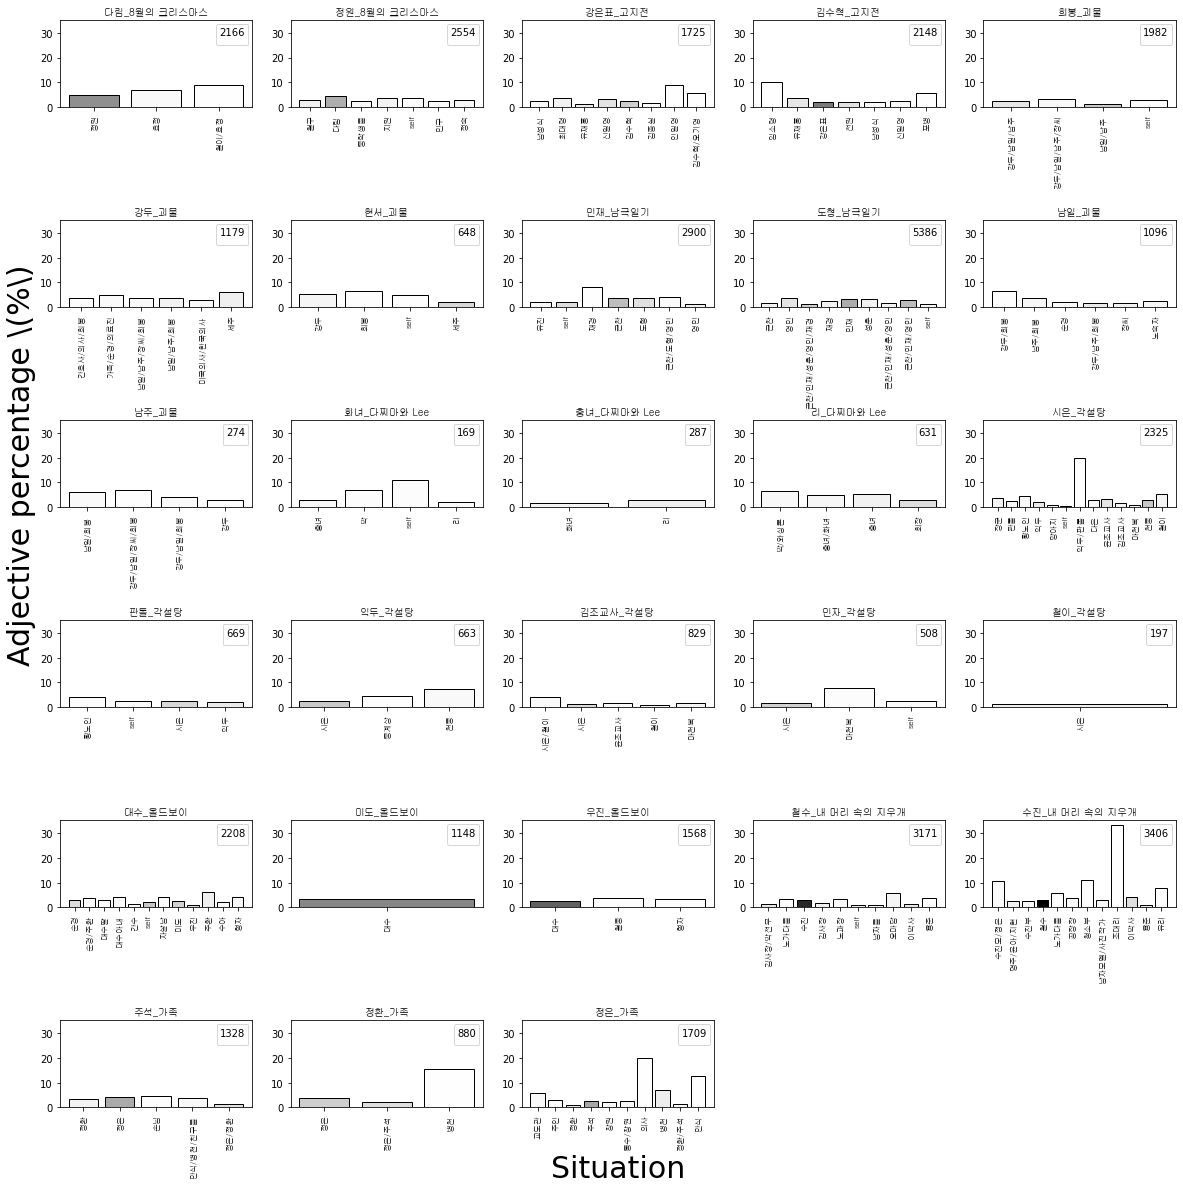

In [677]:
plt.figure(figsize=(20,20))

plt.subplot(6, 5, 11)
plt.ylabel('Adjective percentage \(%\)',fontsize = 30)

plt.subplot(6, 5, 28)
plt.xlabel('Situation',fontsize = 30)

for i in adj_plot:
    
    plt.subplot(6, 5, adj_plot.index(i)+1)
    plt.title(i[0]['speaker']+'_'+i[0]['movie_name'], fontproperties = fontprop)
    plt.ylim(0,35)
    val = []
    key = []
    label = i[0]['total_words']
    colors = []
    width = np.arange(len(i))

    for x in i:
        val.append((x['adj_count']/x['sit_words'])*100)
        key.append(x['listener'])
        colors.append((0,0,0,x['sit_words']/adj_high))

    plt.bar(width, val,color = colors,edgecolor='black')
    plt.xticks(width, key, fontproperties = fontprop, rotation=90,fontsize=8)
    plt.legend(loc='best', ncol=4,fontsize=8,labelcolor='black',title=label)
plt.subplots_adjust(wspace=0.2
                    ,hspace=1.3)
plt.show()

In [542]:
adv_plot=[]
for i in speak_dict:
    a = []
    for x in new_adv_list:
        if i == x['speaker']:
            a.append(x)
        else:
            continue
    adv_plot.append(a)

In [543]:
adv_plot

[[{'speaker': '다림',
   'listener': 'self',
   'movie_name': '8월의 크리스마스',
   'adv_count': 1,
   'sit_words': 7,
   'total_words': 2166},
  {'speaker': '다림',
   'listener': '정원',
   'movie_name': '8월의 크리스마스',
   'adv_count': 78,
   'sit_words': 1007,
   'total_words': 2166},
  {'speaker': '다림',
   'listener': '철이/효정',
   'movie_name': '8월의 크리스마스',
   'adv_count': 1,
   'sit_words': 11,
   'total_words': 2166},
  {'speaker': '다림',
   'listener': '효정',
   'movie_name': '8월의 크리스마스',
   'adv_count': 4,
   'sit_words': 58,
   'total_words': 2166}],
 [{'speaker': '정원',
   'listener': '다림',
   'movie_name': '8월의 크리스마스',
   'adv_count': 49,
   'sit_words': 723,
   'total_words': 2554},
  {'speaker': '정원',
   'listener': '철구',
   'movie_name': '8월의 크리스마스',
   'adv_count': 10,
   'sit_words': 135,
   'total_words': 2554},
  {'speaker': '정원',
   'listener': '중학생들',
   'movie_name': '8월의 크리스마스',
   'adv_count': 4,
   'sit_words': 43,
   'total_words': 2554},
  {'speaker': '정원',
   'listener': '지원',


In [671]:
adv_high = 0
for i in new_adv_list:
    if i['sit_words'] > adv_high:
        adv_high = i['sit_words']
    if i['sit_words'] == 2285:
        print(i)
        
print(adv_high)

{'speaker': '수진', 'listener': '철수', 'movie_name': '내 머리 속의 지우개', 'adv_count': 173, 'sit_words': 2285, 'total_words': 3406}
2285


In [672]:
adv_per = 0
for i in new_adv_list:
    if i['adv_count']/i['sit_words']> adv_per:
        adv_per = i['adv_count']/i['sit_words']
adv_per

1.0

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-678-1301cab705dd>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(6, 5, adv_plot.index(i)+1)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found t

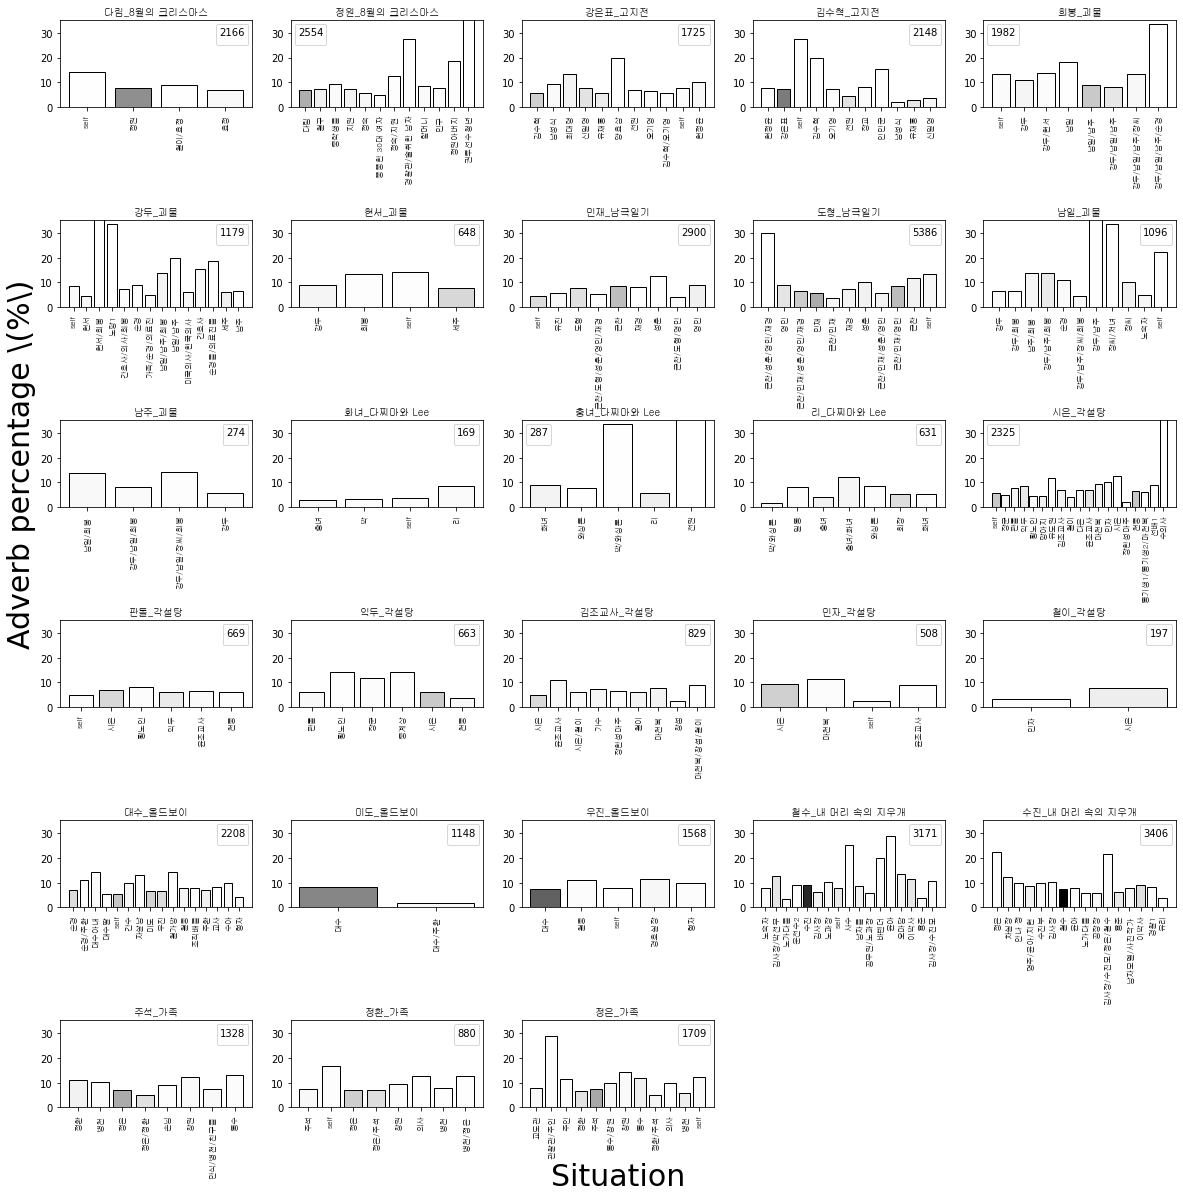

In [678]:
plt.figure(figsize=(20,20))

plt.subplot(6, 5, 11)
plt.ylabel('Adverb percentage \(%\)',fontsize = 30)

plt.subplot(6, 5, 28)
plt.xlabel('Situation',fontsize = 30)
for i in adv_plot:
    
    plt.subplot(6, 5, adv_plot.index(i)+1)
    plt.title(i[0]['speaker']+'_'+i[0]['movie_name'], fontproperties = fontprop)
    plt.ylim(0,35)
    val = []
    key = []
    label = i[0]['total_words']
    colors = []
    width = np.arange(len(i))

    for x in i:
        val.append((x['adv_count']/x['sit_words'])*100)
        key.append(x['listener'])
        colors.append((0,0,0,x['sit_words']/adv_high))

    plt.bar(width, val,color = colors,edgecolor='black')
    plt.xticks(width, key, fontproperties = fontprop, rotation=90,fontsize=8)
    plt.legend(loc='best', ncol=4,fontsize=8,labelcolor='black',title=label)
plt.subplots_adjust(wspace=0.2
                    ,hspace=1.3)
plt.show()

In [46]:
len(new_adj_list)

187

In [47]:
len(new_adv_list)

280

In [48]:
sit_dict

{'다림_self_8월의 크리스마스': 7,
 '다림_정원_8월의 크리스마스': 1007,
 '정원_다림_8월의 크리스마스': 723,
 '정원_철구_8월의 크리스마스': 135,
 '정원_중학생들_8월의 크리스마스': 43,
 '정원_중학생 3_8월의 크리스마스': 2,
 '정원_석희/아버지/정숙_8월의 크리스마스': 1,
 '정원_지원_8월의 크리스마스': 110,
 '정원_정숙_8월의 크리스마스': 72,
 '정원_뚱뚱한 30대 여자_8월의 크리스마스': 21,
 '정원_정숙/지원_8월의 크리스마스': 16,
 '정원_경찰관/술취한 남자_8월의 크리스마스': 11,
 '강은표_김수혁_고지전': 426,
 '김수혁_강은표_고지전': 1187,
 '김수혁_인민군_고지전': 13,
 '김수혁_현정윤_고지전': 13,
 '강은표_초병_고지전': 11,
 '강은표_위병_고지전': 11,
 '강은표_남성식_고지전': 42,
 '강은표_최대령_고지전': 104,
 '강은표_신일영_고지전': 251,
 '김수혁_임소령_고지전': 10,
 '강은표_유재홍_고지전': 170,
 '강은표_self_고지전': 26,
 'Character_self_고지전': 0,
 '김수혁_유재홍_고지전': 214,
 '강은표_양효삼_고지전': 10,
 '김수혁_self_고지전': 11,
 '김수혁_김수혁_고지전': 5,
 '김수혁_전원_고지전': 259,
 '다림_철이/효정_8월의 크리스마스': 11,
 '정원_할머니_8월의 크리스마스': 48,
 '정원_self_8월의 크리스마스': 26,
 '정원_민구_8월의 크리스마스': 38,
 '정원_정원아버지_8월의 크리스마스': 27,
 '정원_권투선수청년_8월의 크리스마스': 4,
 '다림_효정_8월의 크리스마스': 58,
 '희봉_self_괴물': 37,
 '강두_self_괴물': 58,
 '희봉_강두_괴물': 91,
 '강두_희봉_괴물': 24,
 '강두_현서_괴물': 67,
 '현서_강두_괴물': 91,
 '민재_self_남극일기': 30

In [49]:
speak_dict

{'다림': 1083,
 '정원': 1277,
 '강은표': 1255,
 '김수혁': 1941,
 '희봉': 991,
 '강두': 777,
 '현서': 486,
 '민재': 1450,
 '도형': 2693,
 '남일': 676,
 '남주': 158,
 '화녀': 169,
 '충녀': 287,
 '리': 631,
 '시은': 2325,
 '판돌': 669,
 '익두': 663,
 '김조교사': 829,
 '민자': 508,
 '철이': 197,
 '대수': 2208,
 '미도': 1148,
 '우진': 1568,
 '철수': 3171,
 '수진': 3406,
 '주석': 1328,
 '정환': 880,
 '정은': 1709,
 '나난': 5553,
 '동미': 4195,
 '정준': 1600,
 '수헌': 1322}

In [26]:
for i in sit_dict:
    if i not in adj_dict:
        adj_dict[i] = 0

In [27]:
for i in sit_dict:
    if i not in adv_dict:
        adv_dict[i] = 0

In [28]:
len(adj_dict)

407

In [29]:
len(adv_dict)

407

In [218]:
speak_dict

{'다림': 1083,
 '정원': 1277,
 '강은표': 1255,
 '김수혁': 1941,
 '희봉': 991,
 '강두': 777,
 '현서': 486,
 '민재': 1450,
 '도형': 2693,
 '남일': 676,
 '남주': 158,
 '화녀': 169,
 '충녀': 287,
 '리': 631,
 '시은': 2325,
 '판돌': 669,
 '익두': 663,
 '김조교사': 829,
 '민자': 508,
 '철이': 197,
 '고건수': 2174,
 '박창민': 1164,
 '대수': 2208,
 '미도': 1148,
 '우진': 1568,
 '철수': 3171,
 '수진': 3406,
 '주석': 1328,
 '정환': 880,
 '정은': 1709,
 '나난': 5553,
 '동미': 4195,
 '정준': 1600,
 '수헌': 1322}

In [30]:
new_list = []
for i in adj_dict:
    new_dict = {}
    index_list = []
    index = 0
    while index < len(i):
        index = i.find('_', index)
        if index != -1:
            index_list.append(index)
        if index == -1:
            break
        index += 1
    if i[:index_list[0]] == "Character":
        continue
    new_dict['speaker'] = i[:index_list[0]]
    new_dict['listener'] = i[index_list[0]+1:index_list[1]]
    new_dict['movie_name'] = i[index_list[1]+1:]
    new_dict['adj_count'] = adj_dict[i]
    new_dict['adv_count'] = adv_dict[i]
    new_dict['sit_words'] = sit_dict[i]
    new_dict['total_words'] = speak_dict[i[:index_list[0]]]
    new_list.append(new_dict)

In [167]:
new_adj_list

[{'speaker': '다림',
  'listener': '정원',
  'movie_name': '8월의 크리스마스',
  'adj_count': 49,
  'sit_words': 1007,
  'total_words': 1083},
 {'speaker': '다림',
  'listener': '효정',
  'movie_name': '8월의 크리스마스',
  'adj_count': 4,
  'sit_words': 58,
  'total_words': 1083},
 {'speaker': '다림',
  'listener': '철이/효정',
  'movie_name': '8월의 크리스마스',
  'adj_count': 1,
  'sit_words': 11,
  'total_words': 1083},
 {'speaker': '정원',
  'listener': '철구',
  'movie_name': '8월의 크리스마스',
  'adj_count': 4,
  'sit_words': 135,
  'total_words': 1277},
 {'speaker': '정원',
  'listener': '다림',
  'movie_name': '8월의 크리스마스',
  'adj_count': 33,
  'sit_words': 723,
  'total_words': 1277},
 {'speaker': '정원',
  'listener': '중학생들',
  'movie_name': '8월의 크리스마스',
  'adj_count': 1,
  'sit_words': 43,
  'total_words': 1277},
 {'speaker': '정원',
  'listener': '지원',
  'movie_name': '8월의 크리스마스',
  'adj_count': 4,
  'sit_words': 110,
  'total_words': 1277},
 {'speaker': '정원',
  'listener': 'self',
  'movie_name': '8월의 크리스마스',
  'adj_count': 

In [100]:
new_adv_list

[{'speaker': '다림',
  'listener': 'self',
  'movie_name': '8월의 크리스마스',
  'adj_count': 1,
  'sit_words': 7,
  'total_words': 2166},
 {'speaker': '다림',
  'listener': '정원',
  'movie_name': '8월의 크리스마스',
  'adj_count': 78,
  'sit_words': 1007,
  'total_words': 2166},
 {'speaker': '정원',
  'listener': '다림',
  'movie_name': '8월의 크리스마스',
  'adj_count': 49,
  'sit_words': 723,
  'total_words': 2554},
 {'speaker': '정원',
  'listener': '철구',
  'movie_name': '8월의 크리스마스',
  'adj_count': 10,
  'sit_words': 135,
  'total_words': 2554},
 {'speaker': '정원',
  'listener': '중학생들',
  'movie_name': '8월의 크리스마스',
  'adj_count': 4,
  'sit_words': 43,
  'total_words': 2554},
 {'speaker': '정원',
  'listener': '지원',
  'movie_name': '8월의 크리스마스',
  'adj_count': 8,
  'sit_words': 110,
  'total_words': 2554},
 {'speaker': '정원',
  'listener': '정숙',
  'movie_name': '8월의 크리스마스',
  'adj_count': 4,
  'sit_words': 72,
  'total_words': 2554},
 {'speaker': '정원',
  'listener': '뚱뚱한 30대 여자',
  'movie_name': '8월의 크리스마스',
  'adj_cou

In [31]:
for i in  new_list:
    if i['sit_words'] == 0:
        print(i)

{'speaker': '익두', 'listener': 'self', 'movie_name': '각설탕', 'adj_count': 0, 'adv_count': 0, 'sit_words': 0, 'total_words': 663}
{'speaker': '수헌', 'listener': '나난/두꺼비', 'movie_name': '싱글즈', 'adj_count': 0, 'adv_count': 0, 'sit_words': 0, 'total_words': 1322}


In [32]:
for i in new_list:
    i['mul'] = 'single'
    if ('/' in i['listener'] or '전원' in i['listener'] or '들' in i['listener']):
        i['mul'] = 'multiple'
    if 'self' in i['listener']:
        i['mul'] = 'self'

In [39]:
for i in new_list:
    if i['speaker'] in ['정원','강은표','현서','민재','화녀','충녀','판돌', '익두', '철이', '우진']:
        i['ext_type'] = 'introvert'
    else:
        i['ext_type'] = 'extravert'

In [40]:
for i in new_list:
    if i['ext_type'] == 'extravert':
        print(i['speaker'])

다림
김수혁
김수혁
김수혁
다림
다림
도형
도형
도형
도형
도형
도형
도형
도형
도형
남일
남주
남일
강두
강두
남일
희봉
희봉
강두
남주
남일
강두
남주
희봉
희봉
남일
강두
남일
남주
강두
김수혁
김수혁
김수혁
김수혁
리
리
리
시은
시은
시은
시은
시은
시은
시은
김조교사
김조교사
시은
시은
민자
시은
시은
시은
김조교사
민자
김조교사
민자
시은
김조교사
리
대수
대수
대수
대수
대수
대수
대수
미도
대수
대수
대수
대수
대수
수진
수진
수진
철수
철수
철수
수진
수진
수진
수진
철수
철수
철수
철수
수진
수진
수진
철수
수진
철수
철수
수진
주석
정은
정은
정은
정환
정환
주석
정은
정은
정은
주석
정은
주석
정은
정환
주석
정은
정은
나난
동미
나난
동미
수헌
동미
나난
정준
정준
나난
나난
동미
동미
동미
수헌
정준
수헌
나난
동미
나난
정준
나난
나난
정준
나난
동미
나난
다림
김수혁
김수혁
김수혁
김수혁
강두
희봉
강두
강두
도형
도형
도형
희봉
희봉
강두
강두
강두
희봉
남일
강두
희봉
강두
희봉
강두
남일
강두
희봉
남주
남일
강두
남일
남일
강두
남주
강두
강두
강두
강두
강두
남일
남일
강두
김수혁
김수혁
김수혁
리
리
리
시은
김조교사
민자
김조교사
시은
시은
김조교사
김조교사
시은
민자
시은
김조교사
시은
시은
김조교사
김조교사
시은
민자
리
리
대수
대수
대수
대수
미도
대수
대수
대수
대수
철수
수진
수진
수진
수진
수진
수진
수진
철수
철수
수진
수진
수진
철수
수진
철수
철수
철수
철수
수진
철수
수진
철수
수진
철수
수진
철수
정환
정은
정환
주석
정은
정환
정환
주석
정환
정환
정은
정은
정환
정은
주석
나난
나난
나난
나난
나난
나난
나난
나난
수헌
나난
수헌
동미
동미
나난
나난
나난
동미
동미
정준
나난


In [438]:
new_list

[{'speaker': '다림',
  'listener': '정원',
  'movie_name': '8월의 크리스마스',
  'adj_count': 49,
  'adv_count': 78,
  'sit_words': 1007,
  'total_words': 1083,
  'mul': 'single',
  'ext_type': 'extravert'},
 {'speaker': '정원',
  'listener': '철구',
  'movie_name': '8월의 크리스마스',
  'adj_count': 4,
  'adv_count': 10,
  'sit_words': 135,
  'total_words': 1277,
  'mul': 'single',
  'ext_type': 'introvert'},
 {'speaker': '정원',
  'listener': '다림',
  'movie_name': '8월의 크리스마스',
  'adj_count': 33,
  'adv_count': 49,
  'sit_words': 723,
  'total_words': 1277,
  'mul': 'single',
  'ext_type': 'introvert'},
 {'speaker': '정원',
  'listener': '중학생들',
  'movie_name': '8월의 크리스마스',
  'adj_count': 1,
  'adv_count': 4,
  'sit_words': 43,
  'total_words': 1277,
  'mul': 'multiple',
  'ext_type': 'introvert'},
 {'speaker': '정원',
  'listener': '지원',
  'movie_name': '8월의 크리스마스',
  'adj_count': 4,
  'adv_count': 8,
  'sit_words': 110,
  'total_words': 1277,
  'mul': 'single',
  'ext_type': 'introvert'},
 {'speaker': '강은표',
 

In [92]:
self_dict

{'정원_8월의 크리스마스': {'speaker': '정원',
  'movie_name': '8월의 크리스마스',
  'adj_count': 1,
  'adv_count': 0,
  'sit_words': 26,
  'total_words': 1277},
 '민재_남극일기': {'speaker': '민재',
  'movie_name': '남극일기',
  'adj_count': 6,
  'adv_count': 14,
  'sit_words': 304,
  'total_words': 1450},
 '도형_남극일기': {'speaker': '도형',
  'movie_name': '남극일기',
  'adj_count': 1,
  'adv_count': 9,
  'sit_words': 68,
  'total_words': 2693},
 '현서_괴물': {'speaker': '현서',
  'movie_name': '괴물',
  'adj_count': 1,
  'adv_count': 3,
  'sit_words': 21,
  'total_words': 486},
 '희봉_괴물': {'speaker': '희봉',
  'movie_name': '괴물',
  'adj_count': 1,
  'adv_count': 5,
  'sit_words': 37,
  'total_words': 991},
 '화녀_다찌마와 Lee': {'speaker': '화녀',
  'movie_name': '다찌마와 Lee',
  'adj_count': 3,
  'adv_count': 1,
  'sit_words': 27,
  'total_words': 169},
 '판돌_각설탕': {'speaker': '판돌',
  'movie_name': '각설탕',
  'adj_count': 1,
  'adv_count': 2,
  'sit_words': 40,
  'total_words': 669},
 '시은_각설탕': {'speaker': '시은',
  'movie_name': '각설탕',
  'adj_coun

In [93]:
single_dict

{'다림_8월의 크리스마스': {'speaker': '다림',
  'movie_name': '8월의 크리스마스',
  'adj_count': 53,
  'adv_count': 82,
  'sit_words': 1065,
  'total_words': 1083},
 '정원_8월의 크리스마스': {'speaker': '정원',
  'movie_name': '8월의 크리스마스',
  'adj_count': 44,
  'adv_count': 87,
  'sit_words': 1180,
  'total_words': 1277},
 '강은표_고지전': {'speaker': '강은표',
  'movie_name': '고지전',
  'adj_count': 28,
  'adv_count': 82,
  'sit_words': 1183,
  'total_words': 1255},
 '김수혁_고지전': {'speaker': '김수혁',
  'movie_name': '고지전',
  'adj_count': 36,
  'adv_count': 107,
  'sit_words': 1671,
  'total_words': 1941},
 '현서_괴물': {'speaker': '현서',
  'movie_name': '괴물',
  'adj_count': 14,
  'adv_count': 37,
  'sit_words': 456,
  'total_words': 486},
 '민재_남극일기': {'speaker': '민재',
  'movie_name': '남극일기',
  'adj_count': 35,
  'adv_count': 88,
  'sit_words': 1075,
  'total_words': 1450},
 '도형_남극일기': {'speaker': '도형',
  'movie_name': '남극일기',
  'adj_count': 44,
  'adv_count': 100,
  'sit_words': 1358,
  'total_words': 2693},
 '남일_괴물': {'speaker': '남일

In [94]:
multiple_dict

{'정원_8월의 크리스마스': {'speaker': '정원',
  'movie_name': '8월의 크리스마스',
  'adj_count': 1,
  'adv_count': 9,
  'sit_words': 71,
  'total_words': 1277},
 '다림_8월의 크리스마스': {'speaker': '다림',
  'movie_name': '8월의 크리스마스',
  'adj_count': 1,
  'adv_count': 1,
  'sit_words': 11,
  'total_words': 1083},
 '도형_남극일기': {'speaker': '도형',
  'movie_name': '남극일기',
  'adj_count': 26,
  'adv_count': 93,
  'sit_words': 1267,
  'total_words': 2693},
 '민재_남극일기': {'speaker': '민재',
  'movie_name': '남극일기',
  'adj_count': 2,
  'adv_count': 3,
  'sit_words': 71,
  'total_words': 1450},
 '남일_괴물': {'speaker': '남일',
  'movie_name': '괴물',
  'adj_count': 7,
  'adv_count': 45,
  'sit_words': 364,
  'total_words': 676},
 '남주_괴물': {'speaker': '남주',
  'movie_name': '괴물',
  'adj_count': 6,
  'adv_count': 13,
  'sit_words': 116,
  'total_words': 158},
 '강두_괴물': {'speaker': '강두',
  'movie_name': '괴물',
  'adj_count': 11,
  'adv_count': 32,
  'sit_words': 393,
  'total_words': 777},
 '희봉_괴물': {'speaker': '희봉',
  'movie_name': '괴물',
  '

In [33]:
new_dict = {}
for i in new_list:
    a = i['speaker'] +'_'+ i['movie_name']
    if a not in new_dict:
        new_dict[a] = {}
        new_dict[a]['speaker'] = i['speaker']
        new_dict[a]['movie_name'] = i['movie_name']
        new_dict[a]['total_words'] = i['total_words']
        new_dict[a]['adj_count'] = 0
        new_dict[a]['adv_count'] = 0
        new_dict[a]['sit_words'] = 0
#         new_dict[a]['ext_type'] = i['ext_type']
        new_dict[a]['adj_count_self'] = 0
        new_dict[a]['adv_count_self'] = 0
        new_dict[a]['sit_words_self'] = 0
        new_dict[a]['adj_count_single'] = 0
        new_dict[a]['adv_count_single'] = 0
        new_dict[a]['sit_words_single'] = 0
        new_dict[a]['adj_count_multiple'] = 0
        new_dict[a]['adv_count_multiple'] = 0
        new_dict[a]['sit_words_multiple'] = 0

In [34]:
for i in new_list:
    a = i['speaker'] +'_'+ i['movie_name']
    if i['mul'] == 'self':
        new_dict[a]['adj_count_self'] += i['adj_count']
        new_dict[a]['adv_count_self'] += i['adv_count']
        new_dict[a]['sit_words_self'] += i['sit_words']
        new_dict[a]['adj_count'] += i['adj_count']
        new_dict[a]['adv_count'] += i['adv_count']
        new_dict[a]['sit_words'] += i['sit_words']
    if i['mul'] == 'single':
        new_dict[a]['adj_count_single'] += i['adj_count']
        new_dict[a]['adv_count_single'] += i['adv_count']
        new_dict[a]['sit_words_single'] += i['sit_words']
        new_dict[a]['adj_count'] += i['adj_count']
        new_dict[a]['adv_count'] += i['adv_count']
        new_dict[a]['sit_words'] += i['sit_words']
    if i['mul'] == 'multiple':
        new_dict[a]['adj_count_multiple'] += i['adj_count']
        new_dict[a]['adv_count_multiple'] += i['adv_count']
        new_dict[a]['sit_words_multiple'] += i['sit_words']
        new_dict[a]['adj_count'] += i['adj_count']
        new_dict[a]['adv_count'] += i['adv_count']
        new_dict[a]['sit_words'] += i['sit_words']

In [172]:
new_dict['리_다찌마와 Lee']

{'speaker': '리',
 'movie_name': '다찌마와 Lee',
 'total_words': 631,
 'adj_count': 23,
 'adv_count': 37,
 'sit_words': 631,
 'adj_count_self': 0,
 'adv_count_self': 0,
 'sit_words_self': 1,
 'adj_count_single': 15,
 'adv_count_single': 26,
 'sit_words_single': 486,
 'adj_count_multiple': 8,
 'adv_count_multiple': 11,
 'sit_words_multiple': 144}

In [346]:
new_dict

{'다림_8월의 크리스마스': {'speaker': '다림',
  'movie_name': '8월의 크리스마스',
  'adj_count': 0.04986149584487535,
  'adv_count': 0.07756232686980609,
  'sit_words': 1083,
  'total_words': 1083,
  'ext_type': 'extravert',
  'adj_count_self': 0.0,
  'adv_count_self': 0.14285714285714285,
  'sit_words_self': 7,
  'adj_count_single': 0.04976525821596244,
  'adv_count_single': 0.07699530516431925,
  'sit_words_single': 1065,
  'adj_count_multiple': 0.09090909090909091,
  'adv_count_multiple': 0.09090909090909091,
  'sit_words_multiple': 11},
 '정원_8월의 크리스마스': {'speaker': '정원',
  'movie_name': '8월의 크리스마스',
  'adj_count': 0.036021926389976505,
  'adv_count': 0.07517619420516837,
  'sit_words': 1277,
  'total_words': 1277,
  'ext_type': 'introvert',
  'adj_count_self': 0.038461538461538464,
  'adv_count_self': 0.0,
  'sit_words_self': 26,
  'adj_count_single': 0.03728813559322034,
  'adv_count_single': 0.07372881355932204,
  'sit_words_single': 1180,
  'adj_count_multiple': 0.014084507042253521,
  'adv_count

In [36]:
for k,v in new_dict.items():
    v['adj_count'] = v['adj_count']/v['total_words']
    v['adv_count'] = v['adv_count']/v['total_words']
    v['adj_count_self'] = v['adj_count_self']/v['sit_words_self']
    v['adv_count_self'] = v['adv_count_self']/v['sit_words_self']
    v['adj_count_single'] = v['adj_count_single']/v['sit_words_single']
    v['adv_count_single'] = v['adv_count_single']/v['sit_words_single']
    v['adj_count_multiple'] = v['adj_count_multiple']/v['sit_words_multiple']
    v['adv_count_multiple'] = v['adv_count_multiple']/v['sit_words_multiple']

In [38]:
for k,v in new_dict.items():
    v['sit_words_self'] = v['sit_words_self']/v['total_words']
    v['sit_words_single'] = v['sit_words_single']/v['total_words']
    v['sit_words_multiple'] = v['sit_words_multiple']/v['total_words']

In [39]:
for k,v in new_dict.items():
    new_dict[k]['total speech quantity (words)'] = v['total_words']
    new_dict[k]['total adjective percentage (%)'] = round(v['adj_count']*100,2)
    new_dict[k]['total adverb percentage (%)'] = round(v['adv_count']*100,2)
    new_dict[k]['monologue speech percentage (%)'] = round(v['sit_words_self']*100,2)
    new_dict[k]['monologue adjective percentage (%)'] = round(v['adj_count_self']*100,2)
    new_dict[k]['monologue adverb percentage (%)'] = round(v['adv_count_self']*100,2)
    new_dict[k]['single listener dialogue speech percentage (%)'] = round(v['sit_words_single']*100,2)
    new_dict[k]['single listener dialogue adjective percentage (%)'] = round(v['adj_count_single']*100,2)
    new_dict[k]['single listener dialogue adverb percentage (%)'] = round(v['adv_count_single']*100,2)
    new_dict[k]['multiple listener dialogue speech percentage (%)'] = round(v['sit_words_multiple']*100,2)
    new_dict[k]['multiple listener dialogue adjective percentage (%)'] = round(v['adj_count_multiple']*100,2)
    new_dict[k]['multiple listener dialogue adverb percentage (%)'] = round(v['adv_count_multiple']*100,2)

In [178]:
new_dict

{'다림_8월의 크리스마스': {'speaker': '다림',
  'movie_name': '8월의 크리스마스',
  'total_words': 1083,
  'adj_count': 0.04986149584487535,
  'adv_count': 0.07756232686980609,
  'sit_words': 1083,
  'adj_count_self': 0.0,
  'adv_count_self': 0.14285714285714285,
  'sit_words_self': 0.006463527239150508,
  'adj_count_single': 0.04976525821596244,
  'adv_count_single': 0.07699530516431925,
  'sit_words_single': 0.9833795013850416,
  'adj_count_multiple': 0.09090909090909091,
  'adv_count_multiple': 0.09090909090909091,
  'sit_words_multiple': 0.010156971375807941,
  'total speech quantity (words)': 1083,
  'total adjective percentage (%)': 4.99,
  'total adverb percentage (%)': 7.76,
  'monologue speech percentage (%)': 0.65,
  'monologue adjective percentage (%)': 0.0,
  'monologue adverb percentage (%)': 14.29,
  'single listener dialogue speech percentage (%)': 98.34,
  'single listener dialogue adjective percentage (%)': 4.98,
  'single listener dialogue adverb percentage (%)': 7.7,
  'multiple liste

In [166]:
new_dict

{'다림_8월의 크리스마스': {'speaker': '다림',
  'movie_name': '8월의 크리스마스',
  'adj_count': 0.04986149584487535,
  'adv_count': 0.07756232686980609,
  'sit_words': 1083,
  'total_words': 1083,
  'adj_count_self': 0.0,
  'adv_count_self': 0.14285714285714285,
  'sit_words_self': 0.006463527239150508,
  'adj_count_single': 0.04976525821596244,
  'adv_count_single': 0.07699530516431925,
  'sit_words_single': 0.9833795013850416,
  'adj_count_multiple': 0.09090909090909091,
  'adv_count_multiple': 0.09090909090909091,
  'sit_words_multiple': 0.010156971375807941},
 '정원_8월의 크리스마스': {'speaker': '정원',
  'movie_name': '8월의 크리스마스',
  'adj_count': 0.036021926389976505,
  'adv_count': 0.07517619420516837,
  'sit_words': 1277,
  'total_words': 1277,
  'adj_count_self': 0.038461538461538464,
  'adv_count_self': 0.0,
  'sit_words_self': 0.020360219263899765,
  'adj_count_single': 0.03728813559322034,
  'adv_count_single': 0.07372881355932204,
  'sit_words_single': 0.9240407204385278,
  'adj_count_multiple': 0.014

In [128]:
for k,v in new_dict.items():
    print(k, v['total_words'])

다림_8월의 크리스마스 1083
정원_8월의 크리스마스 1277
강은표_고지전 1255
김수혁_고지전 1941
현서_괴물 486
민재_남극일기 1450
도형_남극일기 2693
남일_괴물 676
남주_괴물 158
강두_괴물 777
희봉_괴물 991
충녀_다찌마와 Lee 287
화녀_다찌마와 Lee 169
리_다찌마와 Lee 631
판돌_각설탕 669
시은_각설탕 2325
익두_각설탕 663
철이_각설탕 197
김조교사_각설탕 829
민자_각설탕 508
대수_올드보이 2208
미도_올드보이 1148
우진_올드보이 1568
수진_내 머리 속의 지우개 3406
철수_내 머리 속의 지우개 3171
주석_가족 1328
정은_가족 1709
정환_가족 880
나난_싱글즈 5553
동미_싱글즈 4195
수헌_싱글즈 1322
정준_싱글즈 1600


In [185]:
print(new_dict['다림_8월의 크리스마스'])

{'speaker': '다림', 'movie_name': '8월의 크리스마스', 'total_words': 1083, 'adj_count': 54, 'adv_count': 84, 'sit_words': 1083, 'adj_count_self': 0, 'adv_count_self': 1, 'sit_words_self': 7, 'adj_count_single': 53, 'adv_count_single': 82, 'sit_words_single': 1065, 'adj_count_multiple': 1, 'adv_count_multiple': 1, 'sit_words_multiple': 11}


In [40]:
new_keys = []
for i in new_dict:
    new_keys.append(i)

In [ ]:
plt.figure(figsize=(20,20))

plt.subplot(7, 5, 11)
plt.ylabel('Adjective percentage \(%\)',fontsize = 30)

plt.subplot(7, 5, 33)
plt.xlabel('Listener type',fontsize = 30)

for k,v in new_dict.items():
    
    plt.subplot(6, 5, new_keys.index(k)+1)
    plt.title(v['speaker']+'_'+v['movie_name'], fontproperties = fontprop)
    plt.ylim(0,35)
    val = []
    key = []
    label = ['total_words']
    colors = []
    width = np.arange(len(i))

    for x in i:
        val.append((x['adj_count']/x['sit_words'])*100)
        key.append(x['listener'])
        colors.append((0,0,0,x['sit_words']/adj_high))

    plt.bar(width, val,color = colors,edgecolor='black')
    plt.xticks(width, key, fontproperties = fontprop, rotation=90,fontsize=8)
    plt.legend(loc='best', ncol=4,fontsize=8,labelcolor='black',title=label)
plt.subplots_adjust(wspace=0.2
                    ,hspace=1.3)
plt.show()

In [230]:
df = pd.DataFrame(new_dict)

In [231]:
df

,다림_8월의 크리스마스,정원_8월의 크리스마스,강은표_고지전,김수혁_고지전,현서_괴물,민재_남극일기,도형_남극일기,남일_괴물,남주_괴물,강두_괴물,...,우진_올드보이,수진_내 머리 속의 지우개,철수_내 머리 속의 지우개,주석_가족,정은_가족,정환_가족,나난_싱글즈,동미_싱글즈,수헌_싱글즈,정준_싱글즈
speaker,다림,정원,강은표,김수혁,현서,민재,도형,남일,남주,강두,...,우진,수진,철수,주석,정은,정환,나난,동미,수헌,정준
movie_name,8월의 크리스마스,8월의 크리스마스,고지전,고지전,괴물,남극일기,남극일기,괴물,괴물,괴물,...,올드보이,내 머리 속의 지우개,내 머리 속의 지우개,가족,가족,가족,싱글즈,싱글즈,싱글즈,싱글즈
total_words,1083,1277,1255,1941,486,1450,2693,676,158,777,...,1568,3406,3171,1328,1709,880,5553,4195,1322,1600
adj_count,0.049861,0.036022,0.023108,0.021123,0.030864,0.029655,0.026365,0.017751,0.044304,0.024453,...,0.022959,0.028186,0.024598,0.033133,0.025746,0.027273,0.025932,0.020977,0.03177,0.024375
adv_count,0.077562,0.075176,0.069323,0.062854,0.082305,0.072414,0.075009,0.106509,0.094937,0.07722,...,0.075893,0.076629,0.0924,0.073042,0.081334,0.073864,0.076355,0.065554,0.086989,0.065625
sit_words,1083,1277,1255,1941,486,1450,2693,676,158,777,...,1568,3406,3171,1328,1709,880,5553,4195,1322,1600
adj_count_self,0.0,0.038462,0.0,0.0,0.047619,0.019737,0.014706,0.0,0.0,0.0,...,0.0,0.0,0.010204,0.0,0.0,0.0,0.020356,0.0,0.090909,0.0
adv_count_self,0.142857,0.0,0.076923,0.272727,0.142857,0.046053,0.132353,0.222222,0.0,0.086207,...,0.076923,0.0,0.076531,0.0,0.122807,0.166667,0.068702,0.0,0.090909,0.0
sit_words_self,0.006464,0.02036,0.020717,0.005667,0.04321,0.209655,0.025251,0.013314,0.050633,0.074646,...,0.008291,0.001468,0.06181,0.0,0.033353,0.020455,0.212318,0.0,0.008321,0.0
adj_count_single,0.049765,0.037288,0.023669,0.021544,0.030702,0.032558,0.032401,0.016502,0.029412,0.02454,...,0.023151,0.027319,0.028141,0.037962,0.027759,0.032316,0.02823,0.022781,0.031538,0.027848


In [232]:
df = df.drop(['speaker','movie_name','sit_words','total_words', 'adj_count', 'adv_count', 'adj_count_self','adv_count_self', 'sit_words_self',
        'adj_count_single', 'adv_count_single', 'sit_words_single', 'adj_count_multiple', 'adv_count_multiple','sit_words_multiple'])

In [233]:
df

,다림_8월의 크리스마스,정원_8월의 크리스마스,강은표_고지전,김수혁_고지전,현서_괴물,민재_남극일기,도형_남극일기,남일_괴물,남주_괴물,강두_괴물,...,우진_올드보이,수진_내 머리 속의 지우개,철수_내 머리 속의 지우개,주석_가족,정은_가족,정환_가족,나난_싱글즈,동미_싱글즈,수헌_싱글즈,정준_싱글즈
total speech quantity (words),1083,1277,1255,1941,486,1450,2693,676,158,777,...,1568,3406,3171,1328,1709,880,5553,4195,1322,1600
total adjective percentage (%),4.99,3.6,2.31,2.11,3.09,2.97,2.64,1.78,4.43,2.45,...,2.3,2.82,2.46,3.31,2.57,2.73,2.59,2.1,3.18,2.44
total adverb percentage (%),7.76,7.52,6.93,6.29,8.23,7.24,7.5,10.65,9.49,7.72,...,7.59,7.66,9.24,7.3,8.13,7.39,7.64,6.56,8.7,6.56
monologue speech percentage (%),0.65,2.04,2.07,0.57,4.32,20.97,2.53,1.33,5.06,7.46,...,0.83,0.15,6.18,0.0,3.34,2.05,21.23,0.0,0.83,0.0
monologue adjective percentage (%),0.0,3.85,0.0,0.0,4.76,1.97,1.47,0.0,0.0,0.0,...,0.0,0.0,1.02,0.0,0.0,0.0,2.04,0.0,9.09,0.0
monologue adverb percentage (%),14.29,0.0,7.69,27.27,14.29,4.61,13.24,22.22,0.0,8.62,...,7.69,0.0,7.65,0.0,12.28,16.67,6.87,0.0,9.09,0.0
single listener dialogue speech percentage (%),98.34,92.4,94.26,86.09,93.83,74.14,50.43,44.82,21.52,41.96,...,99.17,92.43,79.56,75.38,86.42,63.3,58.69,71.16,98.34,49.38
single listener dialogue adjective percentage (%),4.98,3.73,2.37,2.15,3.07,3.26,3.24,1.65,2.94,2.45,...,2.32,2.73,2.81,3.8,2.78,3.23,2.82,2.28,3.15,2.78
single listener dialogue adverb percentage (%),7.7,7.37,6.93,6.4,8.11,8.19,7.36,8.25,5.88,7.06,...,7.59,7.69,9.2,7.89,7.85,7.36,8.32,6.67,8.77,6.71
multiple listener dialogue speech percentage (%),1.02,5.56,3.67,13.34,1.85,4.9,47.05,53.85,73.42,50.58,...,0.0,7.43,14.25,24.62,10.24,34.66,20.08,28.84,0.83,50.62


In [234]:
df = df.T
df

,total speech quantity (words),total adjective percentage (%),total adverb percentage (%),monologue speech percentage (%),monologue adjective percentage (%),monologue adverb percentage (%),single listener dialogue speech percentage (%),single listener dialogue adjective percentage (%),single listener dialogue adverb percentage (%),multiple listener dialogue speech percentage (%),multiple listener dialogue adjective percentage (%),multiple listener dialogue adverb percentage (%)
다림_8월의 크리스마스,1083,4.99,7.76,0.65,0.0,14.29,98.34,4.98,7.7,1.02,9.09,9.09
정원_8월의 크리스마스,1277,3.6,7.52,2.04,3.85,0.0,92.4,3.73,7.37,5.56,1.41,12.68
강은표_고지전,1255,2.31,6.93,2.07,0.0,7.69,94.26,2.37,6.93,3.67,2.17,6.52
김수혁_고지전,1941,2.11,6.29,0.57,0.0,27.27,86.09,2.15,6.4,13.34,1.93,4.63
현서_괴물,486,3.09,8.23,4.32,4.76,14.29,93.83,3.07,8.11,1.85,0.0,0.0
민재_남극일기,1450,2.97,7.24,20.97,1.97,4.61,74.14,3.26,8.19,4.9,2.82,4.23
도형_남극일기,2693,2.64,7.5,2.53,1.47,13.24,50.43,3.24,7.36,47.05,2.05,7.34
남일_괴물,676,1.78,10.65,1.33,0.0,22.22,44.82,1.65,8.25,53.85,1.92,12.36
남주_괴물,158,4.43,9.49,5.06,0.0,0.0,21.52,2.94,5.88,73.42,5.17,11.21
강두_괴물,777,2.45,7.72,7.46,0.0,8.62,41.96,2.45,7.06,50.58,2.8,8.14


In [243]:
df['global_cluster'] = pred_plus
df['monologue_cluster'] = pred_plus_self
df['onelistener_cluster'] = pred_plus_single
df['multilistener_cluster'] = pred_plus_multiple

In [244]:
df

,total speech quantity (words),total adjective percentage (%),total adverb percentage (%),monologue speech percentage (%),monologue adjective percentage (%),monologue adverb percentage (%),single listener dialogue speech percentage (%),single listener dialogue adjective percentage (%),single listener dialogue adverb percentage (%),multiple listener dialogue speech percentage (%),multiple listener dialogue adjective percentage (%),multiple listener dialogue adverb percentage (%),global_cluster,monologue_cluster,onelistener_cluster,multilistener_cluster
다림_8월의 크리스마스,1083,4.99,7.76,0.65,0.0,14.29,98.34,4.98,7.7,1.02,9.09,9.09,0,0,0,2
정원_8월의 크리스마스,1277,3.6,7.52,2.04,3.85,0.0,92.4,3.73,7.37,5.56,1.41,12.68,0,2,0,2
강은표_고지전,1255,2.31,6.93,2.07,0.0,7.69,94.26,2.37,6.93,3.67,2.17,6.52,0,2,3,2
김수혁_고지전,1941,2.11,6.29,0.57,0.0,27.27,86.09,2.15,6.4,13.34,1.93,4.63,3,0,3,2
현서_괴물,486,3.09,8.23,4.32,4.76,14.29,93.83,3.07,8.11,1.85,0.0,0.0,0,0,0,1
민재_남극일기,1450,2.97,7.24,20.97,1.97,4.61,74.14,3.26,8.19,4.9,2.82,4.23,2,1,0,2
도형_남극일기,2693,2.64,7.5,2.53,1.47,13.24,50.43,3.24,7.36,47.05,2.05,7.34,3,0,1,0
남일_괴물,676,1.78,10.65,1.33,0.0,22.22,44.82,1.65,8.25,53.85,1.92,12.36,3,0,1,0
남주_괴물,158,4.43,9.49,5.06,0.0,0.0,21.52,2.94,5.88,73.42,5.17,11.21,3,2,1,0
강두_괴물,777,2.45,7.72,7.46,0.0,8.62,41.96,2.45,7.06,50.58,2.8,8.14,3,0,1,0


In [353]:
csv_test_gunju = pd.read_csv('Gunju_survey_finished.csv')

In [354]:
csv_test_gunju['char1'] = csv_test_gunju['인물1_이름'] + '_' + csv_test_gunju['인물1_영화']

In [355]:
csv_test_gunju

,인물1_이름,인물1_영화,인물2_이름,인물2_영화,유사성,char1
0,다림,8월의 크리스마스,정원,8월의 크리스마스,0,다림_8월의 크리스마스
1,다림,8월의 크리스마스,강은표,고지전,1,다림_8월의 크리스마스
2,다림,8월의 크리스마스,김수혁,고지전,0,다림_8월의 크리스마스
3,다림,8월의 크리스마스,고건수,끝까지 간다,1,다림_8월의 크리스마스
4,다림,8월의 크리스마스,박창민,끝까지 간다,0,다림_8월의 크리스마스
5,다림,8월의 크리스마스,대수,올드보이,0,다림_8월의 크리스마스
6,다림,8월의 크리스마스,미도,올드보이,1,다림_8월의 크리스마스
7,다림,8월의 크리스마스,우진,올드보이,0,다림_8월의 크리스마스
8,다림,8월의 크리스마스,철수,내 머리 속의 지우개,1,다림_8월의 크리스마스
9,다림,8월의 크리스마스,수진,내 머리 속의 지우개,0,다림_8월의 크리스마스


In [356]:
csv_test_gunju['char2'] = csv_test_gunju['인물2_이름'] + '_' + csv_test_gunju['인물2_영화']

In [357]:
csv_test_gunju

,인물1_이름,인물1_영화,인물2_이름,인물2_영화,유사성,char1,char2
0,다림,8월의 크리스마스,정원,8월의 크리스마스,0,다림_8월의 크리스마스,정원_8월의 크리스마스
1,다림,8월의 크리스마스,강은표,고지전,1,다림_8월의 크리스마스,강은표_고지전
2,다림,8월의 크리스마스,김수혁,고지전,0,다림_8월의 크리스마스,김수혁_고지전
3,다림,8월의 크리스마스,고건수,끝까지 간다,1,다림_8월의 크리스마스,고건수_끝까지 간다
4,다림,8월의 크리스마스,박창민,끝까지 간다,0,다림_8월의 크리스마스,박창민_끝까지 간다
5,다림,8월의 크리스마스,대수,올드보이,0,다림_8월의 크리스마스,대수_올드보이
6,다림,8월의 크리스마스,미도,올드보이,1,다림_8월의 크리스마스,미도_올드보이
7,다림,8월의 크리스마스,우진,올드보이,0,다림_8월의 크리스마스,우진_올드보이
8,다림,8월의 크리스마스,철수,내 머리 속의 지우개,1,다림_8월의 크리스마스,철수_내 머리 속의 지우개
9,다림,8월의 크리스마스,수진,내 머리 속의 지우개,0,다림_8월의 크리스마스,수진_내 머리 속의 지우개


In [245]:
index_list = ['다림_8월의 크리스마스', '정원_8월의 크리스마스', '강은표_고지전', '김수혁_고지전', '희봉_괴물', '강두_괴물', '현서_괴물', '민재_남극일기', '도형_남극일기', '남일_괴물', '남주_괴물', '화녀_다찌마와 Lee', '충녀_다찌마와 Lee', '리_다찌마와 Lee', '시은_각설탕', '판돌_각설탕', '익두_각설탕', '김조교사_각설탕', '민자_각설탕', '철이_각설탕', '고건수_끝까지 간다', '박창민_끝까지 간다', '대수_올드보이', '미도_올드보이', '우진_올드보이', '철수_내 머리 속의 지우개', '수진_내 머리 속의 지우개', '주석_가족', '정환_가족', '정은_가족', '나난_싱글즈', '동미_싱글즈', '정준_싱글즈', '수헌_싱글즈']

In [246]:
index_list

['다림_8월의 크리스마스',
 '정원_8월의 크리스마스',
 '강은표_고지전',
 '김수혁_고지전',
 '희봉_괴물',
 '강두_괴물',
 '현서_괴물',
 '민재_남극일기',
 '도형_남극일기',
 '남일_괴물',
 '남주_괴물',
 '화녀_다찌마와 Lee',
 '충녀_다찌마와 Lee',
 '리_다찌마와 Lee',
 '시은_각설탕',
 '판돌_각설탕',
 '익두_각설탕',
 '김조교사_각설탕',
 '민자_각설탕',
 '철이_각설탕',
 '고건수_끝까지 간다',
 '박창민_끝까지 간다',
 '대수_올드보이',
 '미도_올드보이',
 '우진_올드보이',
 '철수_내 머리 속의 지우개',
 '수진_내 머리 속의 지우개',
 '주석_가족',
 '정환_가족',
 '정은_가족',
 '나난_싱글즈',
 '동미_싱글즈',
 '정준_싱글즈',
 '수헌_싱글즈']

In [247]:
def to_csv_list(data):
    csv_list = []
    x = 0
    while True:
        for i in range(x + 1,len(data)):
            csv_list.append([data[x],data[i]])
        x = x + 1
        if data[x] == data[-1]:
            break
    return csv_list

In [248]:
index_list = to_csv_list(index_list)

In [249]:
index_list

[['다림_8월의 크리스마스', '정원_8월의 크리스마스'],
 ['다림_8월의 크리스마스', '강은표_고지전'],
 ['다림_8월의 크리스마스', '김수혁_고지전'],
 ['다림_8월의 크리스마스', '희봉_괴물'],
 ['다림_8월의 크리스마스', '강두_괴물'],
 ['다림_8월의 크리스마스', '현서_괴물'],
 ['다림_8월의 크리스마스', '민재_남극일기'],
 ['다림_8월의 크리스마스', '도형_남극일기'],
 ['다림_8월의 크리스마스', '남일_괴물'],
 ['다림_8월의 크리스마스', '남주_괴물'],
 ['다림_8월의 크리스마스', '화녀_다찌마와 Lee'],
 ['다림_8월의 크리스마스', '충녀_다찌마와 Lee'],
 ['다림_8월의 크리스마스', '리_다찌마와 Lee'],
 ['다림_8월의 크리스마스', '시은_각설탕'],
 ['다림_8월의 크리스마스', '판돌_각설탕'],
 ['다림_8월의 크리스마스', '익두_각설탕'],
 ['다림_8월의 크리스마스', '김조교사_각설탕'],
 ['다림_8월의 크리스마스', '민자_각설탕'],
 ['다림_8월의 크리스마스', '철이_각설탕'],
 ['다림_8월의 크리스마스', '고건수_끝까지 간다'],
 ['다림_8월의 크리스마스', '박창민_끝까지 간다'],
 ['다림_8월의 크리스마스', '대수_올드보이'],
 ['다림_8월의 크리스마스', '미도_올드보이'],
 ['다림_8월의 크리스마스', '우진_올드보이'],
 ['다림_8월의 크리스마스', '철수_내 머리 속의 지우개'],
 ['다림_8월의 크리스마스', '수진_내 머리 속의 지우개'],
 ['다림_8월의 크리스마스', '주석_가족'],
 ['다림_8월의 크리스마스', '정환_가족'],
 ['다림_8월의 크리스마스', '정은_가족'],
 ['다림_8월의 크리스마스', '나난_싱글즈'],
 ['다림_8월의 크리스마스', '동미_싱글즈'],
 ['다림_8월의 크리스마스', '정준_싱글즈'],
 ['다림_8월의 크리스마스', '수헌_싱글즈']

In [250]:
indexes = []
for i in index_list:
    indexes.append(i[0]+'_'+i[1])

In [251]:
columns_list=['char1','char2','global_cluster1','global_cluster2','monologue_cluster1',
                                          'monologue_cluster2', 'onelistener_cluster1', 'onelistener_cluster2',
                                          'multilistener_cluster1','multilistener_cluster2']

In [362]:
new_df = pd.DataFrame(index_list,columns=['char1','char2'],index = indexes)

In [363]:
new_df

,char1,char2
다림_8월의 크리스마스_정원_8월의 크리스마스,다림_8월의 크리스마스,정원_8월의 크리스마스
다림_8월의 크리스마스_강은표_고지전,다림_8월의 크리스마스,강은표_고지전
다림_8월의 크리스마스_김수혁_고지전,다림_8월의 크리스마스,김수혁_고지전
다림_8월의 크리스마스_희봉_괴물,다림_8월의 크리스마스,희봉_괴물
다림_8월의 크리스마스_강두_괴물,다림_8월의 크리스마스,강두_괴물
...,...,...
나난_싱글즈_정준_싱글즈,나난_싱글즈,정준_싱글즈
나난_싱글즈_수헌_싱글즈,나난_싱글즈,수헌_싱글즈
동미_싱글즈_정준_싱글즈,동미_싱글즈,정준_싱글즈
동미_싱글즈_수헌_싱글즈,동미_싱글즈,수헌_싱글즈


In [364]:
for i in columns_list[2:]:
    new_df[i] = np.nan

In [332]:
new_df

,char1,char2,global_cluster1,global_cluster2,monologue_cluster1,monologue_cluster2,onelistener_cluster1,onelistener_cluster2,multilistener_cluster1,multilistener_cluster2
다림_8월의 크리스마스_정원_8월의 크리스마스,다림_8월의 크리스마스,정원_8월의 크리스마스,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
다림_8월의 크리스마스_강은표_고지전,다림_8월의 크리스마스,강은표_고지전,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
다림_8월의 크리스마스_김수혁_고지전,다림_8월의 크리스마스,김수혁_고지전,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
다림_8월의 크리스마스_희봉_괴물,다림_8월의 크리스마스,희봉_괴물,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
다림_8월의 크리스마스_강두_괴물,다림_8월의 크리스마스,강두_괴물,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
나난_싱글즈_정준_싱글즈,나난_싱글즈,정준_싱글즈,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
나난_싱글즈_수헌_싱글즈,나난_싱글즈,수헌_싱글즈,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
동미_싱글즈_정준_싱글즈,동미_싱글즈,정준_싱글즈,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
동미_싱글즈_수헌_싱글즈,동미_싱글즈,수헌_싱글즈,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [365]:
pd.options.mode.chained_assignment = None

In [366]:
for index, row in new_df.iterrows():
    for i, r in df.iterrows():
        if row['char1'] == i:
            new_df['global_cluster1'][index] = r['global_cluster']
            new_df['monologue_cluster1'][index] = r['monologue_cluster']
            new_df['onelistener_cluster1'][index] = r['onelistener_cluster']
            new_df['multilistener_cluster1'][index] = r['multilistener_cluster']
        if row['char2'] == i:
            new_df['global_cluster2'][index] = r['global_cluster']
            new_df['monologue_cluster2'][index] = r['monologue_cluster']
            new_df['onelistener_cluster2'][index] = r['onelistener_cluster']
            new_df['multilistener_cluster2'][index] = r['multilistener_cluster']

In [335]:
new_df

,char1,char2,global_cluster1,global_cluster2,monologue_cluster1,monologue_cluster2,onelistener_cluster1,onelistener_cluster2,multilistener_cluster1,multilistener_cluster2
다림_8월의 크리스마스_정원_8월의 크리스마스,다림_8월의 크리스마스,정원_8월의 크리스마스,0.0,0.0,0.0,2.0,0.0,0.0,2.0,2.0
다림_8월의 크리스마스_강은표_고지전,다림_8월의 크리스마스,강은표_고지전,0.0,0.0,0.0,2.0,0.0,3.0,2.0,2.0
다림_8월의 크리스마스_김수혁_고지전,다림_8월의 크리스마스,김수혁_고지전,0.0,3.0,0.0,0.0,0.0,3.0,2.0,2.0
다림_8월의 크리스마스_희봉_괴물,다림_8월의 크리스마스,희봉_괴물,0.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0
다림_8월의 크리스마스_강두_괴물,다림_8월의 크리스마스,강두_괴물,0.0,3.0,0.0,0.0,0.0,1.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...
나난_싱글즈_정준_싱글즈,나난_싱글즈,정준_싱글즈,2.0,3.0,1.0,2.0,1.0,1.0,2.0,0.0
나난_싱글즈_수헌_싱글즈,나난_싱글즈,수헌_싱글즈,2.0,0.0,1.0,3.0,1.0,0.0,2.0,1.0
동미_싱글즈_정준_싱글즈,동미_싱글즈,정준_싱글즈,0.0,3.0,2.0,2.0,3.0,1.0,2.0,0.0
동미_싱글즈_수헌_싱글즈,동미_싱글즈,수헌_싱글즈,0.0,0.0,2.0,3.0,3.0,0.0,2.0,1.0


In [298]:
df

,total speech quantity (words),total adjective percentage (%),total adverb percentage (%),monologue speech percentage (%),monologue adjective percentage (%),monologue adverb percentage (%),single listener dialogue speech percentage (%),single listener dialogue adjective percentage (%),single listener dialogue adverb percentage (%),multiple listener dialogue speech percentage (%),multiple listener dialogue adjective percentage (%),multiple listener dialogue adverb percentage (%),global_cluster,monologue_cluster,onelistener_cluster,multilistener_cluster
다림_8월의 크리스마스,1083,4.99,7.76,0.65,0.0,14.29,98.34,4.98,7.7,1.02,9.09,9.09,0,0,0,2
정원_8월의 크리스마스,1277,3.6,7.52,2.04,3.85,0.0,92.4,3.73,7.37,5.56,1.41,12.68,0,2,0,2
강은표_고지전,1255,2.31,6.93,2.07,0.0,7.69,94.26,2.37,6.93,3.67,2.17,6.52,0,2,3,2
김수혁_고지전,1941,2.11,6.29,0.57,0.0,27.27,86.09,2.15,6.4,13.34,1.93,4.63,3,0,3,2
현서_괴물,486,3.09,8.23,4.32,4.76,14.29,93.83,3.07,8.11,1.85,0.0,0.0,0,0,0,1
민재_남극일기,1450,2.97,7.24,20.97,1.97,4.61,74.14,3.26,8.19,4.9,2.82,4.23,2,1,0,2
도형_남극일기,2693,2.64,7.5,2.53,1.47,13.24,50.43,3.24,7.36,47.05,2.05,7.34,3,0,1,0
남일_괴물,676,1.78,10.65,1.33,0.0,22.22,44.82,1.65,8.25,53.85,1.92,12.36,3,0,1,0
남주_괴물,158,4.43,9.49,5.06,0.0,0.0,21.52,2.94,5.88,73.42,5.17,11.21,3,2,1,0
강두_괴물,777,2.45,7.72,7.46,0.0,8.62,41.96,2.45,7.06,50.58,2.8,8.14,3,0,1,0


In [373]:
csv_test_jiyoon1 = pd.read_csv('Jiyoon1_survey_finished.csv')
csv_test_jiyoon1['char1'] = csv_test_jiyoon1['인물1_이름'] + '_' + csv_test_jiyoon1['인물1_영화']
csv_test_jiyoon1['char2'] = csv_test_jiyoon1['인물2_이름'] + '_' + csv_test_jiyoon1['인물2_영화']
gunju_index = []
for i, row in csv_test_jiyoon1.iterrows():
    a = row['char1'] + '_' + row['char2']
    gunju_index.append(a)

csv_test_jiyoon1 = csv_test_jiyoon1.set_axis(gunju_index, axis=0)
csv_test_jiyoon1['survey7'] =csv_test_jiyoon1['유사성']
csv_test_jiyoon1 = csv_test_jiyoon1[['survey7']]

In [378]:
new_df = new_df.join(csv_test_gunju)
new_df = new_df.join(csv_test_gwangyong) 
new_df = new_df.join(csv_test_heeseung) 
new_df = new_df.join(csv_test_jeongbin) 
new_df = new_df.join(csv_test_jeongryun) 
new_df = new_df.join(csv_test_seunghoon)
new_df = new_df.join(csv_test_jiyoon1)
new_df = new_df.join(csv_test_jiyoon2)
new_df = new_df.join(csv_test_jiyoon3)
new_df = new_df.join(csv_test_jiyoon4)
new_df = new_df.join(csv_test_jiyoon5)

In [379]:
new_df[['survey1','survey2','survey3','survey4','survey5','survey6','survey7','survey8','survey9','survey10','survey11']].mean(axis=1)

다림_8월의 크리스마스_정원_8월의 크리스마스    0.50
다림_8월의 크리스마스_강은표_고지전         1.00
다림_8월의 크리스마스_김수혁_고지전         0.00
다림_8월의 크리스마스_희봉_괴물            NaN
다림_8월의 크리스마스_강두_괴물            NaN
                             ... 
나난_싱글즈_정준_싱글즈                0.25
나난_싱글즈_수헌_싱글즈                0.00
동미_싱글즈_정준_싱글즈                0.50
동미_싱글즈_수헌_싱글즈                0.50
정준_싱글즈_수헌_싱글즈                0.50
Length: 561, dtype: float64

In [380]:
new_df['survey_mean_score'] = new_df[['survey1','survey2','survey3','survey4','survey5','survey6','survey7','survey8','survey9','survey10','survey11']].mean(axis=1)

In [349]:
new_df

,char1,char2,global_cluster1,global_cluster2,monologue_cluster1,monologue_cluster2,onelistener_cluster1,onelistener_cluster2,multilistener_cluster1,multilistener_cluster2,...,survey2,survey3,survey4,survey5,survey6,survey7,survey8,survey9,survey10,survey_mean_score
다림_8월의 크리스마스_정원_8월의 크리스마스,다림_8월의 크리스마스,정원_8월의 크리스마스,0.0,0.0,0.0,2.0,0.0,0.0,2.0,2.0,...,NaN,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,0.333333
다림_8월의 크리스마스_강은표_고지전,다림_8월의 크리스마스,강은표_고지전,0.0,0.0,0.0,2.0,0.0,3.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.000000
다림_8월의 크리스마스_김수혁_고지전,다림_8월의 크리스마스,김수혁_고지전,0.0,3.0,0.0,0.0,0.0,3.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000
다림_8월의 크리스마스_희봉_괴물,다림_8월의 크리스마스,희봉_괴물,0.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
다림_8월의 크리스마스_강두_괴물,다림_8월의 크리스마스,강두_괴물,0.0,3.0,0.0,0.0,0.0,1.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
나난_싱글즈_정준_싱글즈,나난_싱글즈,정준_싱글즈,2.0,3.0,1.0,2.0,1.0,1.0,2.0,0.0,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,1.0,NaN,0.333333
나난_싱글즈_수헌_싱글즈,나난_싱글즈,수헌_싱글즈,2.0,0.0,1.0,3.0,1.0,0.0,2.0,1.0,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.000000
동미_싱글즈_정준_싱글즈,동미_싱글즈,정준_싱글즈,0.0,3.0,2.0,2.0,3.0,1.0,2.0,0.0,...,NaN,1.0,NaN,0.0,NaN,NaN,NaN,1.0,NaN,0.666667
동미_싱글즈_수헌_싱글즈,동미_싱글즈,수헌_싱글즈,0.0,0.0,2.0,3.0,3.0,0.0,2.0,1.0,...,NaN,1.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.333333


In [381]:
new_df.loc[new_df['global_cluster1'] == new_df['global_cluster2'],'global_cluster_comparison'] = 1
new_df.loc[new_df['global_cluster1'] != new_df['global_cluster2'],'global_cluster_comparison'] = 0
new_df.loc[new_df['monologue_cluster1'] == new_df['monologue_cluster2'],'monologue_cluster_comparison'] = 1
new_df.loc[new_df['monologue_cluster1'] != new_df['monologue_cluster2'],'monologue_cluster_comparison'] = 0
new_df.loc[new_df['onelistener_cluster1'] == new_df['onelistener_cluster2'],'onelistener_cluster_comparison'] = 1
new_df.loc[new_df['onelistener_cluster1'] != new_df['onelistener_cluster2'],'onelistener_cluster_comparison'] = 0
new_df.loc[new_df['multilistener_cluster1'] == new_df['multilistener_cluster2'],'multilistener_cluster_comparison'] = 1
new_df.loc[new_df['multilistener_cluster1'] != new_df['multilistener_cluster2'],'multilistener_cluster_comparison'] = 0

In [351]:
new_df

,char1,char2,global_cluster1,global_cluster2,monologue_cluster1,monologue_cluster2,onelistener_cluster1,onelistener_cluster2,multilistener_cluster1,multilistener_cluster2,...,survey6,survey7,survey8,survey9,survey10,survey_mean_score,global_cluster_comparison,monologue_cluster_comparison,onelistener_cluster_comparison,multilistener_cluster_comparison
다림_8월의 크리스마스_정원_8월의 크리스마스,다림_8월의 크리스마스,정원_8월의 크리스마스,0.0,0.0,0.0,2.0,0.0,0.0,2.0,2.0,...,NaN,NaN,1.0,NaN,NaN,0.333333,1.0,0.0,1.0,1.0
다림_8월의 크리스마스_강은표_고지전,다림_8월의 크리스마스,강은표_고지전,0.0,0.0,0.0,2.0,0.0,3.0,2.0,2.0,...,NaN,NaN,NaN,NaN,1.0,1.000000,1.0,0.0,0.0,1.0
다림_8월의 크리스마스_김수혁_고지전,다림_8월의 크리스마스,김수혁_고지전,0.0,3.0,0.0,0.0,0.0,3.0,2.0,2.0,...,NaN,NaN,NaN,NaN,0.0,0.000000,0.0,1.0,0.0,1.0
다림_8월의 크리스마스_희봉_괴물,다림_8월의 크리스마스,희봉_괴물,0.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
다림_8월의 크리스마스_강두_괴물,다림_8월의 크리스마스,강두_괴물,0.0,3.0,0.0,0.0,0.0,1.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
나난_싱글즈_정준_싱글즈,나난_싱글즈,정준_싱글즈,2.0,3.0,1.0,2.0,1.0,1.0,2.0,0.0,...,NaN,NaN,NaN,1.0,NaN,0.333333,0.0,0.0,1.0,0.0
나난_싱글즈_수헌_싱글즈,나난_싱글즈,수헌_싱글즈,2.0,0.0,1.0,3.0,1.0,0.0,2.0,1.0,...,NaN,NaN,NaN,0.0,NaN,0.000000,0.0,0.0,0.0,0.0
동미_싱글즈_정준_싱글즈,동미_싱글즈,정준_싱글즈,0.0,3.0,2.0,2.0,3.0,1.0,2.0,0.0,...,NaN,NaN,NaN,1.0,NaN,0.666667,0.0,1.0,0.0,0.0
동미_싱글즈_수헌_싱글즈,동미_싱글즈,수헌_싱글즈,0.0,0.0,2.0,3.0,3.0,0.0,2.0,1.0,...,NaN,NaN,NaN,0.0,NaN,0.333333,1.0,0.0,0.0,0.0


In [352]:
new_df[new_df.isna().any(axis=1)]

,char1,char2,global_cluster1,global_cluster2,monologue_cluster1,monologue_cluster2,onelistener_cluster1,onelistener_cluster2,multilistener_cluster1,multilistener_cluster2,...,survey6,survey7,survey8,survey9,survey10,survey_mean_score,global_cluster_comparison,monologue_cluster_comparison,onelistener_cluster_comparison,multilistener_cluster_comparison
다림_8월의 크리스마스_정원_8월의 크리스마스,다림_8월의 크리스마스,정원_8월의 크리스마스,0.0,0.0,0.0,2.0,0.0,0.0,2.0,2.0,...,NaN,NaN,1.0,NaN,NaN,0.333333,1.0,0.0,1.0,1.0
다림_8월의 크리스마스_강은표_고지전,다림_8월의 크리스마스,강은표_고지전,0.0,0.0,0.0,2.0,0.0,3.0,2.0,2.0,...,NaN,NaN,NaN,NaN,1.0,1.000000,1.0,0.0,0.0,1.0
다림_8월의 크리스마스_김수혁_고지전,다림_8월의 크리스마스,김수혁_고지전,0.0,3.0,0.0,0.0,0.0,3.0,2.0,2.0,...,NaN,NaN,NaN,NaN,0.0,0.000000,0.0,1.0,0.0,1.0
다림_8월의 크리스마스_희봉_괴물,다림_8월의 크리스마스,희봉_괴물,0.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
다림_8월의 크리스마스_강두_괴물,다림_8월의 크리스마스,강두_괴물,0.0,3.0,0.0,0.0,0.0,1.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
나난_싱글즈_정준_싱글즈,나난_싱글즈,정준_싱글즈,2.0,3.0,1.0,2.0,1.0,1.0,2.0,0.0,...,NaN,NaN,NaN,1.0,NaN,0.333333,0.0,0.0,1.0,0.0
나난_싱글즈_수헌_싱글즈,나난_싱글즈,수헌_싱글즈,2.0,0.0,1.0,3.0,1.0,0.0,2.0,1.0,...,NaN,NaN,NaN,0.0,NaN,0.000000,0.0,0.0,0.0,0.0
동미_싱글즈_정준_싱글즈,동미_싱글즈,정준_싱글즈,0.0,3.0,2.0,2.0,3.0,1.0,2.0,0.0,...,NaN,NaN,NaN,1.0,NaN,0.666667,0.0,1.0,0.0,0.0
동미_싱글즈_수헌_싱글즈,동미_싱글즈,수헌_싱글즈,0.0,0.0,2.0,3.0,3.0,0.0,2.0,1.0,...,NaN,NaN,NaN,0.0,NaN,0.333333,1.0,0.0,0.0,0.0


In [382]:
new_df2 = new_df.dropna(subset=['survey_mean_score'])

In [383]:
notna = new_df[['survey_mean_score']].notna()

In [384]:
MSE = mean_squared_error

In [385]:
print(np.sqrt(9))

3.0


In [386]:

new_df2['global_cluster_performance'] = 1- np.sqrt(((new_df2['survey_mean_score']-new_df2['global_cluster_comparison'])**2)/2)
new_df2['monologue_cluster_performance'] = 1- np.sqrt(((new_df2['survey_mean_score']-new_df2['monologue_cluster_comparison'])**2)/2)
new_df2['onelistener_cluster_performance'] = 1- np.sqrt(((new_df2['survey_mean_score']-new_df2['onelistener_cluster_comparison'])**2)/2)
new_df2['multilistener_cluster_performance'] = 1- np.sqrt(((new_df2['survey_mean_score']-new_df2['multilistener_cluster_comparison'])**2)/2)

In [388]:
new_df2

,char1,char2,global_cluster1,global_cluster2,monologue_cluster1,monologue_cluster2,onelistener_cluster1,onelistener_cluster2,multilistener_cluster1,multilistener_cluster2,...,survey11,survey_mean_score,global_cluster_comparison,monologue_cluster_comparison,onelistener_cluster_comparison,multilistener_cluster_comparison,global_cluster_performance,monologue_cluster_performance,onelistener_cluster_performance,multilistener_cluster_performance
다림_8월의 크리스마스_정원_8월의 크리스마스,다림_8월의 크리스마스,정원_8월의 크리스마스,0.0,0.0,0.0,2.0,0.0,0.0,2.0,2.0,...,1.0,0.50,1.0,0.0,1.0,1.0,0.646447,0.646447,0.646447,0.646447
다림_8월의 크리스마스_강은표_고지전,다림_8월의 크리스마스,강은표_고지전,0.0,0.0,0.0,2.0,0.0,3.0,2.0,2.0,...,NaN,1.00,1.0,0.0,0.0,1.0,1.000000,0.292893,0.292893,1.000000
다림_8월의 크리스마스_김수혁_고지전,다림_8월의 크리스마스,김수혁_고지전,0.0,3.0,0.0,0.0,0.0,3.0,2.0,2.0,...,NaN,0.00,0.0,1.0,0.0,1.0,1.000000,0.292893,1.000000,0.292893
다림_8월의 크리스마스_민재_남극일기,다림_8월의 크리스마스,민재_남극일기,0.0,2.0,0.0,1.0,0.0,0.0,2.0,2.0,...,0.0,0.00,0.0,0.0,1.0,1.0,1.000000,1.000000,0.292893,0.292893
다림_8월의 크리스마스_도형_남극일기,다림_8월의 크리스마스,도형_남극일기,0.0,3.0,0.0,0.0,0.0,1.0,2.0,0.0,...,0.0,0.00,0.0,1.0,0.0,0.0,1.000000,0.292893,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
나난_싱글즈_정준_싱글즈,나난_싱글즈,정준_싱글즈,2.0,3.0,1.0,2.0,1.0,1.0,2.0,0.0,...,0.0,0.25,0.0,0.0,1.0,0.0,0.823223,0.823223,0.469670,0.823223
나난_싱글즈_수헌_싱글즈,나난_싱글즈,수헌_싱글즈,2.0,0.0,1.0,3.0,1.0,0.0,2.0,1.0,...,0.0,0.00,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000
동미_싱글즈_정준_싱글즈,동미_싱글즈,정준_싱글즈,0.0,3.0,2.0,2.0,3.0,1.0,2.0,0.0,...,0.0,0.50,0.0,1.0,0.0,0.0,0.646447,0.646447,0.646447,0.646447
동미_싱글즈_수헌_싱글즈,동미_싱글즈,수헌_싱글즈,0.0,0.0,2.0,3.0,3.0,0.0,2.0,1.0,...,1.0,0.50,1.0,0.0,0.0,0.0,0.646447,0.646447,0.646447,0.646447


In [389]:
new_df2.to_csv('character comparison.csv', encoding='utf-8-sig',header=True)  

In [390]:
new_df2[['global_cluster_performance','monologue_cluster_performance','onelistener_cluster_performance','multilistener_cluster_performance']].mean()

global_cluster_performance           0.727857
monologue_cluster_performance        0.700332
onelistener_cluster_performance      0.682500
multilistener_cluster_performance    0.665830
dtype: float64

In [322]:
new_df['global_cluster_performance']= new_df['global_cluster_performance'].notna()^2

KeyError: 'global_cluster_performance'

In [323]:
new_df['global_cluster_performance']= math.sqrt(new_df['global_cluster_performance'].notna())

KeyError: 'global_cluster_performance'

In [705]:
for index, row in new_df[['survey_mean_score']].notna().iterrows():
    row['global_cluster_performance'][index] = math.sqrt((row['global_cluster_comparison'][index]-row['survey_mean_score'][index]))

KeyError: 'global_cluster_comparison'

In [691]:
new_df

,char1,char2,global_cluster1,global_cluster2,monologue_cluster1,monologue_cluster2,onelistener_cluster1,onelistener_cluster2,multilistener_cluster1,multilistener_cluster2,...,survey2,survey3,survey4,survey5,survey6,survey_mean_score,global_cluster_comparison,monologue_cluster_comparison,onelistener_cluster_comparison,multilistener_cluster_comparison
다림_8월의 크리스마스_정원_8월의 크리스마스,다림_8월의 크리스마스,정원_8월의 크리스마스,2.0,2.0,2.0,0.0,2.0,2.0,0.0,0.0,...,NaN,NaN,NaN,0.0,NaN,0.0,1.0,0.0,1.0,1.0
다림_8월의 크리스마스_강은표_고지전,다림_8월의 크리스마스,강은표_고지전,2.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,1.0
다림_8월의 크리스마스_김수혁_고지전,다림_8월의 크리스마스,김수혁_고지전,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0,1.0
다림_8월의 크리스마스_희봉_괴물,다림_8월의 크리스마스,희봉_괴물,2.0,3.0,2.0,2.0,2.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
다림_8월의 크리스마스_강두_괴물,다림_8월의 크리스마스,강두_괴물,2.0,3.0,2.0,0.0,2.0,3.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
나난_싱글즈_정준_싱글즈,나난_싱글즈,정준_싱글즈,0.0,3.0,1.0,0.0,3.0,3.0,0.0,1.0,...,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,1.0,0.0
나난_싱글즈_수헌_싱글즈,나난_싱글즈,수헌_싱글즈,0.0,1.0,1.0,3.0,3.0,2.0,0.0,2.0,...,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
동미_싱글즈_정준_싱글즈,동미_싱글즈,정준_싱글즈,2.0,3.0,0.0,0.0,0.0,3.0,0.0,1.0,...,NaN,1.0,NaN,0.0,NaN,0.5,0.0,1.0,0.0,0.0
동미_싱글즈_수헌_싱글즈,동미_싱글즈,수헌_싱글즈,2.0,1.0,0.0,3.0,0.0,2.0,0.0,2.0,...,NaN,1.0,NaN,0.0,NaN,0.5,0.0,0.0,0.0,0.0


In [548]:
csv_test_gwangyong = pd.read_csv('Gwangyong_survey_finished.csv')
csv_test_gwangyong['char1'] = csv_test_gwangyong['인물1_이름'] + '_' + csv_test_gwangyong['인물1_영화']
csv_test_gwangyong['char2'] = csv_test_gwangyong['인물2_이름'] + '_' + csv_test_gwangyong['인물2_영화']

In [549]:
csv_test_heeseung = pd.read_csv('Heeseung_survey_finished.csv')
csv_test_heeseung['char1'] = csv_test_heeseung['인물1_이름'] + '_' + csv_test_heeseung['인물1_영화']
csv_test_heeseung['char2'] = csv_test_heeseung['인물2_이름'] + '_' + csv_test_heeseung['인물2_영화']

In [550]:
csv_test_jeongbin = pd.read_csv('Jeongbin_survey_finished.csv')
csv_test_jeongbin['char1'] = csv_test_jeongbin['인물1_이름'] + '_' + csv_test_jeongbin['인물1_영화']
csv_test_jeongbin['char2'] = csv_test_jeongbin['인물2_이름'] + '_' + csv_test_jeongbin['인물2_영화']

In [551]:
csv_test_jeongryun = pd.read_csv('Jeongryun_survey_finished.csv')
csv_test_jeongryun['char1'] = csv_test_jeongryun['인물1_이름'] + '_' + csv_test_jeongryun['인물1_영화']
csv_test_jeongryun['char2'] = csv_test_jeongryun['인물2_이름'] + '_' + csv_test_jeongryun['인물2_영화']

In [552]:
csv_test_seunghoon = pd.read_csv('Seunghoon_survey_finished.csv')
csv_test_seunghoon['char1'] = csv_test_seunghoon['인물1_이름'] + '_' + csv_test_seunghoon['인물1_영화']
csv_test_seunghoon['char2'] = csv_test_seunghoon['인물2_이름'] + '_' + csv_test_seunghoon['인물2_영화']

In [523]:
csv_test_gunju

,인물1_이름,인물1_영화,인물2_이름,인물2_영화,유사성,char1,char2
0,다림,8월의 크리스마스,정원,8월의 크리스마스,0,다림_8월의 크리스마스,정원_8월의 크리스마스
1,다림,8월의 크리스마스,강은표,고지전,1,다림_8월의 크리스마스,강은표_고지전
2,다림,8월의 크리스마스,김수혁,고지전,0,다림_8월의 크리스마스,김수혁_고지전
3,다림,8월의 크리스마스,고건수,끝까지 간다,1,다림_8월의 크리스마스,고건수_끝까지 간다
4,다림,8월의 크리스마스,박창민,끝까지 간다,0,다림_8월의 크리스마스,박창민_끝까지 간다
5,다림,8월의 크리스마스,대수,올드보이,0,다림_8월의 크리스마스,대수_올드보이
6,다림,8월의 크리스마스,미도,올드보이,1,다림_8월의 크리스마스,미도_올드보이
7,다림,8월의 크리스마스,우진,올드보이,0,다림_8월의 크리스마스,우진_올드보이
8,다림,8월의 크리스마스,철수,내 머리 속의 지우개,1,다림_8월의 크리스마스,철수_내 머리 속의 지우개
9,다림,8월의 크리스마스,수진,내 머리 속의 지우개,0,다림_8월의 크리스마스,수진_내 머리 속의 지우개


In [600]:
new_df['survey1']= np.nan
new_df['survey2']= np.nan
new_df['survey3']= np.nan
new_df['survey4']= np.nan
new_df['survey5']= np.nan
new_df['survey6']= np.nan

In [666]:
new_df[['survey1','survey2','survey3','survey4','survey5','survey6']].describe()

,survey1,survey2,survey3,survey4,survey5,survey6
count,55.000000,55.000000,91.000000,66.000000,78.000000,66.000000
mean,0.454545,0.509091,0.549451,0.212121,0.064103,0.257576
std,0.502519,0.504525,0.500305,0.411943,0.246521,0.440650
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [494]:
new_df['survey_average'] = new_df['survey1'] + new_df['survey2']

In [497]:
new_df['survey1','survey2']

KeyError: ('survey1', 'survey2')

In [498]:
new_df

,char1,char2,global_cluster1,global_cluster2,monologue_cluster1,monologue_cluster2,onelistener_cluster1,onelistener_cluster2,multilistener_cluster1,multilistener_cluster2,survey1,survey2,survey3,survey4,survey5,survey6,survey_average
0,다림_8월의 크리스마스,정원_8월의 크리스마스,2.0,2.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN
1,다림_8월의 크리스마스,강은표_고지전,2.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,다림_8월의 크리스마스,김수혁_고지전,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,다림_8월의 크리스마스,현서_괴물,2.0,1.0,2.0,2.0,2.0,2.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,다림_8월의 크리스마스,민재_남극일기,2.0,0.0,2.0,1.0,2.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,나난_싱글즈,수헌_싱글즈,0.0,1.0,1.0,3.0,3.0,2.0,0.0,2.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN
492,나난_싱글즈,정준_싱글즈,0.0,3.0,1.0,0.0,3.0,3.0,0.0,1.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN
493,동미_싱글즈,수헌_싱글즈,2.0,1.0,0.0,3.0,0.0,2.0,0.0,2.0,NaN,NaN,1.0,NaN,0.0,NaN,NaN
494,동미_싱글즈,정준_싱글즈,2.0,3.0,0.0,0.0,0.0,3.0,0.0,1.0,NaN,NaN,1.0,NaN,0.0,NaN,NaN


In [346]:
with open('Gunju_survey_finished.csv','rt',encoding='UTF8', newline='') as csvfile:
    spamreader = csv.reader(csvfile,delimiter=' ', quotechar='|')
    for row in spamreader:
        print(row)
with open('Gunju_survey_finished.csv',encoding='UTF8') as file:
    file.readline()
    for line in file:
        line_arr = line.split("\t")
        print(line)

['\ufeff인물1_이름,인물1_영화,인물2_이름,인물2_영화,유사성']
['다림,8월의', '크리스마스,정원,8월의', '크리스마스,0']
['다림,8월의', '크리스마스,강은표,고지전,1']
['다림,8월의', '크리스마스,김수혁,고지전,0']
['다림,8월의', '크리스마스,고건수,끝까지', '간다,1']
['다림,8월의', '크리스마스,박창민,끝까지', '간다,0']
['다림,8월의', '크리스마스,대수,올드보이,0']
['다림,8월의', '크리스마스,미도,올드보이,1']
['다림,8월의', '크리스마스,우진,올드보이,0']
['다림,8월의', '크리스마스,철수,내', '머리', '속의', '지우개,1']
['다림,8월의', '크리스마스,수진,내', '머리', '속의', '지우개,0']
['정원,8월의', '크리스마스,강은표,고지전,0']
['정원,8월의', '크리스마스,김수혁,고지전,1']
['정원,8월의', '크리스마스,고건수,끝까지', '간다,0']
['정원,8월의', '크리스마스,박창민,끝까지', '간다,1']
['정원,8월의', '크리스마스,대수,올드보이,0']
['정원,8월의', '크리스마스,미도,올드보이,1']
['정원,8월의', '크리스마스,우진,올드보이,1']
['정원,8월의', '크리스마스,철수,내', '머리', '속의', '지우개,0']
['정원,8월의', '크리스마스,수진,내', '머리', '속의', '지우개,1']
['강은표,고지전,김수혁,고지전,0']
['강은표,고지전,고건수,끝까지', '간다,1']
['강은표,고지전,박창민,끝까지', '간다,1']
['강은표,고지전,대수,올드보이,1']
['강은표,고지전,미도,올드보이,0']
['강은표,고지전,우진,올드보이,0']
['강은표,고지전,철수,내', '머리', '속의', '지우개,1']
['강은표,고지전,수진,내', '머리', '속의', '지우개,0']
['김수혁,고지전,고건수,끝까지', '간다,0']
['김수혁,고지전,박창민,끝까지', '간다,1']
['김수혁,고지전,대수,올드보

In [280]:
df.to_csv('character_data.csv', encoding='utf-8-sig',header=True)

In [296]:
mon0 = [2.154444444,0.559444444,2.186111111]
mon1 = [21.5425,1.6925,5.635]
mon2 = [2.315,1.11625,16.72125]
mon3 = [8.405,10.1,6.395]

sing0 = [87.39583333,2.275,6.375833333]
sing1 = [11.91,0,10.17]
sing2 = [89.785,3.146666667,8.141666667]
sing3 = [47.15714286,2.73,7.277142857]

mul0 = [11.10666667, 3.092666667,7.426666667]
mul1 = [56.36285714, 2.51,8.744285714]
mul2 = [0.887777778,0,0.182222222]
mul3 = [2.44, 0, 42.86]

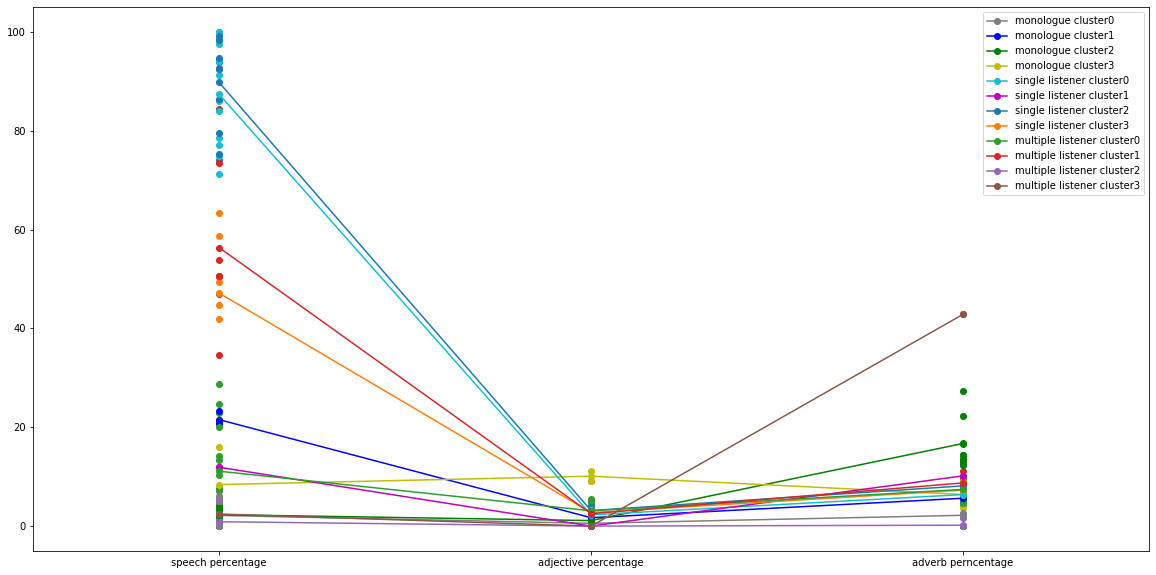

In [334]:
plt.figure(figsize=(20,10))
plt.xlim(0.5,3.5)
for index, row in df.iterrows():
    if row['monologue_cluster']== 0:
        plt.scatter(1,row['monologue speech percentage (%)'], marker='o', c='tab:grey')
        plt.scatter(2,row['monologue adjective percentage (%)'], marker='o', c='tab:grey')
        plt.scatter(3,row['monologue adverb percentage (%)'], marker='o', c='tab:grey')
    if row['monologue_cluster']== 1:
        plt.scatter(1,row['monologue speech percentage (%)'], marker='o', c='b')
        plt.scatter(2,row['monologue adjective percentage (%)'], marker='o', c='b')
        plt.scatter(3,row['monologue adverb percentage (%)'], marker='o', c='b')
    if row['monologue_cluster']== 2:
        plt.scatter(1,row['monologue speech percentage (%)'], marker='o', c='g')
        plt.scatter(2,row['monologue adjective percentage (%)'], marker='o', c='g')
        plt.scatter(3,row['monologue adverb percentage (%)'], marker='o', c='g')
    if row['monologue_cluster']== 3:
        plt.scatter(1,row['monologue speech percentage (%)'], marker='o', c='y')
        plt.scatter(2,row['monologue adjective percentage (%)'], marker='o', c='y')
        plt.scatter(3,row['monologue adverb percentage (%)'], marker='o', c='y')
    if row['onelistener_cluster']== 0:
        plt.scatter(1,row['single listener dialogue speech percentage (%)'], marker='o', c='tab:cyan')
        plt.scatter(2,row['single listener dialogue adjective percentage (%)'], marker='o', c='tab:cyan')
        plt.scatter(3,row['single listener dialogue adverb percentage (%)'], marker='o', c='tab:cyan')
    if row['onelistener_cluster']== 1:
        plt.scatter(1,row['single listener dialogue speech percentage (%)'], marker='o', c='m')
        plt.scatter(2,row['single listener dialogue adjective percentage (%)'], marker='o', c='m')
        plt.scatter(3,row['single listener dialogue adverb percentage (%)'], marker='o', c='m')
    if row['onelistener_cluster']== 2:
        plt.scatter(1,row['single listener dialogue speech percentage (%)'], marker='o', c='tab:blue')
        plt.scatter(2,row['single listener dialogue adjective percentage (%)'], marker='o', c='tab:blue')
        plt.scatter(3,row['single listener dialogue adverb percentage (%)'], marker='o', c='tab:blue')
    if row['onelistener_cluster']== 3:
        plt.scatter(1,row['single listener dialogue speech percentage (%)'], marker='o', c='tab:orange')
        plt.scatter(2,row['single listener dialogue adjective percentage (%)'], marker='o', c='tab:orange')
        plt.scatter(3,row['single listener dialogue adverb percentage (%)'], marker='o', c='tab:orange')
    if row['multilistener_cluster']== 0:
        plt.scatter(1,row['multiple listener dialogue speech percentage (%)'], marker='o', c='tab:green')
        plt.scatter(2,row['multiple listener dialogue adjective percentage (%)'], marker='o', c='tab:green')
        plt.scatter(3,row['multiple listener dialogue adverb percentage (%)'], marker='o', c='tab:green')
    if row['multilistener_cluster']== 1:
        plt.scatter(1,row['multiple listener dialogue speech percentage (%)'], marker='o', c='tab:red')
        plt.scatter(2,row['multiple listener dialogue adjective percentage (%)'], marker='o', c='tab:red')
        plt.scatter(3,row['multiple listener dialogue adverb percentage (%)'], marker='o', c='tab:red')
    if row['multilistener_cluster']== 2:
        plt.scatter(1,row['multiple listener dialogue speech percentage (%)'], marker='o', c='tab:purple')
        plt.scatter(2,row['multiple listener dialogue adjective percentage (%)'], marker='o', c='tab:purple')
        plt.scatter(3,row['multiple listener dialogue adverb percentage (%)'], marker='o', c='tab:purple')
    if row['multilistener_cluster']== 3:
        plt.scatter(1,row['multiple listener dialogue speech percentage (%)'], marker='o', c='tab:brown')
        plt.scatter(2,row['multiple listener dialogue adjective percentage (%)'], marker='o', c='tab:brown')
        plt.scatter(3,row['multiple listener dialogue adverb percentage (%)'], marker='o', c='tab:brown')
ks = range(1,4)

plt.plot(ks,mon0,'-o', c='tab:grey', label='monologue cluster0')
plt.plot(ks,mon1,'-o', c='b', label='monologue cluster1')
plt.plot(ks,mon2,'-o', c='g', label='monologue cluster2')
plt.plot(ks,mon3,'-o', c='y', label='monologue cluster3')
plt.plot(ks,sing0,'-o', c='tab:cyan', label='single listener cluster0')
plt.plot(ks,sing1,'-o', c='m', label='single listener cluster1')
plt.plot(ks,sing2,'-o', c='tab:blue', label='single listener cluster2')
plt.plot(ks,sing3,'-o', c='tab:orange', label='single listener cluster3')
plt.plot(ks,mul0,'-o', c='tab:green', label='multiple listener cluster0')
plt.plot(ks,mul1,'-o', c='tab:red', label='multiple listener cluster1')
plt.plot(ks,mul2,'-o', c='tab:purple', label='multiple listener cluster2')
plt.plot(ks,mul3,'-o', c='tab:brown', label='multiple listener cluster3')
plt.legend()
plt.xticks([1,2,3], ['speech percentage','adjective percentage', 'adverb perncentage'])
plt.show()


In [41]:
clus_dict = {}
clus_dict_self = {}
clus_dict_single = {}
clus_dict_multiple = {}
for k,v in new_dict.items():
    clus_dict[k] = [v['adj_count'],v['adv_count'],v['total_words'],v['adj_count_self'],v['adv_count_self'],v['sit_words_self'],
                    v['adj_count_single'],v['adv_count_single'],v['sit_words_single'],v['adj_count_multiple'],v['adv_count_multiple'],v['sit_words_multiple']]
    clus_dict_self[k] = [v['adj_count_self'],v['adv_count_self'],v['sit_words_self']]
    clus_dict_single[k] = [v['adj_count_single'],v['adv_count_single'],v['sit_words_single']]
    clus_dict_multiple[k] = [v['adj_count_multiple'],v['adv_count_multiple'],v['sit_words_multiple']]

In [74]:
clus_dict

{'다림_8월의 크리스마스': [0.04986149584487535,
  0.07756232686980609,
  1083,
  0.0,
  0.14285714285714285,
  0.006463527239150508,
  0.04976525821596244,
  0.07699530516431925,
  0.9833795013850416,
  0.09090909090909091,
  0.09090909090909091,
  0.010156971375807941],
 '정원_8월의 크리스마스': [0.036021926389976505,
  0.07517619420516837,
  1277,
  0.038461538461538464,
  0.0,
  0.020360219263899765,
  0.03728813559322034,
  0.07372881355932204,
  0.9240407204385278,
  0.014084507042253521,
  0.1267605633802817,
  0.05559906029757244],
 '강은표_고지전': [0.023107569721115537,
  0.06932270916334661,
  1255,
  0.0,
  0.07692307692307693,
  0.020717131474103586,
  0.023668639053254437,
  0.06931530008453085,
  0.9426294820717132,
  0.021739130434782608,
  0.06521739130434782,
  0.036653386454183264],
 '김수혁_고지전': [0.0211231324059763,
  0.06285419886656363,
  1941,
  0.0,
  0.2727272727272727,
  0.005667181865018032,
  0.02154398563734291,
  0.06403351286654697,
  0.8608964451313755,
  0.019305019305019305,
  0

In [42]:
clus_list = []
clus_list_self = []
clus_list_single = []
clus_list_multiple = []
for i in clus_dict.values():
    clus_list.append(i)
for i in clus_dict_self.values():
    clus_list_self.append(i)
for i in clus_dict_single.values():
    clus_list_single.append(i)
for i in clus_dict_multiple.values():
    clus_list_multiple.append(i)

In [43]:
clus_array = np.array(clus_list)
clus_array_self = np.array(clus_list_self)
clus_array_single = np.array(clus_list_single)
clus_array_multiple = np.array(clus_list_multiple)

In [44]:
mm = MinMaxScaler()
mm.fit(clus_array_self)
mm_array_self = mm.transform(clus_array_self)

In [45]:
mm = MinMaxScaler()
mm.fit(clus_array_single)
mm_array_single = mm.transform(clus_array_single)

In [46]:
mm = MinMaxScaler()
mm.fit(clus_array_multiple)
mm_array_multiple = mm.transform(clus_array_multiple)

In [47]:
sc = StandardScaler()
sc.fit(clus_array)
sc_array = sc.transform(clus_array)
mm = MinMaxScaler()
mm.fit(clus_array)
mm_array = mm.transform(clus_array)

In [222]:
sc_array

array([[ 2.60710493e+00,  2.47923762e-01, -3.23561396e-01,
        -5.54857422e-01,  1.10467725e+00, -6.18655778e-01,
         2.61522660e+00,  3.07064482e-01,  9.24397163e-01,
         3.52119133e+00,  3.04217468e-01, -7.35248599e-01],
       [ 1.05363618e+00,  4.73704540e-02, -1.62829289e-01,
         9.30462937e-01, -9.25967039e-01, -4.21553165e-01,
         1.22451414e+00,  1.68183139e-02,  6.65753591e-01,
        -2.93205017e-01,  7.77113109e-01, -5.36914943e-01],
       [-3.95978970e-01, -4.44612160e-01, -1.81056641e-01,
        -5.54857422e-01,  1.67456812e-01, -4.16490930e-01,
        -2.93528440e-01, -3.75347205e-01,  7.46777563e-01,
         8.68525898e-02, -3.46665978e-02, -6.19604028e-01],
       [-6.18728772e-01, -9.88287352e-01,  3.87305348e-01,
        -5.54857422e-01,  2.95071752e+00, -6.29950679e-01,
        -5.30344416e-01, -8.44663734e-01,  3.90522779e-01,
        -3.40027943e-02, -2.83772052e-01, -1.97191150e-01],
       [ 4.74689655e-01,  6.46503390e-01, -8.1818545

In [83]:
mm_array

array([[1.        , 0.51080332, 0.17145505, 0.        , 0.52380952,
        0.02771159, 1.        , 0.52862566, 0.98113297, 1.        ,
        0.21212121, 0.01204014],
       [0.6514771 , 0.47047768, 0.20741427, 0.34615385, 0.        ,
        0.08729197, 0.74928046, 0.46628702, 0.9137736 , 0.15492958,
        0.29577465, 0.0659075 ],
       [0.32625391, 0.37155378, 0.20333642, 0.        , 0.28205128,
        0.08882219, 0.47560567, 0.38205828, 0.93487493, 0.23913043,
        0.15217391, 0.04344917],
       [0.27627968, 0.26223596, 0.3304912 , 0.        , 1.        ,
        0.02429735, 0.43291216, 0.28125916, 0.84209436, 0.21235521,
        0.10810811, 0.15817637],
       [0.52158964, 0.5909465 , 0.06079703, 0.42857143, 0.52380952,
        0.1852571 , 0.61693148, 0.60773089, 0.92992802, 0.        ,
        0.        , 0.02195198],
       [0.49114267, 0.4237931 , 0.239481  , 0.17763158, 0.16885965,
        0.89887111, 0.65423431, 0.62147375, 0.70642256, 0.30985915,
        0.09859155,

In [106]:
print (plt.rcParams['font.family'] )
print(fontprop)

["('NGULIM TTF', 'C:/Windows/Fonts/NGULIM.ttf')"]
sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:file=C\:/Windows/Fonts/NGULIM.ttf:size=10.0


In [115]:
print ('설정 파일 위치: ', mpl.matplotlib_fname())

설정 파일 위치:  C:\Users\admin\AppData\Roaming\Python\Python38\site-packages\matplotlib\mpl-data\matplotlibrc


In [120]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
f = [f.name for f in fm.fontManager.ttflist]
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Batang' in f.name]

[('HCR Batang Ext', 'C:\\Windows\\Fonts\\HANBatangExt.ttf'),
 ('HCR Batang', 'C:\\Windows\\Fonts\\HANBatangB.ttf'),
 ('HCR Batang ExtB', 'C:\\Windows\\Fonts\\HANBatangExtBB.ttf'),
 ('HCR Batang ExtB', 'C:\\Windows\\Fonts\\HANBatangExtB.ttf'),
 ('HCR Batang', 'C:\\Windows\\Fonts\\HANBatang.ttf'),
 ('Batang', 'C:\\Windows\\Fonts\\batang.ttc')]

In [122]:
f

['STIXSizeFiveSym',
 'STIXSizeOneSym',
 'STIXNonUnicode',
 'cmss10',
 'cmtt10',
 'DejaVu Serif',
 'STIXSizeTwoSym',
 'cmr10',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'cmmi10',
 'DejaVu Serif',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'DejaVu Serif Display',
 'cmsy10',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'DejaVu Serif',
 'DejaVu Sans',
 'STIXNonUnicode',
 'STIXSizeThreeSym',
 'STIXSizeThreeSym',
 'cmex10',
 'DejaVu Serif',
 'STIXSizeOneSym',
 'STIXNonUnicode',
 'cmb10',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'STIXSizeFourSym',
 'STIXGeneral',
 'STIXSizeTwoSym',
 'STIXSizeFourSym',
 'DejaVu Sans',
 'DejaVu Sans Display',
 'Yu Gothic',
 'Microsoft YaHei',
 'Microsoft New Tai Lue',
 'Impact',
 'Tahoma',
 'Comic Sans MS',
 'HancomEQN',
 'Corbel',
 'MingLiU-ExtB',
 'Microsoft PhagsPa',
 'MV Boli',
 'Microsoft JhengHei',
 'Malgun Gothic',
 'Segoe Print',
 'Consolas',
 'Segoe UI',
 'Leelawadee UI',
 'Microsoft Tai Le',
 'Yu Gothic',
 'HyhwpEQ',
 'Candara',
 'HCR 

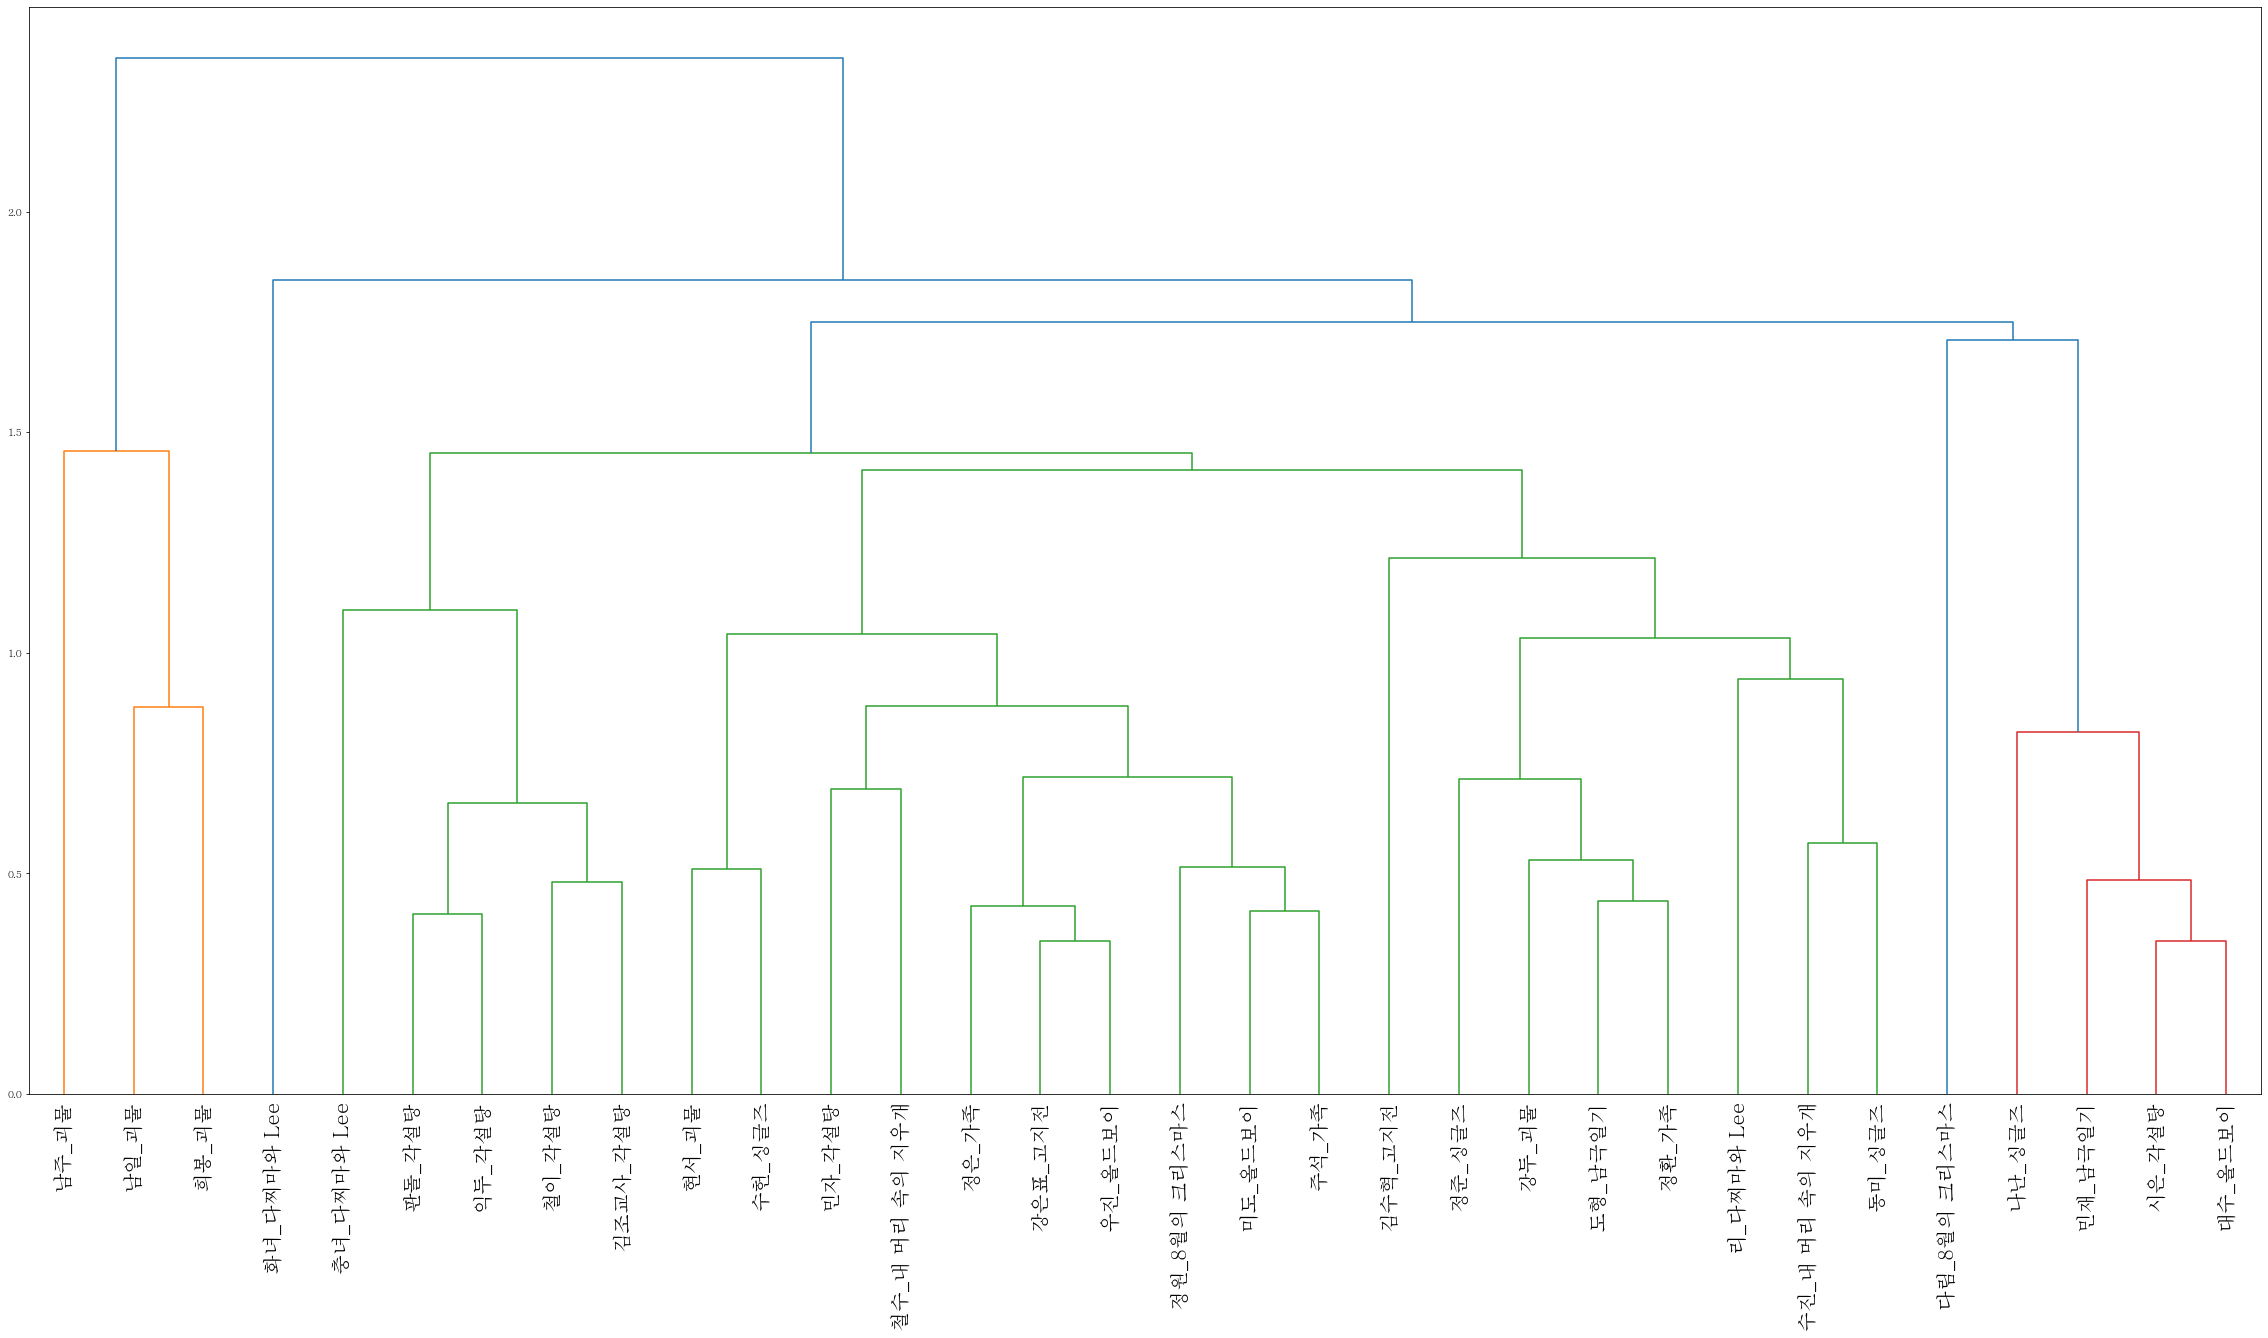

In [127]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt


mergings = linkage(mm_array,method='complete')

plt.figure(figsize=(40,20))
dendrogram(mergings,
           labels = [x for x in clus_dict.keys()],
           leaf_rotation=90,
           leaf_font_size=20,
)

plt.rcParams["font.family"] = 'Batang'
plt.show()


D:\Applications\Anaconda3\envs\Jenv\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
<ipython-input-58-84b1661ba266>:6: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (29). Possibly due to duplicate points in X.
  model.fit(mm_array_self)


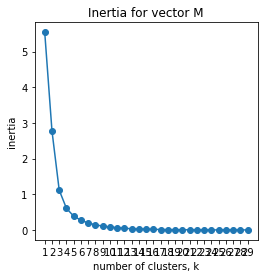

In [58]:
ks = range(1,30)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(mm_array_self)
    inertias.append(model.inertia_)
    
plt.figure(figsize=(4,4))
plt.title('Inertia for vector M')
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

D:\Applications\Anaconda3\envs\Jenv\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


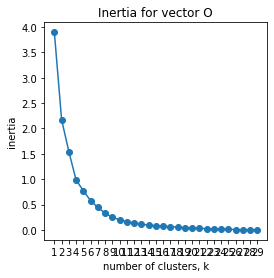

In [57]:
ks = range(1,30)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(mm_array_single)
    inertias.append(model.inertia_)
    
plt.figure(figsize=(4,4))
plt.title('Inertia for vector O')
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

D:\Applications\Anaconda3\envs\Jenv\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


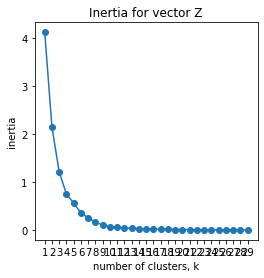

In [55]:
ks = range(1,30)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(mm_array_multiple)
    inertias.append(model.inertia_)
    
plt.figure(figsize=(4,4))
plt.title('Inertia for vector Z')
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

D:\Applications\Anaconda3\envs\Jenv\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


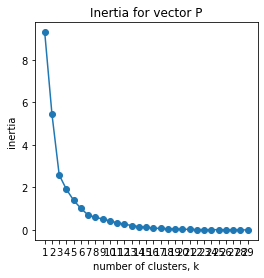

In [54]:
ks = range(1,30)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(mm_array)
    inertias.append(model.inertia_)
    
plt.figure(figsize=(4,4))

plt.plot(ks, inertias, '-o')
plt.title('Inertia for vector P')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [48]:
kmeans_plus = KMeans(n_clusters=4, init="k-means++")
pred_plus = kmeans_plus.fit_predict(mm_array)
pred_plus_self = kmeans_plus.fit_predict(mm_array_self)
pred_plus_single = kmeans_plus.fit_predict(mm_array_single)
pred_plus_multiple = kmeans_plus.fit_predict(mm_array_multiple)

In [49]:
pca = PCA(n_components=2)
mm_array = pca.fit_transform(mm_array)
mm_array_self = pca.fit_transform(mm_array_self)
mm_array_single = pca.fit_transform(mm_array_single)
mm_array_multiple = pca.fit_transform(mm_array_multiple)

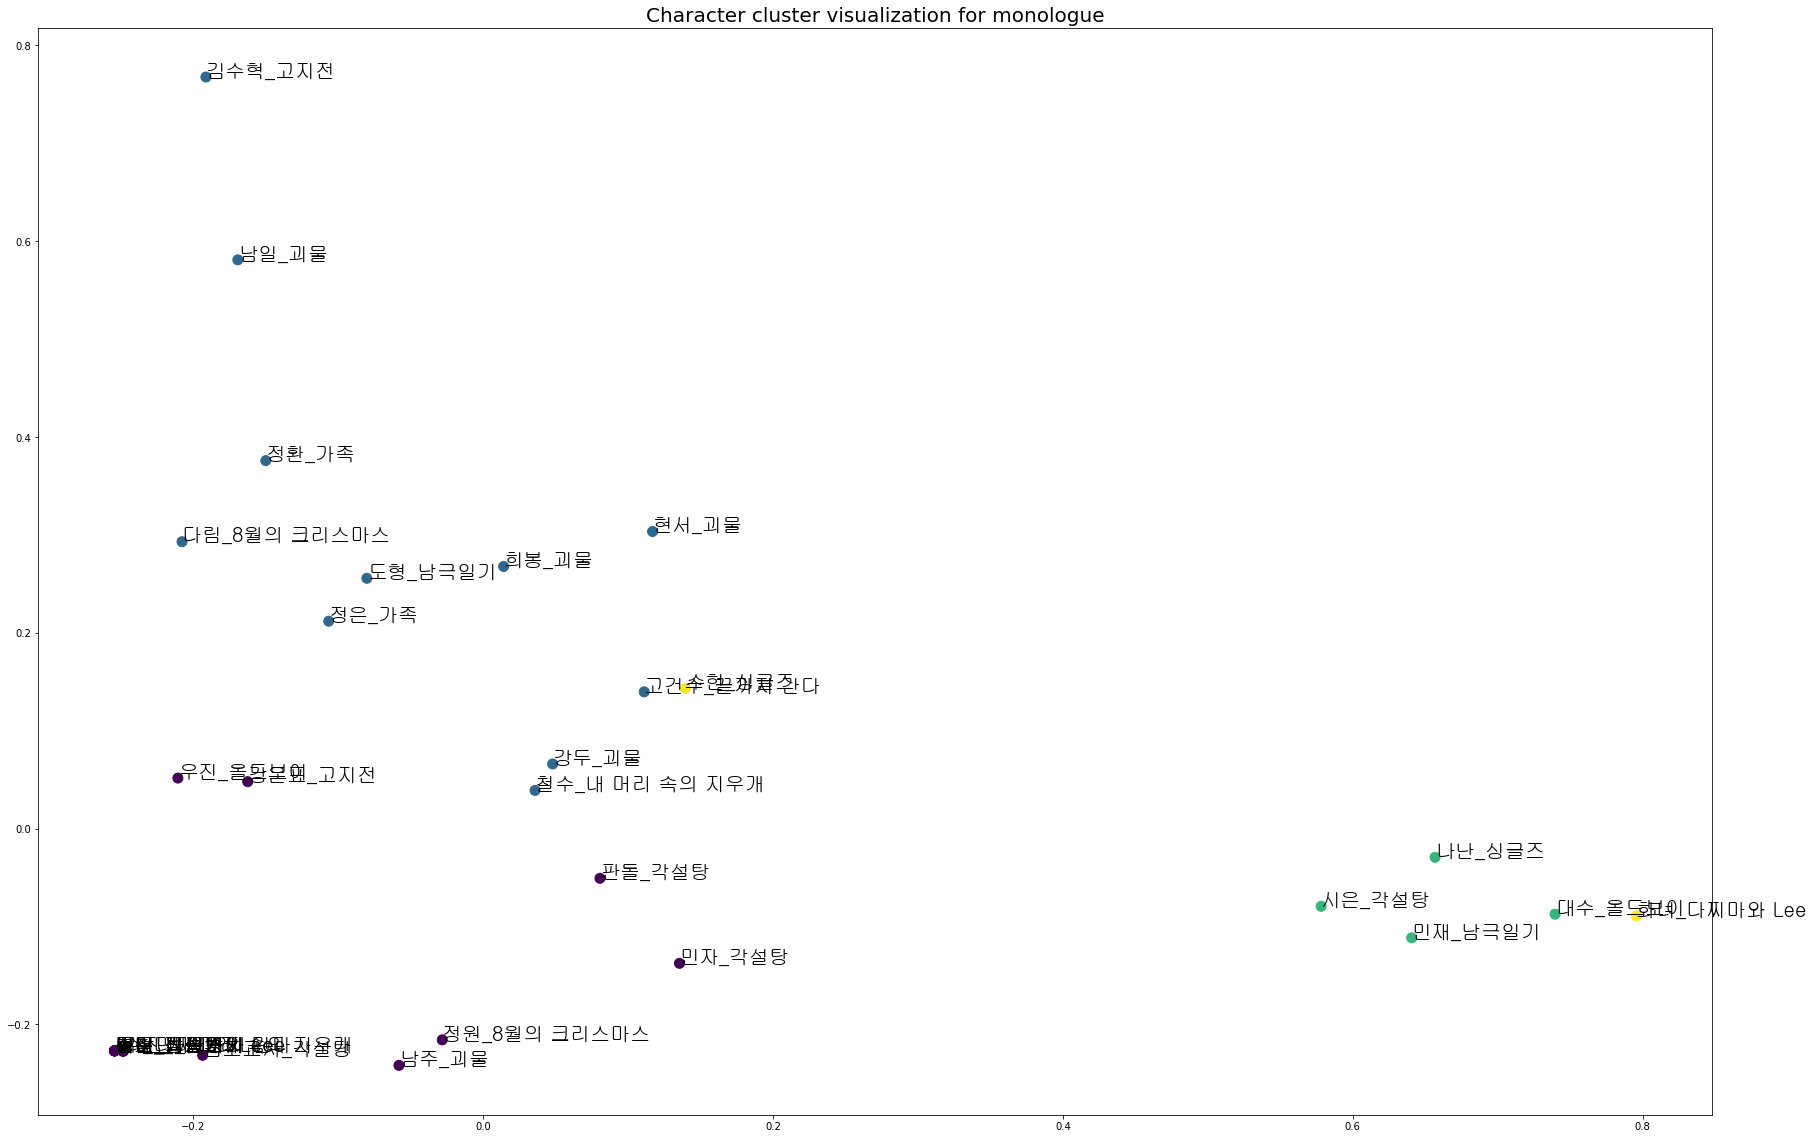

In [50]:
xs = mm_array_self[:,0]
ys = mm_array_self[:,1]
plt.figure(figsize=(30, 20))
plt.scatter(xs, ys, marker='o',s = 100, c=pred_plus_self)
plt.title('Character cluster visualization for monologue', fontsize=20)
for i, v in enumerate(clus_dict_self):
    plt.annotate(v, xy=(xs[i],ys[i]),fontproperties=fontprop, fontsize = 20)

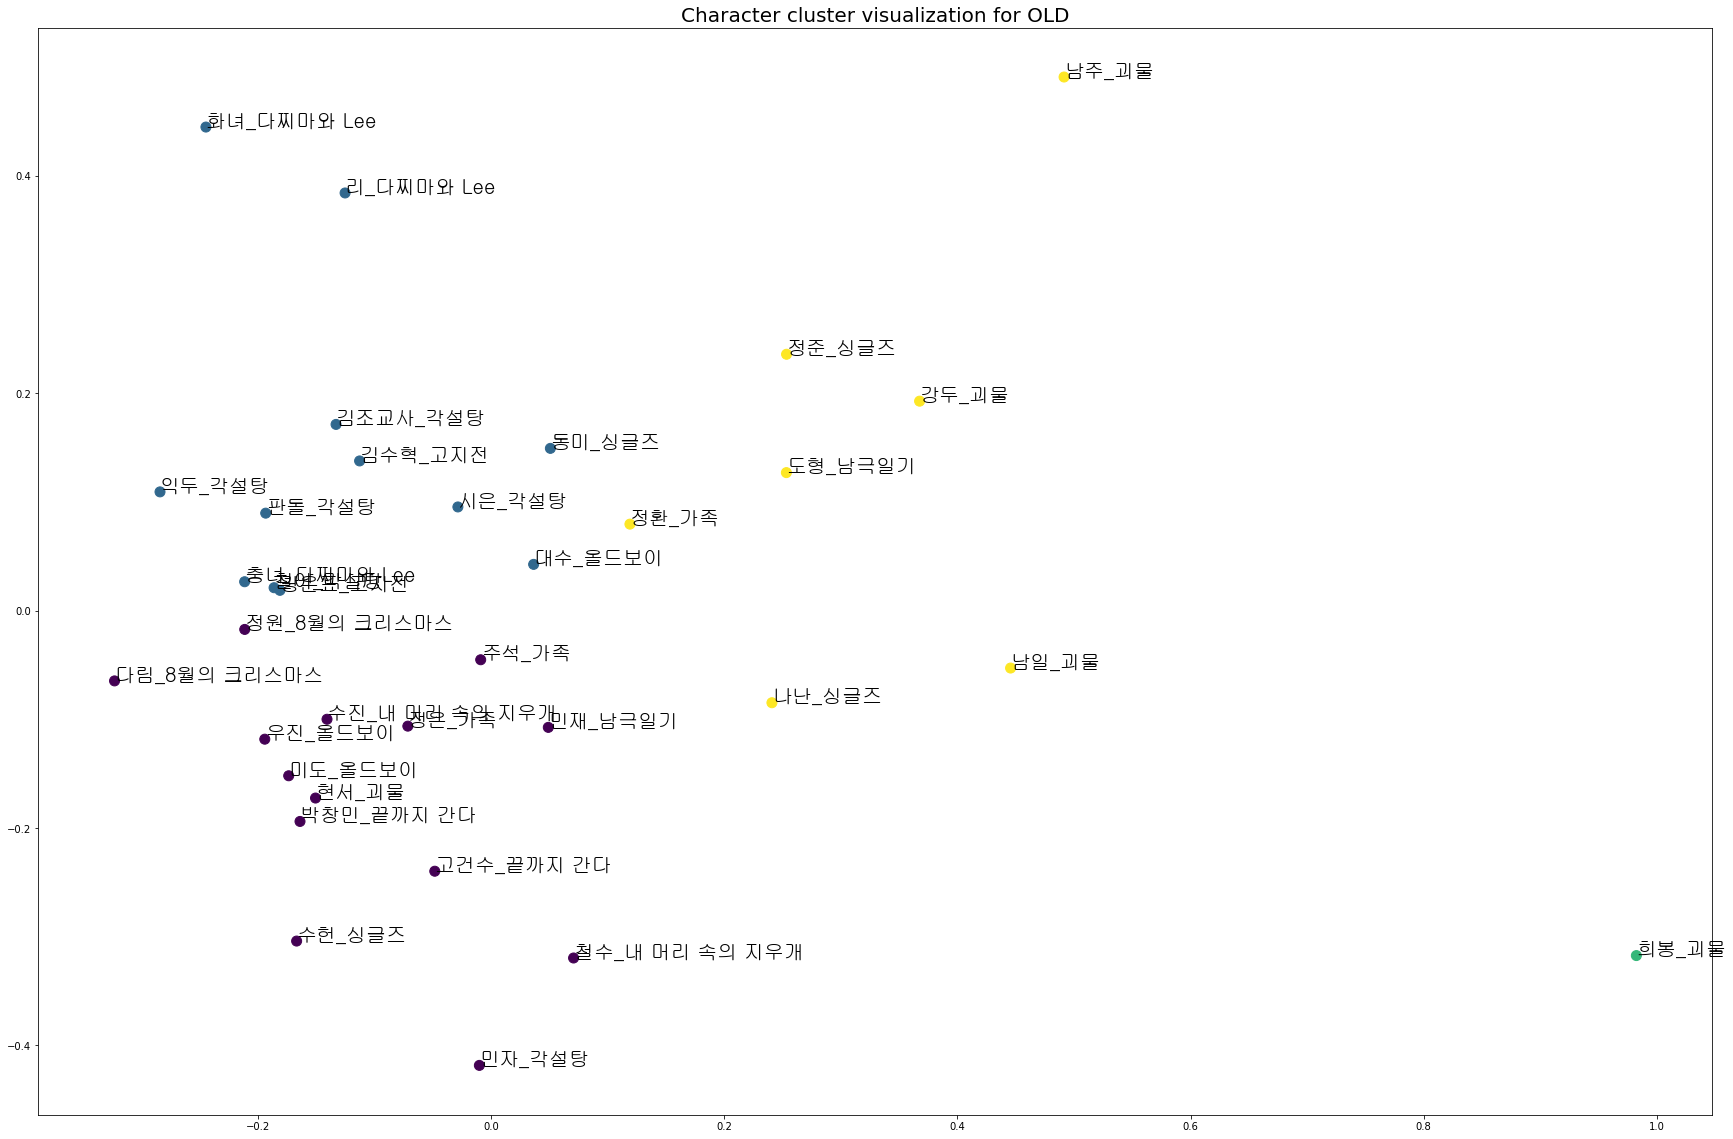

In [59]:
xs = mm_array_single[:,0]
ys = mm_array_single[:,1]
plt.figure(figsize=(30, 20))
plt.scatter(xs, ys, marker='o',s = 100, c=pred_plus_single)
plt.title('Character cluster visualization for OLD', fontsize=20)
for i, v in enumerate(clus_dict_single):
    plt.annotate(v, xy=(xs[i],ys[i]),fontproperties=fontprop, fontsize = 20)

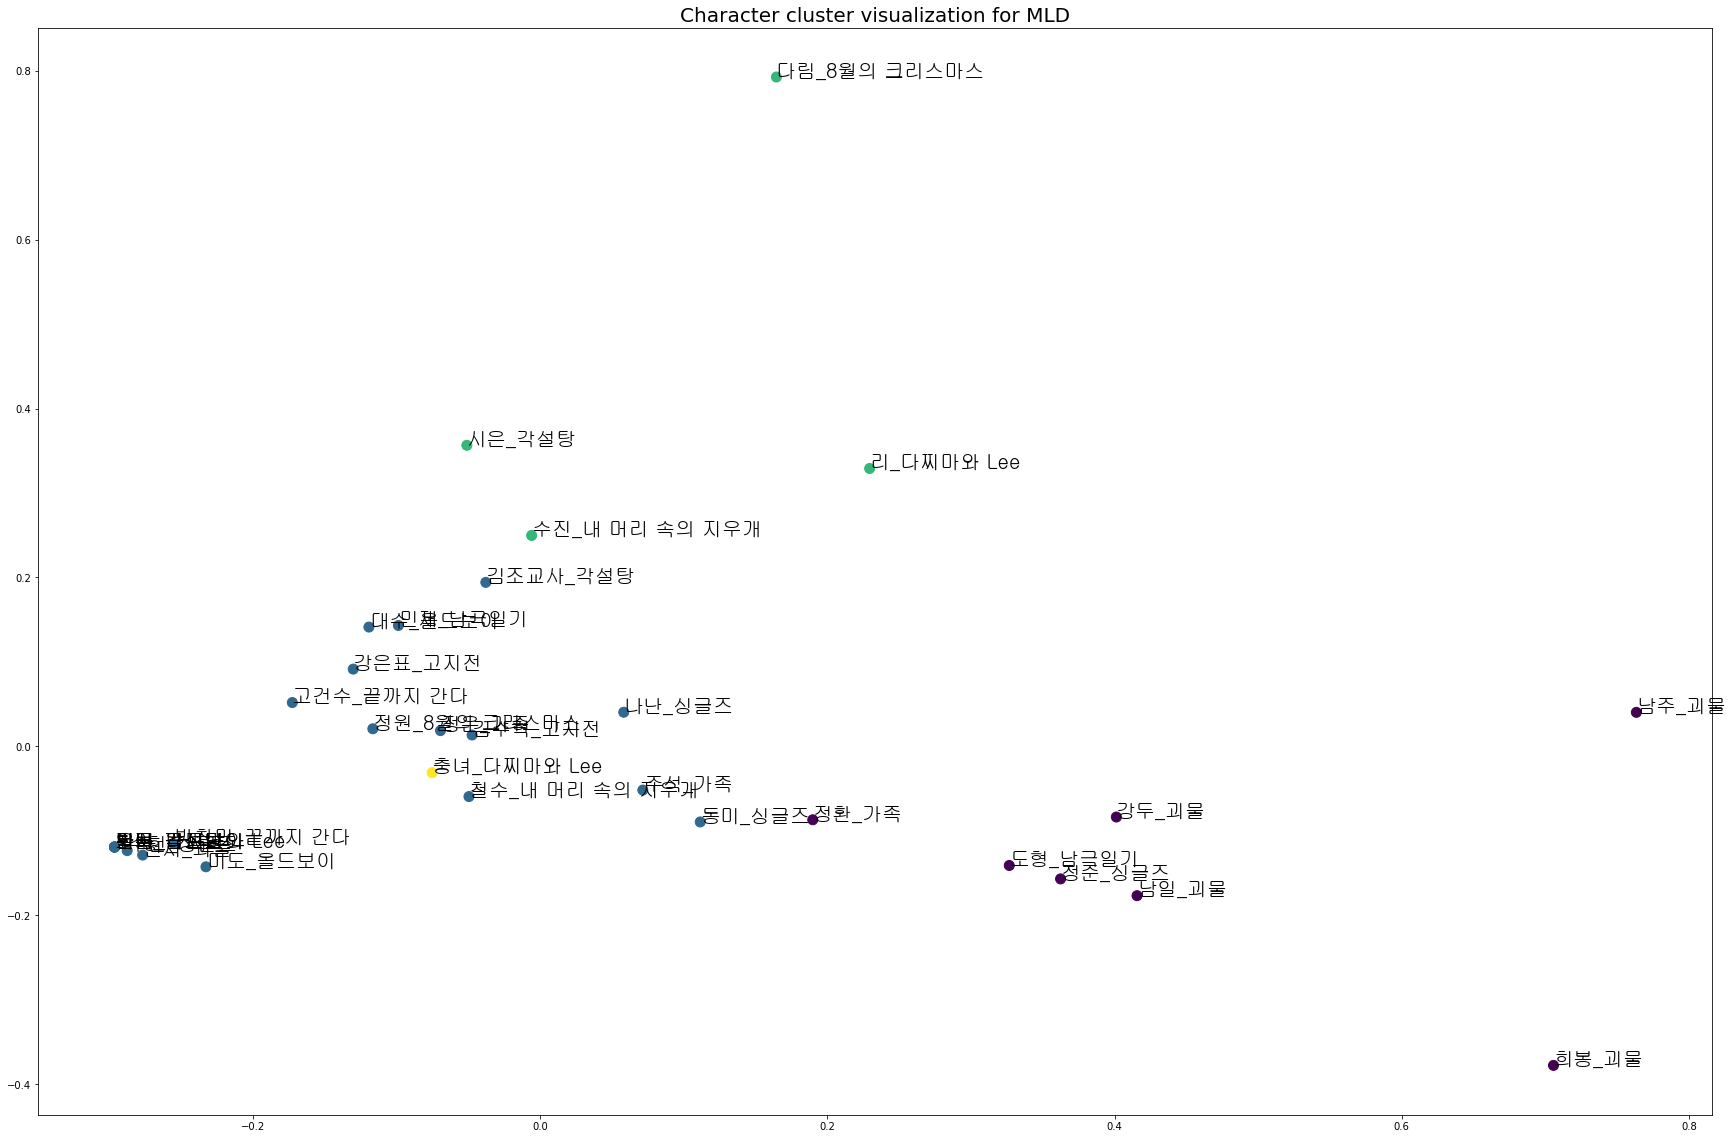

In [60]:
xs = mm_array_multiple[:,0]
ys = mm_array_multiple[:,1]
plt.figure(figsize=(30, 20))
plt.scatter(xs, ys, marker='o',s = 100, c=pred_plus_multiple)
plt.title('Character cluster visualization for MLD', fontsize=20)
for i, v in enumerate(clus_dict_multiple):
    plt.annotate(v, xy=(xs[i],ys[i]),fontproperties=fontprop, fontsize = 20)

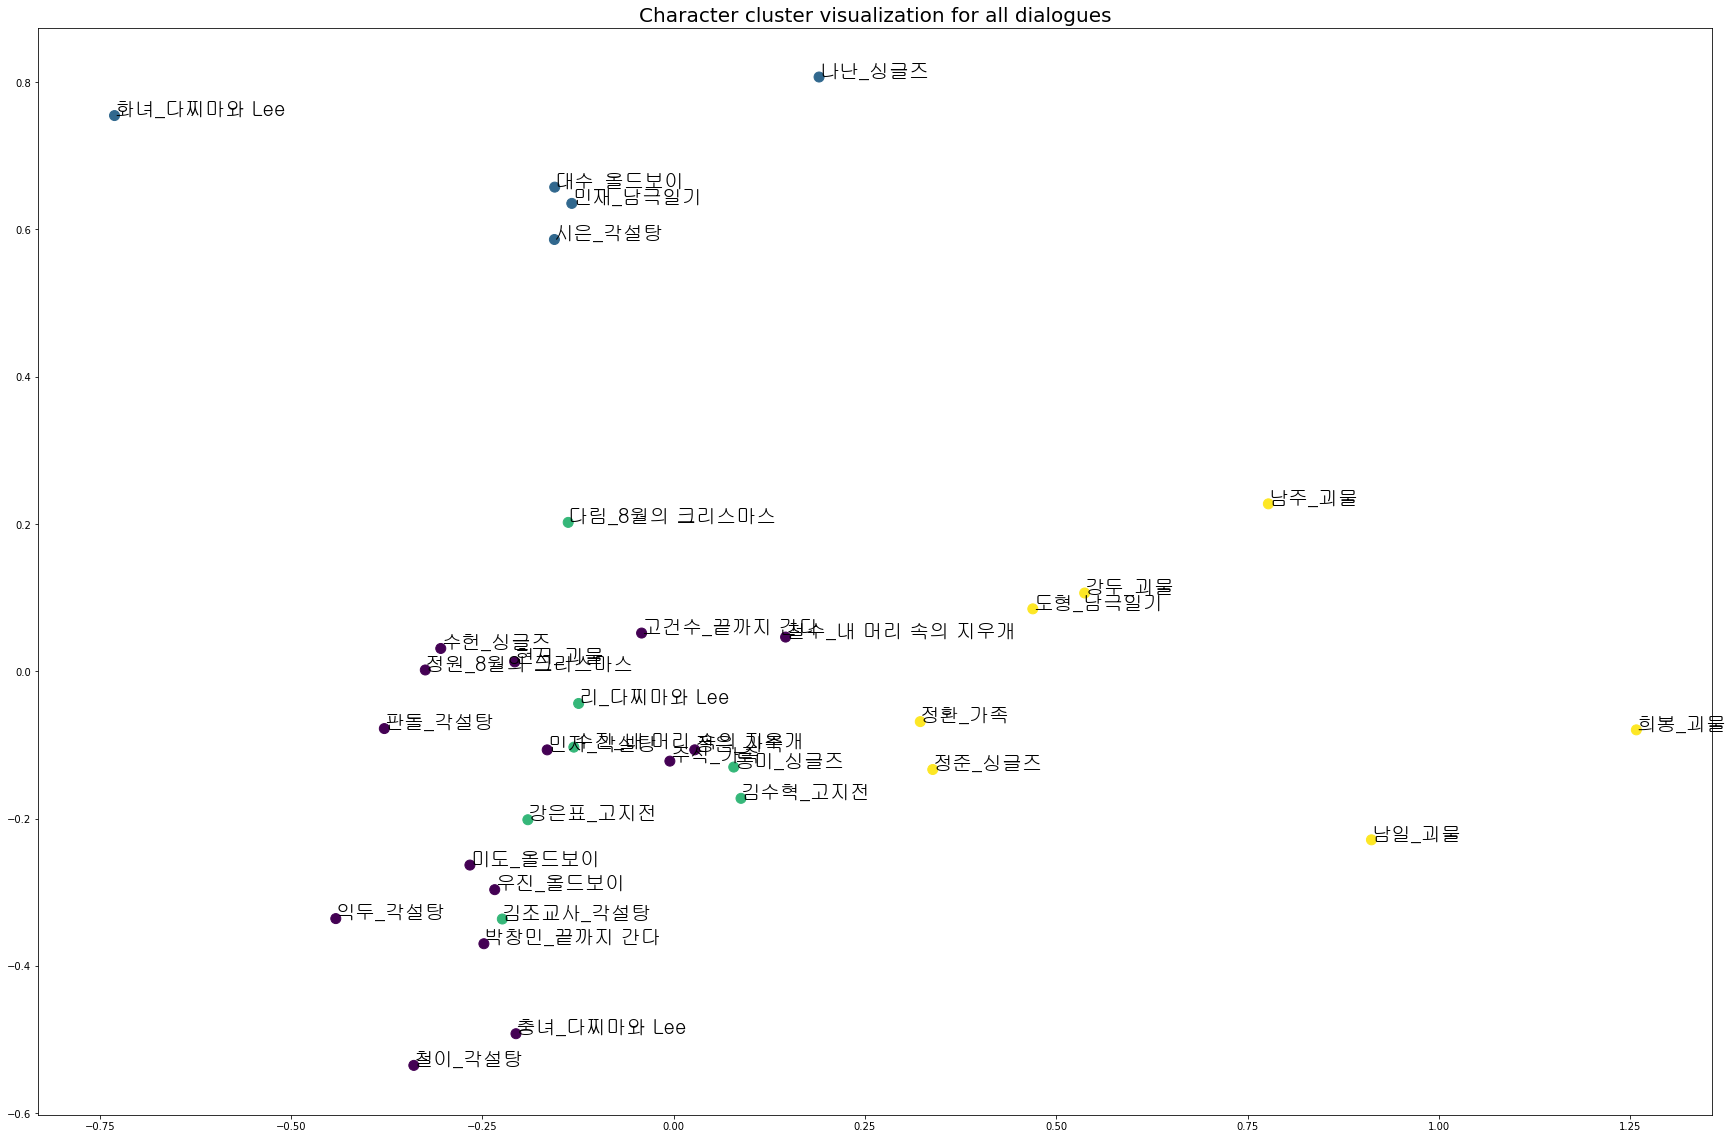

In [61]:
xs = mm_array[:,0]
ys = mm_array[:,1]
plt.figure(figsize=(30, 20))
plt.scatter(xs, ys, marker='o',s = 100, c=pred_plus)
plt.title('Character cluster visualization for all dialogues', fontsize=20)
for i, v in enumerate(clus_dict):
    plt.annotate(v, xy=(xs[i],ys[i]),fontproperties=fontprop, fontsize = 20)

In [466]:
sc_array

array([[-1.18506048,  3.91580086],
       [-1.34769563,  0.66119774],
       [-0.49078786, -0.70710794],
       [ 0.28705876, -0.56394064],
       [-0.55711303, -0.37366515],
       [-0.72264184,  0.67681707],
       [ 1.27929911,  1.10395547],
       [ 4.0742412 ,  0.0659576 ],
       [ 1.74411544,  3.4066404 ],
       [ 1.53702103,  0.80491638],
       [ 5.20200162, -0.70024268],
       [ 0.13648315, -1.23148826],
       [-4.49155196,  0.96103827],
       [-1.49243579,  1.57305054],
       [-1.40854826, -1.46594422],
       [-0.83353077,  0.30116248],
       [-1.61072999, -1.32614109],
       [-0.60387066, -3.07852185],
       [-0.65719387, -1.80791201],
       [ 0.40803445, -1.81007848],
       [-0.67913276, -0.08711115],
       [-0.66438953, -0.54393677],
       [-0.27964735, -1.42729467],
       [-0.16963238,  0.33536801],
       [ 1.37183444, -0.09740635],
       [-0.25843397,  0.82223973],
       [ 0.52963534, -0.12535935],
       [ 0.88267159,  0.71800605]])

In [467]:
mm_array

array([[-0.14807391,  0.56513603],
       [-0.31411317,  0.10343822],
       [-0.17968902, -0.20211469],
       [ 0.11951738, -0.21802139],
       [-0.14395917, -0.06744005],
       [-0.17127454,  0.41245357],
       [ 0.46224863,  0.14998717],
       [ 0.96362128, -0.2027647 ],
       [ 0.68626984,  0.69803167],
       [ 0.49499779,  0.20066986],
       [ 1.28538974, -0.1470015 ],
       [-0.19020458, -0.42822159],
       [-0.7871403 ,  0.74609643],
       [-0.19585893,  0.31173901],
       [-0.37161164, -0.17327756],
       [-0.21762668,  0.34195024],
       [-0.43788218, -0.2839556 ],
       [-0.31849108, -0.61944005],
       [-0.24847243, -0.33140083],
       [-0.10410266, -0.33096483],
       [-0.20509823,  0.32897884],
       [-0.23703631, -0.21910413],
       [-0.18771641, -0.37931642],
       [-0.12368662, -0.06796005],
       [ 0.19471362, -0.12845388],
       [-0.01150707,  0.04896995],
       [ 0.06031973, -0.14558305],
       [ 0.32646694,  0.03756932]])

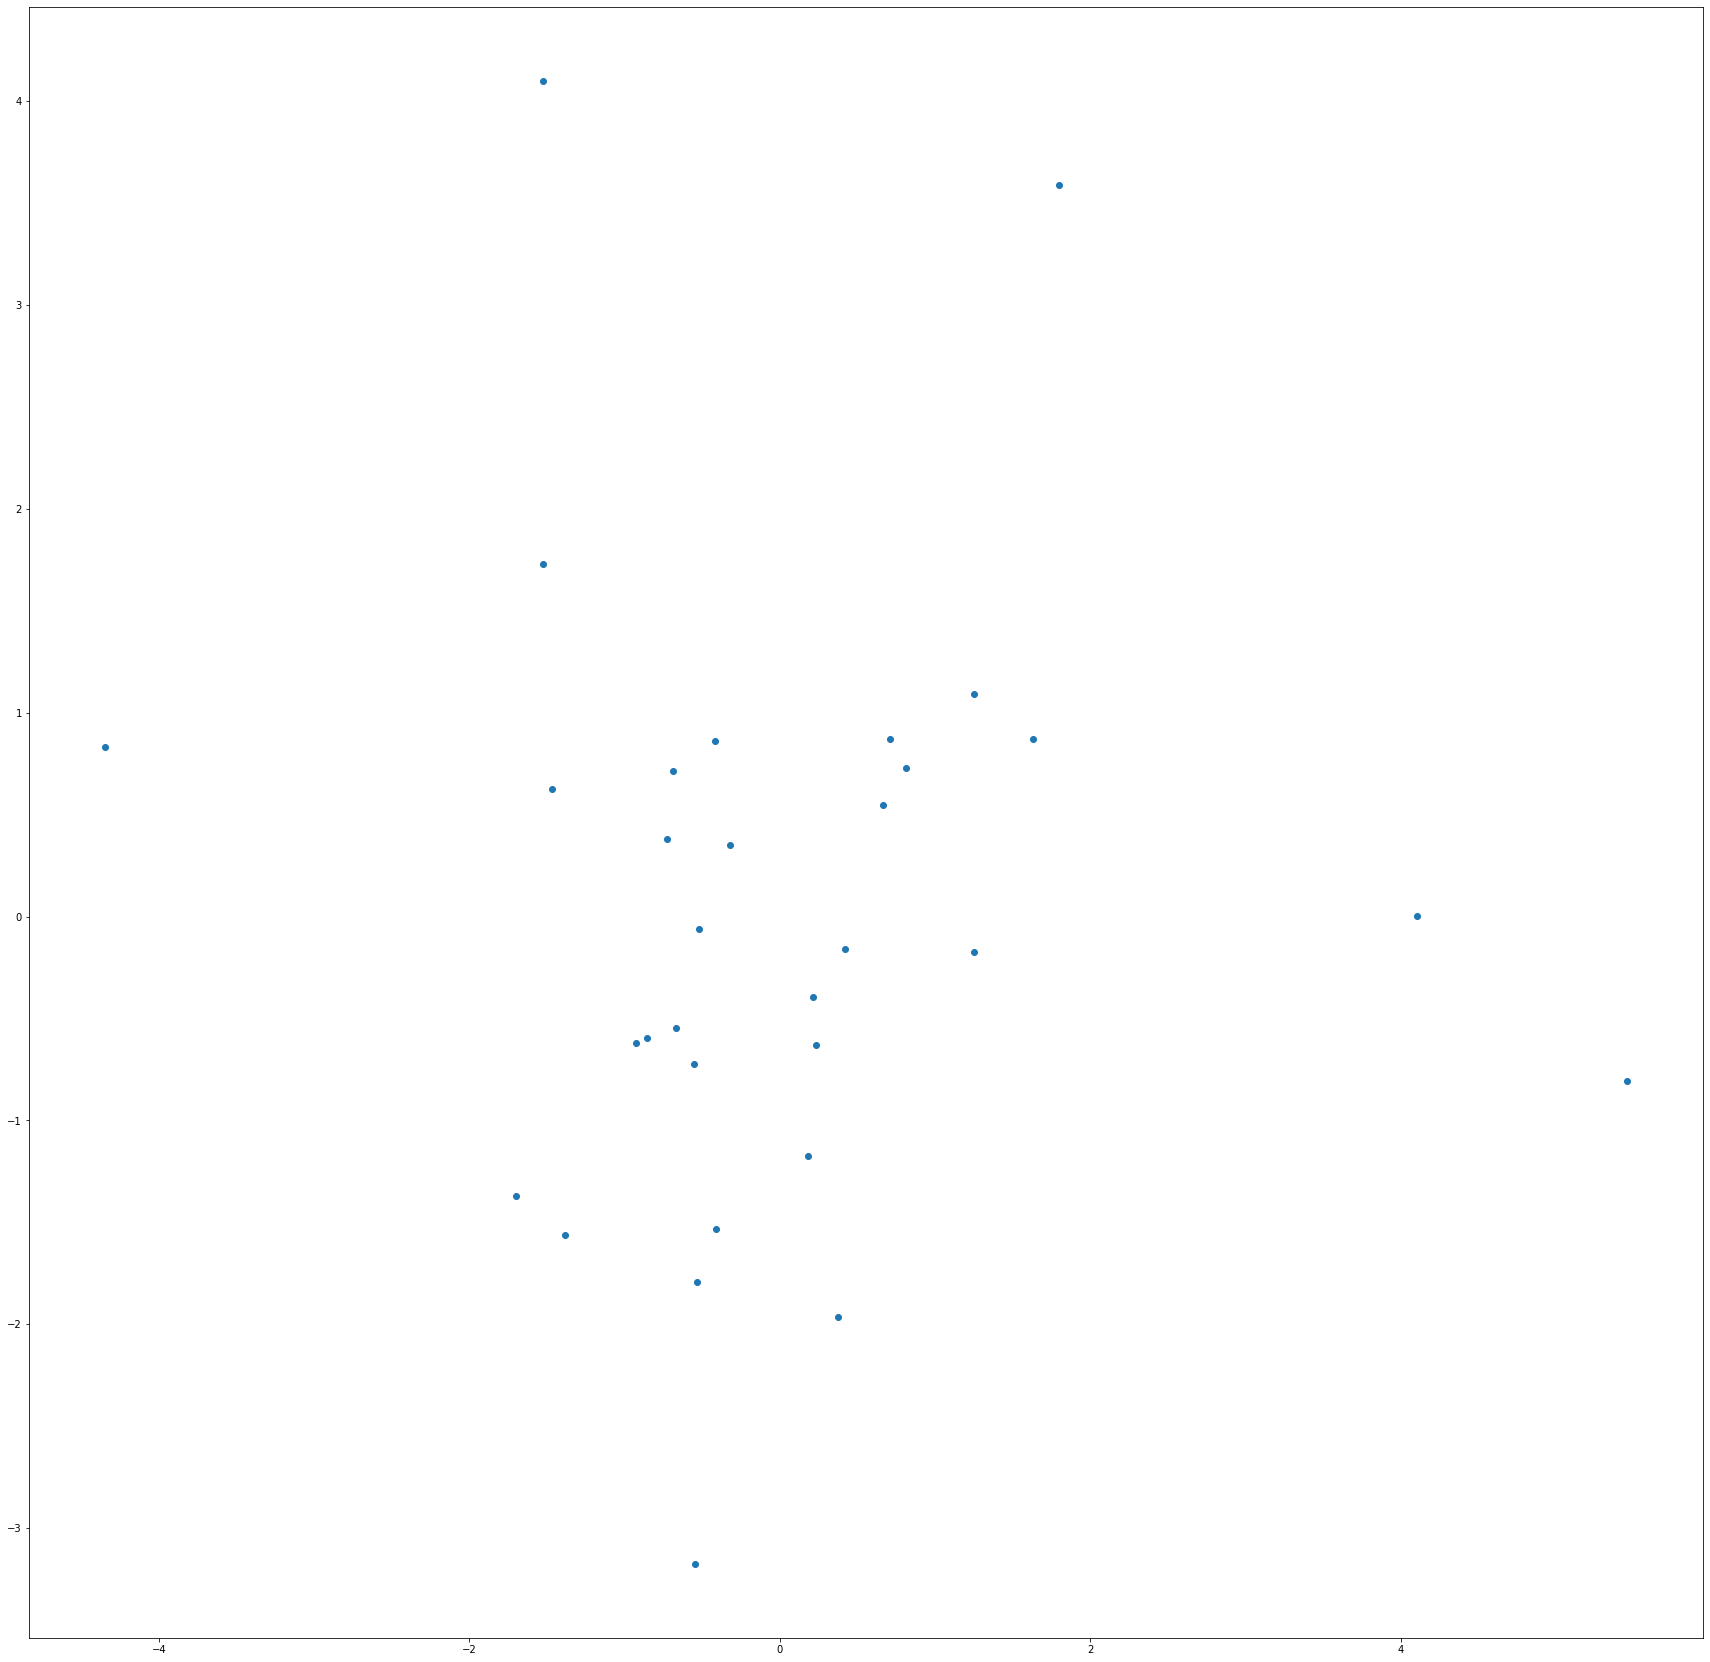

In [54]:
xs = sc_array[:,0]
ys = sc_array[:,1]
plt.figure(figsize=(30, 30))
plt.scatter(xs, ys, marker='o')

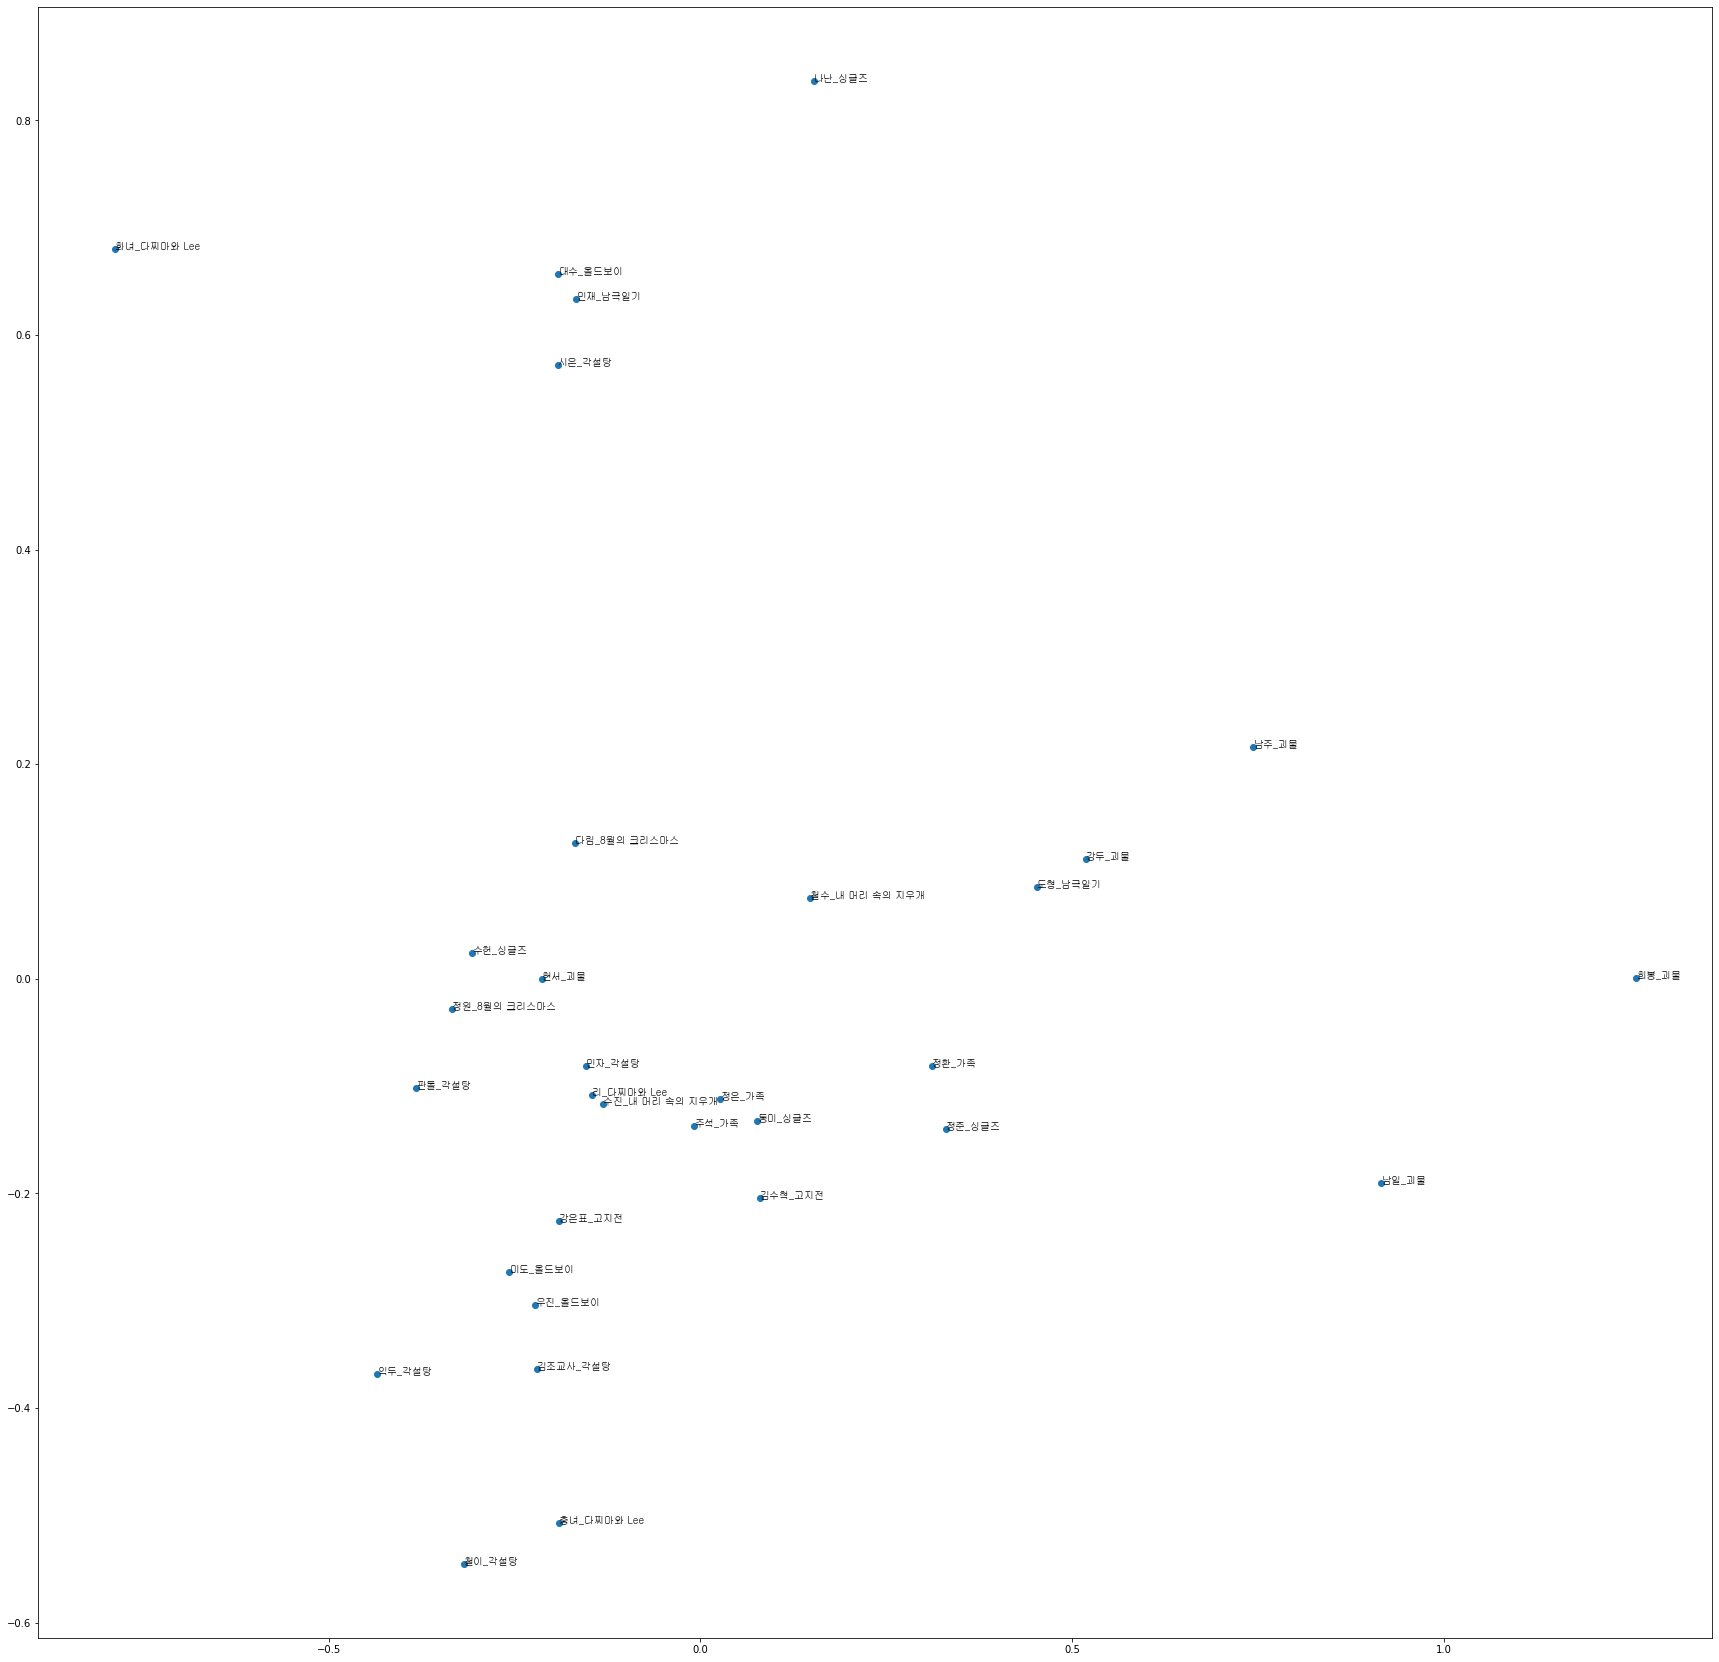

In [55]:
xs = mm_array[:,0]
ys = mm_array[:,1]
plt.figure(figsize=(30, 30))
plt.scatter(xs, ys, marker='o')
for i, v in enumerate(clus_dict):
    plt.annotate(v, xy=(xs[i],ys[i]),fontproperties=fontprop)

In [457]:
a

array([[ 2.45700684e+00,  2.29116506e-01, -1.71964147e-01,
        -5.36926435e-01,  1.01643673e+00, -6.39473700e-01,
         2.48839209e+00,  3.34541300e-01,  8.62396856e-01,
         3.32307343e+00,  2.52780243e-01, -6.76900728e-01],
       [ 9.85083771e-01,  3.45257686e-02,  5.26353352e-02,
         1.12225725e+00, -9.42907281e-01, -4.32292961e-01,
         1.17549534e+00,  4.91287362e-02,  6.07826211e-01,
        -3.08402096e-01,  7.01121297e-01, -4.82374091e-01],
       [-3.88437242e-01, -4.42829907e-01,  2.71652908e-02,
        -5.36926435e-01,  1.12124109e-01, -4.26971887e-01,
        -2.57606928e-01, -3.36505868e-01,  6.87574277e-01,
         5.34297047e-02, -6.85076387e-02, -5.63475958e-01],
       [-5.99494318e-01, -9.70341309e-01,  8.21367583e-01,
        -5.36926435e-01,  2.79765855e+00, -6.51346124e-01,
        -4.81172140e-01, -7.98006651e-01,  3.36929529e-01,
        -6.16300137e-02, -3.04678565e-01, -1.49171305e-01],
       [ 4.36527683e-01,  6.15846123e-01, -8.6312853

In [349]:
extra_list = []
intro_list = []
for k,v in new_dict.items():
    if v['ext_type'] == 'extravert':
        extra_list.append(v)
    if v['ext_type'] == 'introvert':
        intro_list.append(v)

In [350]:
extra_list

[{'speaker': '다림',
  'movie_name': '8월의 크리스마스',
  'adj_count': 0.04986149584487535,
  'adv_count': 0.07756232686980609,
  'sit_words': 1083,
  'total_words': 1083,
  'ext_type': 'extravert',
  'adj_count_self': 0.0,
  'adv_count_self': 0.14285714285714285,
  'sit_words_self': 0.006463527239150508,
  'adj_count_single': 0.04976525821596244,
  'adv_count_single': 0.07699530516431925,
  'sit_words_single': 0.9833795013850416,
  'adj_count_multiple': 0.09090909090909091,
  'adv_count_multiple': 0.09090909090909091,
  'sit_words_multiple': 0.010156971375807941},
 {'speaker': '김수혁',
  'movie_name': '고지전',
  'adj_count': 0.0211231324059763,
  'adv_count': 0.06285419886656363,
  'sit_words': 1941,
  'total_words': 1941,
  'ext_type': 'extravert',
  'adj_count_self': 0.0,
  'adv_count_self': 0.2727272727272727,
  'sit_words_self': 0.005667181865018032,
  'adj_count_single': 0.02154398563734291,
  'adv_count_single': 0.06403351286654697,
  'sit_words_single': 0.8608964451313755,
  'adj_count_mul

In [351]:
len(extra_list)

18

In [352]:
len(intro_list)

10

In [359]:
extra_dict = {'adj_count':0,'adv_count':0,'total_words':0,
             'adj_count_self':0,'adv_count_self':0,'sit_words_self':0,
             'adj_count_single':0,'adv_count_single':0,'sit_words_single':0,
             'adj_count_multiple':0,'adv_count_multiple':0,'sit_words_multiple':0}
for i in extra_list:
    extra_dict['adj_count'] += i['adj_count']
    extra_dict['adv_count'] += i['adv_count']
    extra_dict['total_words'] += i['total_words']
    extra_dict['adj_count_self'] += i['adj_count_self']
    extra_dict['adv_count_self'] += i['adv_count_self']
    extra_dict['sit_words_self'] += i['sit_words_self']
    extra_dict['adj_count_single'] += i['adj_count_single']
    extra_dict['adv_count_single'] += i['adv_count_single']
    extra_dict['sit_words_single'] += i['sit_words_single']
    extra_dict['adj_count_multiple'] += i['adj_count_multiple']
    extra_dict['adv_count_multiple'] += i['adv_count_multiple']
    extra_dict['sit_words_multiple'] += i['sit_words_multiple']

In [360]:
extra_dict

{'adj_count': 0.4802083562014829,
 'adv_count': 1.4003634830892588,
 'total_words': 26462,
 'adj_count_self': 0.10657324134061917,
 'adv_count_self': 1.4951518661912537,
 'sit_words_self': 0.8601908564875504,
 'adj_count_single': 0.46921213316148985,
 'adv_count_single': 1.35506006543895,
 'sit_words_single': 12.61200344553048,
 'adj_count_multiple': 0.5130541530470729,
 'adv_count_multiple': 1.3166735126068165,
 'sit_words_multiple': 4.527805697981969}

In [361]:
for k,v in extra_dict.items():
    extra_dict[k] = v/len(extra_list)

In [363]:
extra_dict

{'adj_count': 0.026678242011193495,
 'adv_count': 0.0777979712827366,
 'total_words': 1470.111111111111,
 'adj_count_self': 0.005920735630034399,
 'adv_count_self': 0.08306399256618076,
 'sit_words_self': 0.04778838091597502,
 'adj_count_single': 0.02606734073119388,
 'adv_count_single': 0.07528111474660833,
 'sit_words_single': 0.7006668580850266,
 'adj_count_multiple': 0.02850300850261516,
 'adv_count_multiple': 0.07314852847815648,
 'sit_words_multiple': 0.25154476099899825}

In [364]:
for k,v in extra_dict.items():
    if k != 'total_words':
        extra_dict[k] = v*100

In [365]:
extra_dict

{'adj_count': 2.6678242011193496,
 'adv_count': 7.77979712827366,
 'total_words': 1470.111111111111,
 'adj_count_self': 0.5920735630034398,
 'adv_count_self': 8.306399256618075,
 'sit_words_self': 4.778838091597502,
 'adj_count_single': 2.606734073119388,
 'adv_count_single': 7.528111474660832,
 'sit_words_single': 70.06668580850265,
 'adj_count_multiple': 2.850300850261516,
 'adv_count_multiple': 7.314852847815648,
 'sit_words_multiple': 25.154476099899824}

In [366]:
intro_dict = {'adj_count':0,'adv_count':0,'total_words':0,
             'adj_count_self':0,'adv_count_self':0,'sit_words_self':0,
             'adj_count_single':0,'adv_count_single':0,'sit_words_single':0,
             'adj_count_multiple':0,'adv_count_multiple':0,'sit_words_multiple':0}
for i in intro_list:
    intro_dict['adj_count'] += i['adj_count']
    intro_dict['adv_count'] += i['adv_count']
    intro_dict['total_words'] += i['total_words']
    intro_dict['adj_count_self'] += i['adj_count_self']
    intro_dict['adv_count_self'] += i['adv_count_self']
    intro_dict['sit_words_self'] += i['sit_words_self']
    intro_dict['adj_count_single'] += i['adj_count_single']
    intro_dict['adv_count_single'] += i['adv_count_single']
    intro_dict['sit_words_single'] += i['sit_words_single']
    intro_dict['adj_count_multiple'] += i['adj_count_multiple']
    intro_dict['adv_count_multiple'] += i['adv_count_multiple']
    intro_dict['sit_words_multiple'] += i['sit_words_multiple']

In [367]:
intro_dict

{'adj_count': 0.2690660857493375,
 'adv_count': 0.6927157121096453,
 'total_words': 8021,
 'adj_count_self': 0.24192853929696034,
 'adv_count_self': 0.4297929653192811,
 'sit_words_self': 0.5217872620674768,
 'adj_count_single': 0.2620584945777593,
 'adv_count_single': 0.6936031854093865,
 'sit_words_single': 9.29408601151843,
 'adj_count_multiple': 0.06399265156154317,
 'adv_count_multiple': 0.6628029043828186,
 'sit_words_multiple': 0.18412672641409256}

In [368]:
for k,v in intro_dict.items():
    intro_dict[k] = v/len(intro_list)

In [369]:
intro_dict

{'adj_count': 0.02690660857493375,
 'adv_count': 0.06927157121096453,
 'total_words': 802.1,
 'adj_count_self': 0.024192853929696036,
 'adv_count_self': 0.042979296531928106,
 'sit_words_self': 0.05217872620674768,
 'adj_count_single': 0.02620584945777593,
 'adv_count_single': 0.06936031854093865,
 'sit_words_single': 0.9294086011518431,
 'adj_count_multiple': 0.006399265156154317,
 'adv_count_multiple': 0.06628029043828186,
 'sit_words_multiple': 0.018412672641409257}

In [370]:
for k,v in intro_dict.items():
    if k != 'total_words':
        intro_dict[k] = v*100

In [371]:
intro_dict

{'adj_count': 2.690660857493375,
 'adv_count': 6.927157121096453,
 'total_words': 802.1,
 'adj_count_self': 2.4192853929696034,
 'adv_count_self': 4.297929653192811,
 'sit_words_self': 5.217872620674768,
 'adj_count_single': 2.620584945777593,
 'adv_count_single': 6.936031854093865,
 'sit_words_single': 92.94086011518431,
 'adj_count_multiple': 0.6399265156154317,
 'adv_count_multiple': 6.628029043828186,
 'sit_words_multiple': 1.8412672641409258}

In [372]:
plot_extra = {}
plot_intro = {}
for i in extra_dict:
    if i != 'total_words':
        plot_extra[i] = extra_dict[i]
for i in intro_dict:
    if i != 'total_words':
        plot_intro[i] = intro_dict[i]

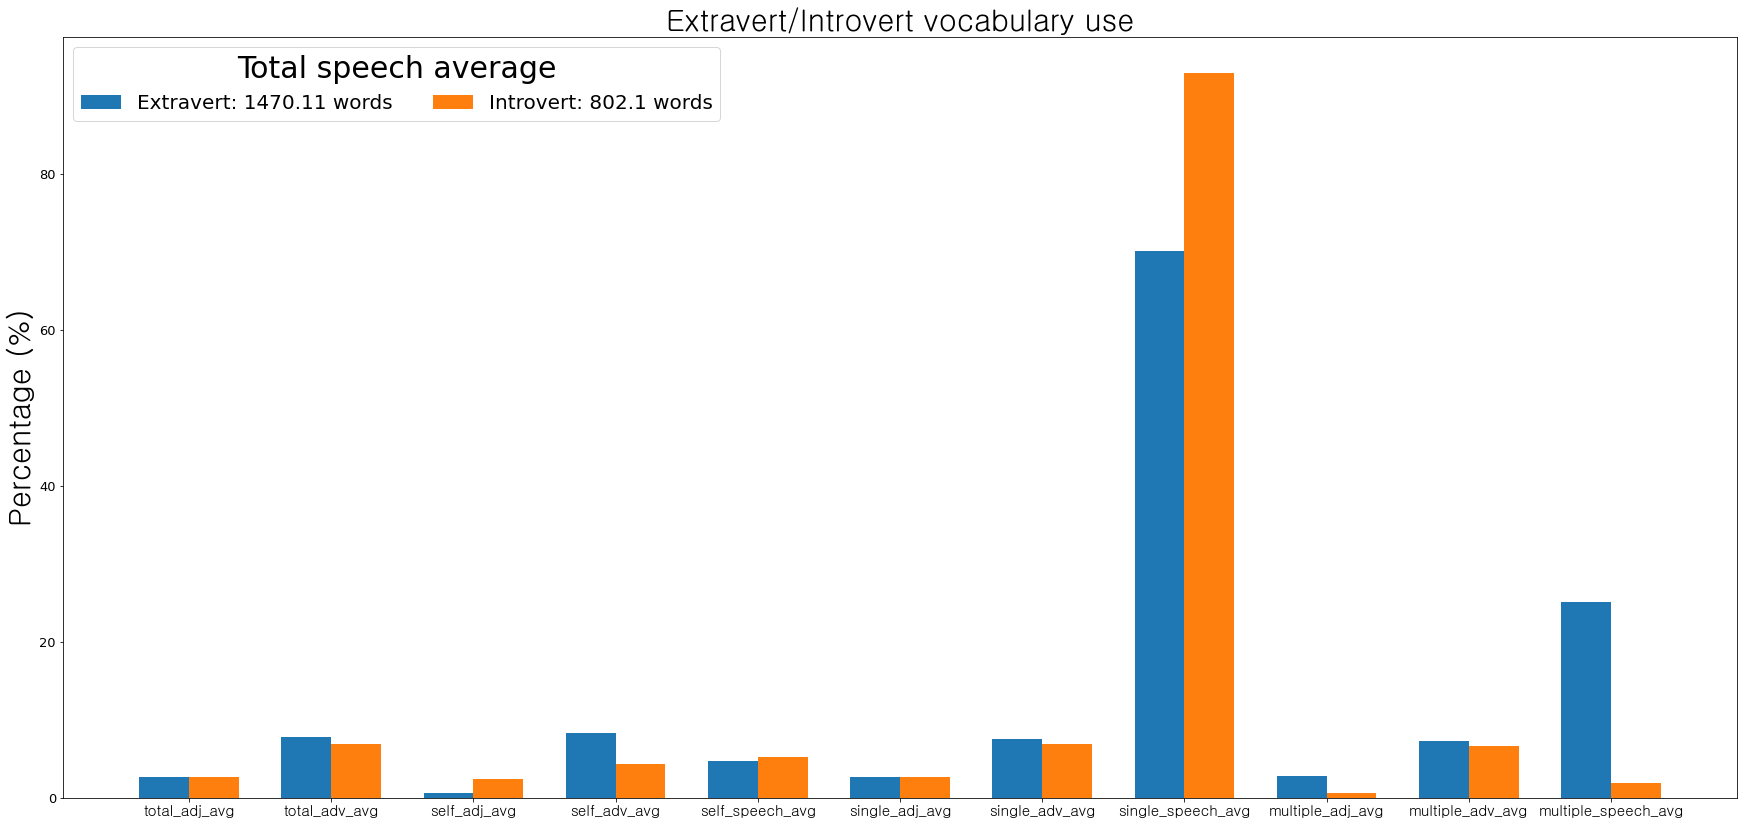

In [401]:
width = 0.35
x = np.arange(11)
plt.figure(figsize=(30,14))
plt.bar(x, plot_extra.values(), width, label='Extravert: '+str(round(extra_dict['total_words'],2)) + ' words')
plt.bar(x+width, plot_intro.values(),width, label = 'Introvert: ' + str(round(intro_dict['total_words'],2)) + ' words')

plt.ylabel("Percentage (%)",fontproperties=fontprop, fontsize=30)
plt.title("Extravert/Introvert vocabulary use",fontproperties=fontprop, fontsize=30)
new_keys = ['total_adj_avg', 'total_adv_avg', 'self_adj_avg', 'self_adv_avg', 'self_speech_avg',
            'single_adj_avg','single_adv_avg','single_speech_avg','multiple_adj_avg','multiple_adv_avg','multiple_speech_avg']
plt.xticks(x+width/2,new_keys,fontproperties=fontprop, fontsize=15)

plt.yticks(fontsize=13)
plt.legend(loc='best', ncol=4,fontsize=20,labelcolor='black',title='Total speech average',title_fontsize=30)

plt.show()

In [1]:
new_dict

NameError: name 'new_dict' is not defined